In [ ]:
import os
import pandas as pd

# List all files in the uploaded directory
file_dir = "/content"  # Default directory for uploaded files in Google Colab
files = [f for f in os.listdir(file_dir) if f.endswith(".csv")]

# Display the available files
print("Uploaded CSV files:")
for file in files:
    print(file)

# Load and display the first few rows of each dataset
for file in files:
    file_path = os.path.join(file_dir, file)
    print(f"\nAttempting to read: {file}")

    try:
        # Auto-detect delimiter and read the file
        df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8")
        print(f"Successfully loaded: {file}")
        print(df.head())  # Display the first 5 rows

    except Exception as e:
        print(f" Error reading {file}: {e}")


Uploaded CSV files:
Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
Dataset_1_EV_charging_reports.csv_cleaned.csv
Dataset_6_Local_traffic_distribution.csv_cleaned.csv
Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv

Attempting to read: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
Successfully loaded: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
          date_from           date_to User_ID  session_ID Synthetic_3_6kW  \
0  21.12.2018 10:00  21.12.2018 11:00  AdO3-4         1.0             0,3   
1  21.12.2018 10:00  21.12.2018 11:00  AdO3-4         2.0            0,87   
2  21.12.2018 11:00  21.12.2018 12:00  AdO3-4         3.0            1,62   
3  21.12.2018 12:00  21.12.2018 13:00  AdO3-4         3.0             3,6   
4  21.12.2018 13:00  21.12.2018 14:00  AdO3-4         3.0          

In [ ]:


# List all CSV files in Google Colab
file_dir = "/content"  # Default upload directory in Colab
files = [f for f in os.listdir(file_dir) if f.endswith(".csv")]

# Dictionary to store cleaned dataframes
cleaned_data = {}

# Function to clean and check data
def clean_and_check_data(file_path, file_name):
    try:
        # Load dataset with auto-detected delimiter
        df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8")

        print(f"\n📂 Cleaning data from: {file_name}")

        # Convert numeric columns (replace ',' with '.')
        for col in df.columns:
            if df[col].dtype == "object":  # Apply only to text columns
                df[col] = df[col].str.replace(",", ".", regex=True)  # Replace commas with dots

            try:
                df[col] = pd.to_numeric(df[col])  # Convert numeric values
            except ValueError:
                pass  # Keep it as string if conversion fails

        # Convert date columns to datetime if applicable
        date_columns = ["date_from", "date_to", "Start_plugin", "End_plugout", "datetime"]
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)  # Convert to datetime format

        # Check for missing values
        missing_values = df.isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        missing_report = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
        missing_report = missing_report[missing_report["Missing Values"] > 0]  # Filter non-missing values

        # Check for duplicate rows
        duplicate_count = df.duplicated().sum()

        # Remove duplicate rows
        df = df.drop_duplicates()

        print(f"✅ Cleaned {file_name}")
        print(f"🔎 Found {missing_report.shape[0]} columns with missing values")
        print(f"🔄 Removed {duplicate_count} duplicate rows")

        # Store cleaned dataset
        cleaned_data[file_name] = df

        # Return missing values report
        return missing_report

    except Exception as e:
        print(f"❌ Error processing {file_name}: {e}")
        return None

# Process all uploaded files
missing_values_summary = {}

for file in files:
    file_path = os.path.join(file_dir, file)
    missing_values_summary[file] = clean_and_check_data(file_path, file)

# Display missing values summary
missing_values_df = pd.concat(missing_values_summary, axis=1)
print("\n🔍 Summary of Missing Values in Each Dataset:")
print(missing_values_df)



📂 Cleaning data from: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
✅ Cleaned Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
🔎 Found 0 columns with missing values
🔄 Removed 0 duplicate rows

📂 Cleaning data from: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
✅ Cleaned Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
🔎 Found 0 columns with missing values
🔄 Removed 0 duplicate rows

📂 Cleaning data from: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
✅ Cleaned Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
🔎 Found 0 columns with missing values
🔄 Removed 0 duplicate rows

📂 Cleaning data from: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
✅ Cleaned Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
🔎 Found 0 columns with missing values
🔄 Removed 0 duplicate rows

📂 Cleaning data from: Dataset_1_EV_charging_reports.csv_cleaned.csv
✅ Cleaned Dataset_1_EV_charging_reports.csv_cleaned.csv
🔎 Found 0 columns wit

In [ ]:
import pandas as pd
import os

# List all CSV files in Google Colab
file_dir = "/content"  # Default upload directory in Colab
files = [f for f in os.listdir(file_dir) if f.endswith(".csv")]

# Dictionary to store cleaned dataframes
cleaned_data = {}

# Function to clean missing values
def clean_missing_values(df, file_name):
    print(f"\n📌 Cleaning missing values for: {file_name}")

    # 1. Forward fill for datetime-related columns
    date_columns = ["datetime", "date_from", "date_to", "Start_plugin", "End_plugout"]
    for col in date_columns:
        if col in df.columns:
            df[col].fillna(method="ffill", inplace=True)

    # 2. Fill numerical columns with median if <50% missing
    numerical_cols = df.select_dtypes(include=["number"]).columns
    for col in numerical_cols:
        missing_percent = df[col].isnull().sum() / len(df) * 100
        if missing_percent > 0 and missing_percent <= 50:
            df[col].fillna(df[col].median(), inplace=True)

    # 3. Fill categorical missing values with "Unknown"
    categorical_cols = df.select_dtypes(include=["object"]).columns
    for col in categorical_cols:
        df[col].fillna("Unknown", inplace=True)

    # 4. Remove columns with >75% missing values
    missing_threshold = 75
    missing_percentage = df.isnull().mean() * 100
    cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
    df.drop(columns=cols_to_drop, inplace=True)

    print(f"Filled missing values & removed columns: {cols_to_drop if cols_to_drop else 'None'}")

    return df

# Process all uploaded files
missing_values_summary = {}

for file in files:
    file_path = os.path.join(file_dir, file)
    df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8")
    df = clean_missing_values(df, file)
    cleaned_data[file] = df
    missing_values_summary[file] = df.isnull().sum()

# Display updated missing values summary
missing_values_df = pd.DataFrame(missing_values_summary)
print("\n🔍 Updated Missing Values Report:")
print(missing_values_df)



📌 Cleaning missing values for: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv


<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change i

✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
✅ Filled missing values & removed columns: None


<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change i


📌 Cleaning missing values for: Dataset_1_EV_charging_reports.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_6_Local_traffic_distribution.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv
✅ Filled missing values & removed columns: None

🔍 Updated Missing Values Report:


<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method="ffill", inplace=True)
<ipython-input-5-c7e00f8d8c33>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change i

                   Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv  \
AMS_kWh                                                          NaN      
Date_from                                                        NaN      
Date_to                                                          NaN      
Duration_category                                                NaN      
Duration_hours                                                   NaN      
...                                                              ...      
weekday                                                          NaN      
weekdays_plugin                                                  NaN      
wind_dir                                                         NaN      
wind_gust_spd                                                    NaN      
wind_spd                                                         NaN      

                   Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv  \
AMS_kWh      

In [ ]:
import pandas as pd
import os

# List all CSV files in Google Colab
file_dir = "/content"  # Default upload directory in Colab
files = [f for f in os.listdir(file_dir) if f.endswith(".csv")]

# Dictionary to store cleaned dataframes
cleaned_data = {}

# Function to clean missing values
def clean_missing_values(df, file_name):
    print(f"\n📌 Cleaning missing values for: {file_name}")

    # 1. Forward fill for datetime-related columns
    date_columns = ["datetime", "date_from", "date_to", "Start_plugin", "End_plugout"]
    for col in date_columns:
        if col in df.columns:
            df[col] = df[col].ffill()  # Correct method instead of inplace=True

    # 2. Fill numerical columns with median if <50% missing
    numerical_cols = df.select_dtypes(include=["number"]).columns
    for col in numerical_cols:
        missing_percent = df[col].isnull().sum() / len(df) * 100
        if missing_percent > 0 and missing_percent <= 50:
            df[col] = df[col].fillna(df[col].median())  # Correct method

    # 3. Fill categorical missing values with "Unknown"
    categorical_cols = df.select_dtypes(include=["object"]).columns
    for col in categorical_cols:
        df[col] = df[col].fillna("Unknown")  # Correct method

    # 4. Remove columns with >75% missing values
    missing_threshold = 75
    missing_percentage = df.isnull().mean() * 100
    cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
    df = df.drop(columns=cols_to_drop)  # Correct method

    print(f"✅ Filled missing values & removed columns: {cols_to_drop if cols_to_drop else 'None'}")

    return df

# Process all uploaded files
missing_values_summary = {}

for file in files:
    file_path = os.path.join(file_dir, file)
    df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8")
    df = clean_missing_values(df, file)
    cleaned_data[file] = df
    missing_values_summary[file] = df.isnull().sum()

# Display updated missing values summary
missing_values_df = pd.DataFrame(missing_values_summary)
print("\n🔍 Updated Missing Values Report:")
print(missing_values_df)



📌 Cleaning missing values for: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_1_EV_charging_reports.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_6_Local_traffic_distribution.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv
✅ Filled missing values & removed columns: None

🔍 Updated Missing Values Report:
                   Dataset

In [ ]:
import pandas as pd
import os
from google.colab import files  # Import files correctly

# Get list of uploaded files
uploaded_files = [f for f in os.listdir() if f.endswith(".csv")]

# Dictionary to store cleaned data
cleaned_data = {}

# Function to clean missing values
def clean_missing_values(df, file_name):
    print(f"\n📌 Cleaning missing values for: {file_name}")

    # 1. Forward fill for datetime-related columns
    date_columns = ["datetime", "date_from", "date_to", "Start_plugin", "End_plugout"]
    for col in date_columns:
        if col in df.columns:
            df[col] = df[col].ffill()  # Forward fill method

    # 2. Fill numerical columns with median if <50% missing
    numerical_cols = df.select_dtypes(include=["number"]).columns
    for col in numerical_cols:
        missing_percent = df[col].isnull().sum() / len(df) * 100
        if missing_percent > 0 and missing_percent <= 50:
            df[col] = df[col].fillna(df[col].median())  # Fill with median

    # 3. Fill categorical missing values with "Unknown"
    categorical_cols = df.select_dtypes(include=["object"]).columns
    for col in categorical_cols:
        df[col] = df[col].fillna("Unknown")  # Fill missing text values

    # 4. Remove columns with >75% missing values
    missing_threshold = 75
    missing_percentage = df.isnull().mean() * 100
    cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
    df = df.drop(columns=cols_to_drop)  # Drop columns with too much missing data

    print(f"✅ Filled missing values & removed columns: {cols_to_drop if cols_to_drop else 'None'}")
    return df

# Process all uploaded files
missing_values_summary = {}

for file in uploaded_files:
    df = pd.read_csv(file, sep=None, engine="python", encoding="utf-8")
    df = clean_missing_values(df, file)
    cleaned_data[file] = df
    missing_values_summary[file] = df.isnull().sum()

# Display updated missing values summary
missing_values_df = pd.DataFrame(missing_values_summary)
print("\n🔍 Updated Missing Values Report:")
print(missing_values_df)

# Save the cleaned datasets as CSV files
output_dir = "/content/cleaned_datasets"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save each cleaned dataset
cleaned_files = []
for name, df in cleaned_data.items():
    file_name = name.replace(" ", "_").replace(",", "").replace("/", "_") + "_cleaned.csv"
    file_path = os.path.join(output_dir, file_name)
    df.to_csv(file_path, index=False)
    cleaned_files.append(file_path)
    print(f"✅ Saved: {file_path}")

print("\n📂 All cleaned datasets have been saved. You can download them below.")

# Download the cleaned datasets one by one
for file_path in cleaned_files:
    files.download(file_path)  # Now it correctly calls google.colab.files.download()



📌 Cleaning missing values for: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_1_EV_charging_reports.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Dataset_6_Local_traffic_distribution.csv_cleaned.csv
✅ Filled missing values & removed columns: None

📌 Cleaning missing values for: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv
✅ Filled missing values & removed columns: None

🔍 Updated Missing Values Report:
                   Dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Exploratory Data Analysis for: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv


📝 Column Info & Missing Values:
                 Data Type  Missing Values
date_from          object               0
date_to            object               0
User_ID            object               0
session_ID        float64               0
Synthetic_3_6kW    object               0
Synthetic_7_2kW    object               0
Flex_3_6kW         object               0
Flex_7_2kW         object               0

📈 Summary Statistics:
                date_from           date_to User_ID    session_ID  \
count              88156             88156   88156  88156.000000   
unique              9762              9762      98           NaN   
top     29.01.2020 22:00  29.01.2020 23:00   Bl2-5           NaN   
freq                  37                37    4578           NaN   
mean                 NaN               NaN     NaN   3529.984062   
std                  NaN               NaN     NaN   1986.714983   


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


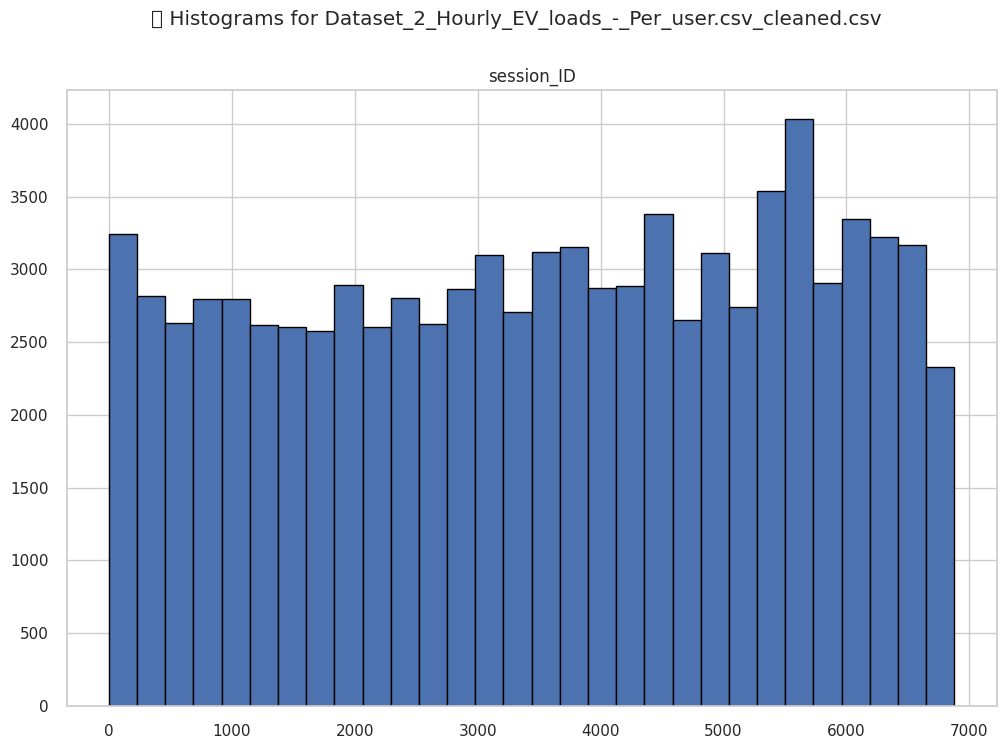

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


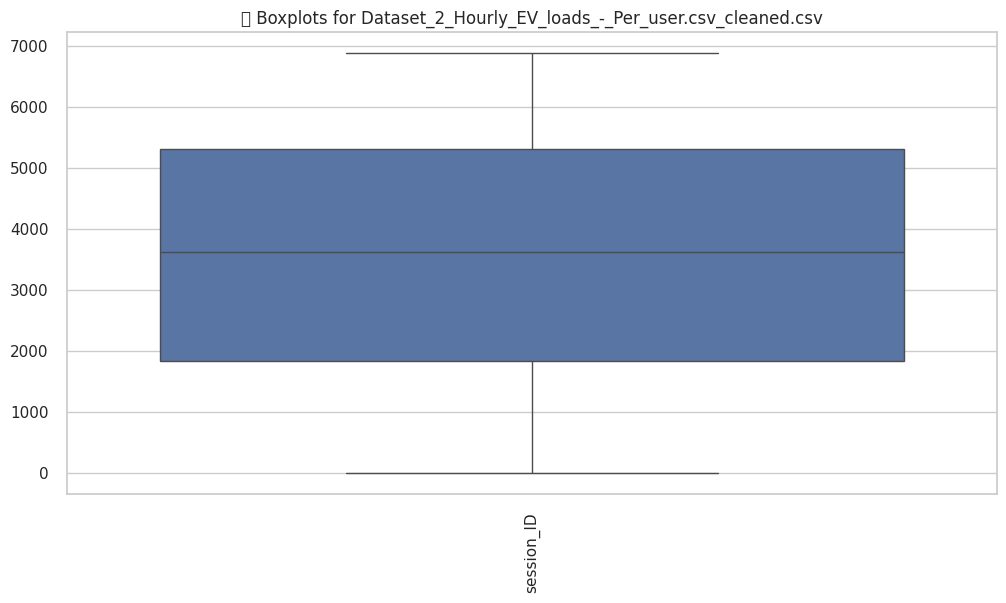

<ipython-input-8-e0ed3a503621>:48: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


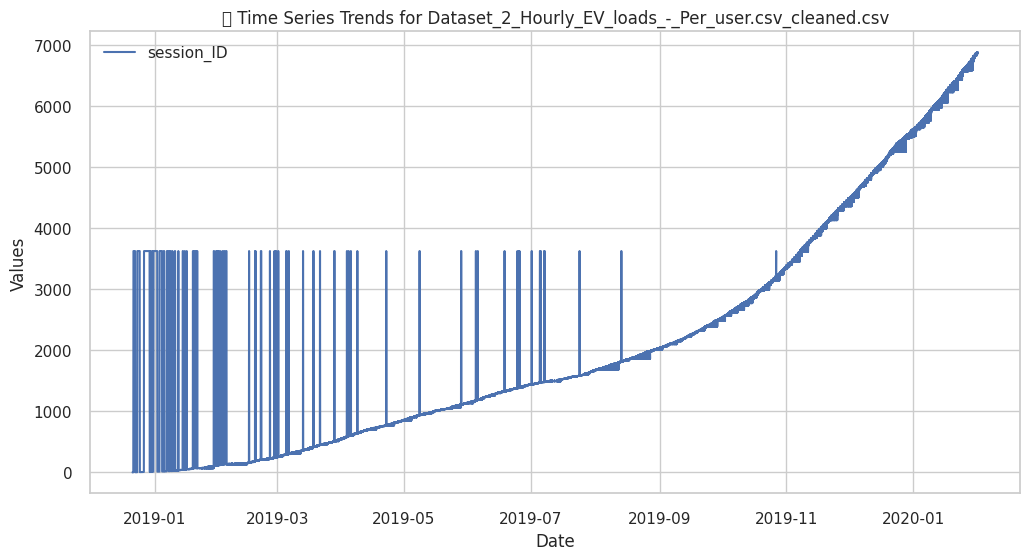


📊 Exploratory Data Analysis for: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv


📝 Column Info & Missing Values:
                 Data Type  Missing Values
date_from          object               0
daily_hour          int64               0
weekday            object               0
month              object               0
Synthetic_3_6kW    object               0
Synthetic_7_2kW    object               0
Flex_3_6kW         object               0
Flex_7_2kW         object               0
n_private           int64               0

📈 Summary Statistics:
                date_from   daily_hour weekday month Synthetic_3_6kW  \
count               9757  9757.000000    9757  9757            9757   
unique              9756          NaN       7    12            2118   
top     27.10.2019 02:00          NaN  Friday   Jan               0   
freq                   2          NaN    1405  1487            3515   
mean                 NaN    11.505996     NaN   NaN             NaN 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


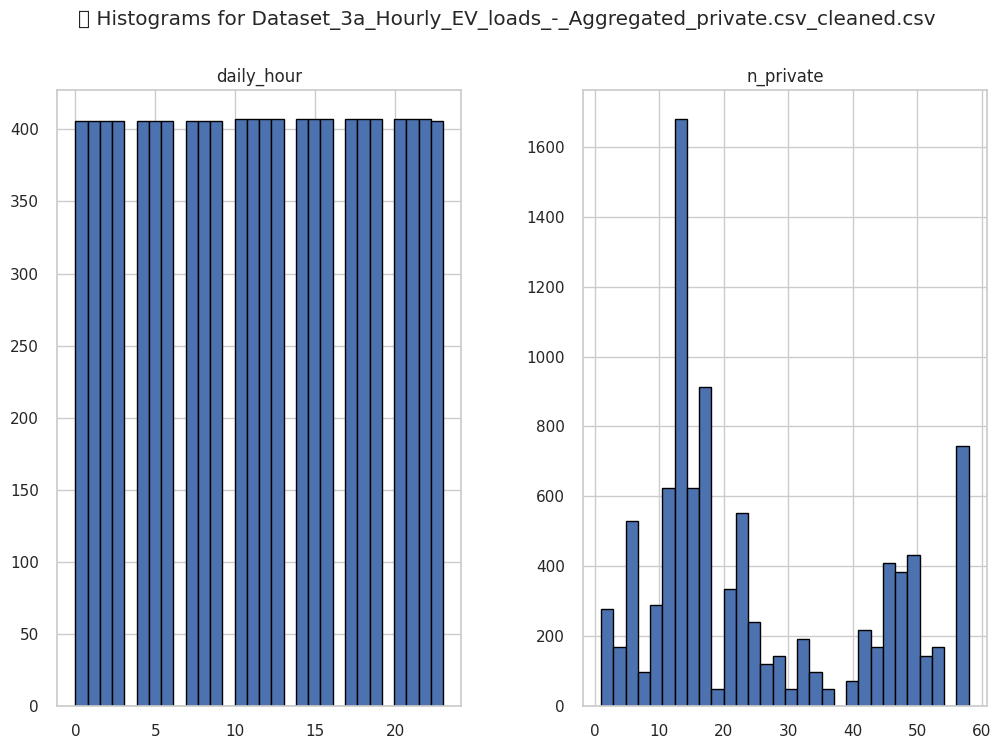

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


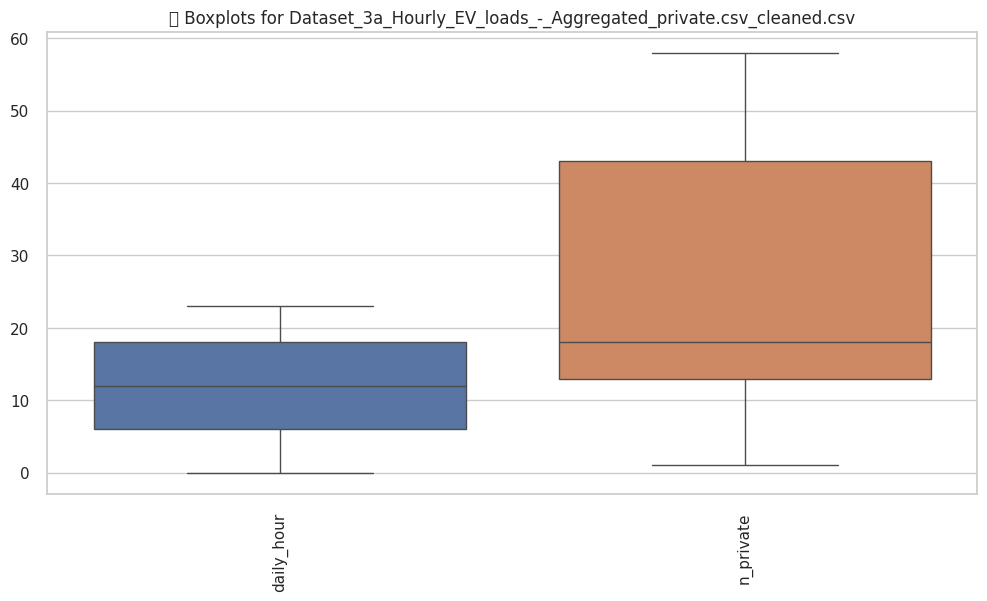

<ipython-input-8-e0ed3a503621>:48: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


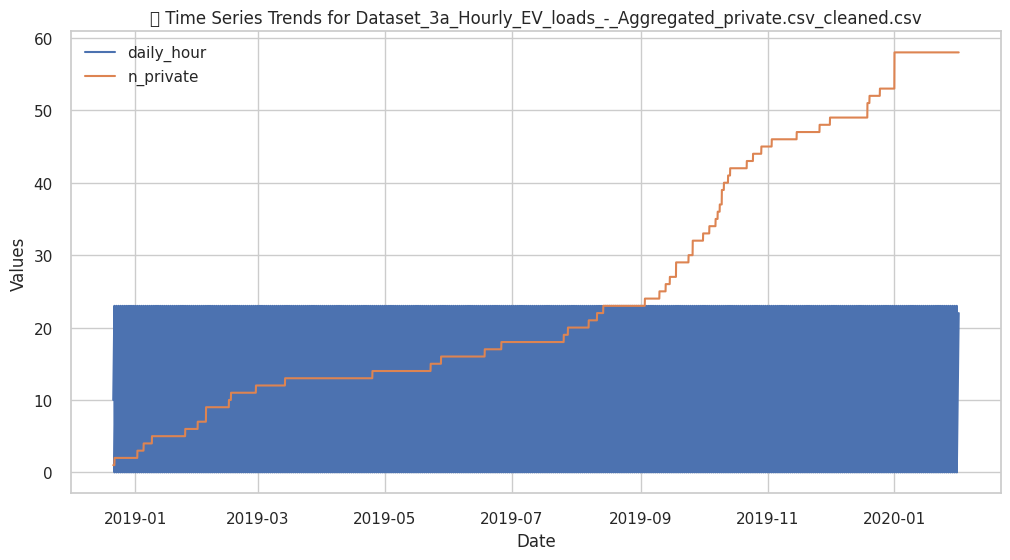


📊 Exploratory Data Analysis for: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv


📝 Column Info & Missing Values:
                 Data Type  Missing Values
date_from          object               0
daily_hour          int64               0
weekday            object               0
month              object               0
Synthetic_3_6kW    object               0
Synthetic_7_2kW    object               0
Flex_3_6kW         object               0
Flex_7_2kW         object               0
n_shared            int64               0

📈 Summary Statistics:
                date_from   daily_hour   weekday month Synthetic_3_6kW  \
count               9288  9288.000000      9288  9288            9288   
unique              9287          NaN         7    12             901   
top     27.10.2019 02:00          NaN  Thursday   Jan               0   
freq                   2          NaN      1344  1272            4291   
mean                 NaN    11.500000       NaN   NaN      

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


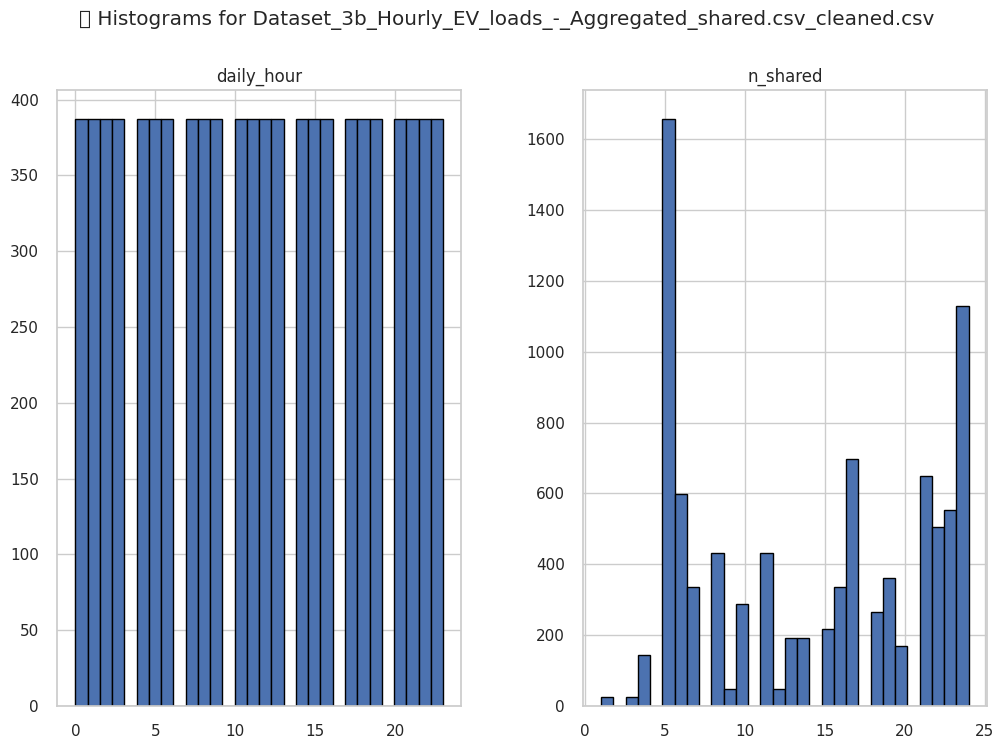

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


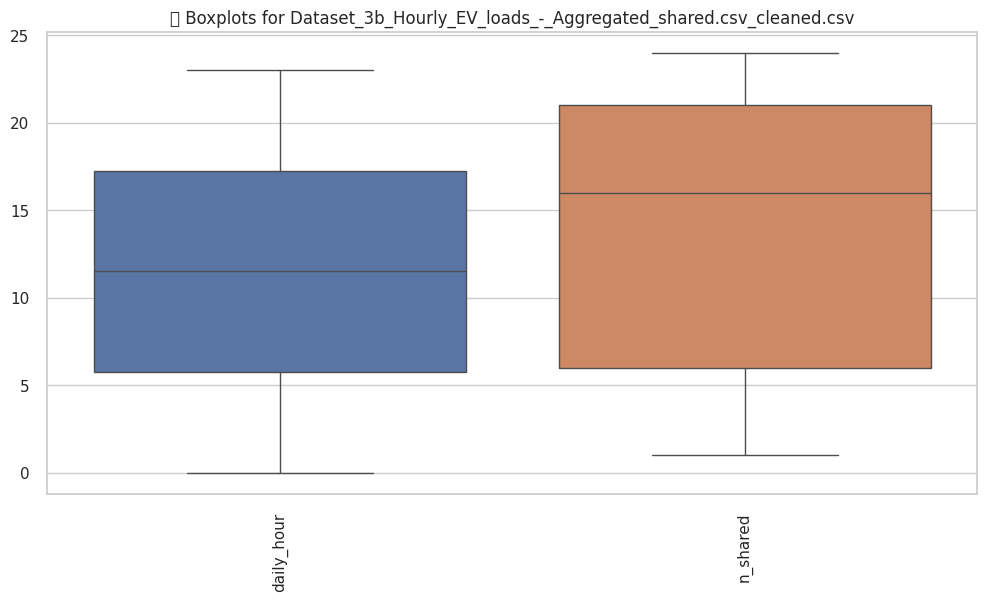

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


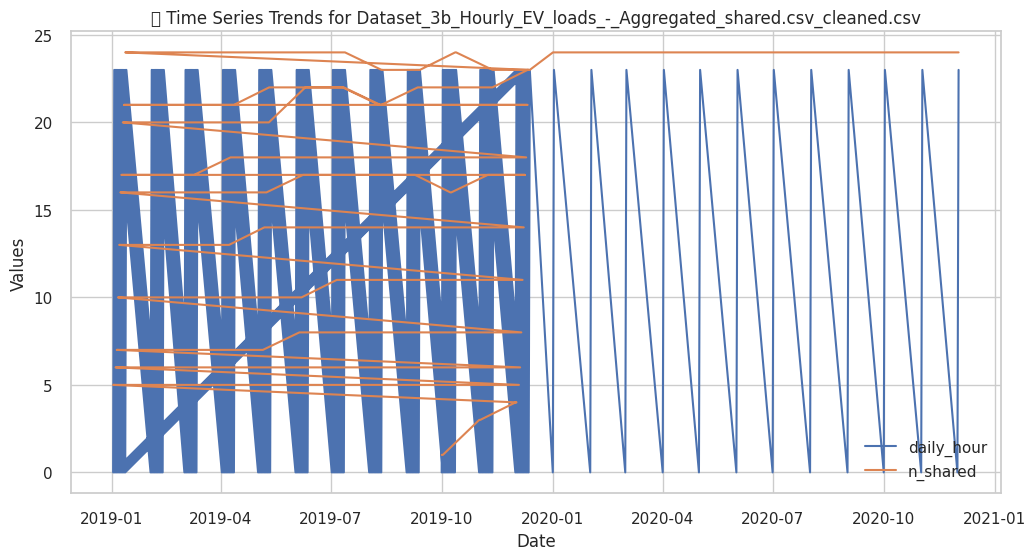


📊 Exploratory Data Analysis for: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv


📝 Column Info & Missing Values:
                       Data Type  Missing Values
date_from                object               0
date_to                  object               0
month                    object               0
AMS_kWh                  object               0
Synthetic_3_6kW          object               0
Synthetic_7_2kW          object               0
Simultaneous_if_3_6kW   float64               0

📈 Summary Statistics:
                date_from           date_to month AMS_kWh Synthetic_3_6kW  \
count               9466              9466  9466    9466            9466   
unique              9465              9463    12     417            1083   
top     27.10.2019 02:00  06.03.2019 13:00   Jan    0,05               0   
freq                   2                 3  1445    3704            3112   
mean                 NaN               NaN   NaN     NaN             NaN   
std             

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


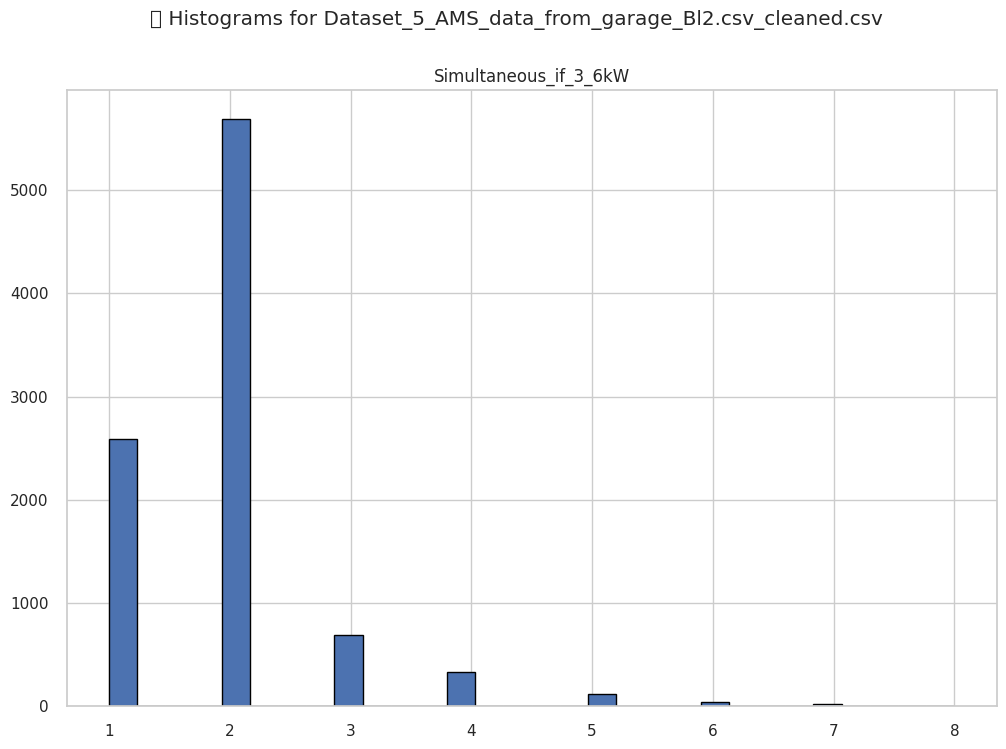

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


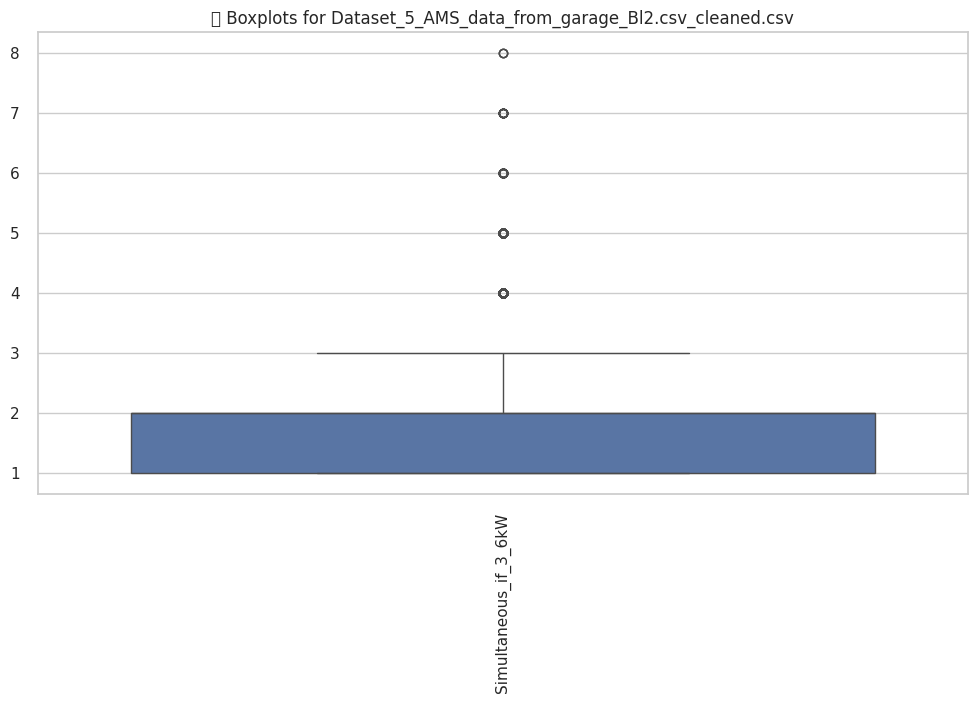

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


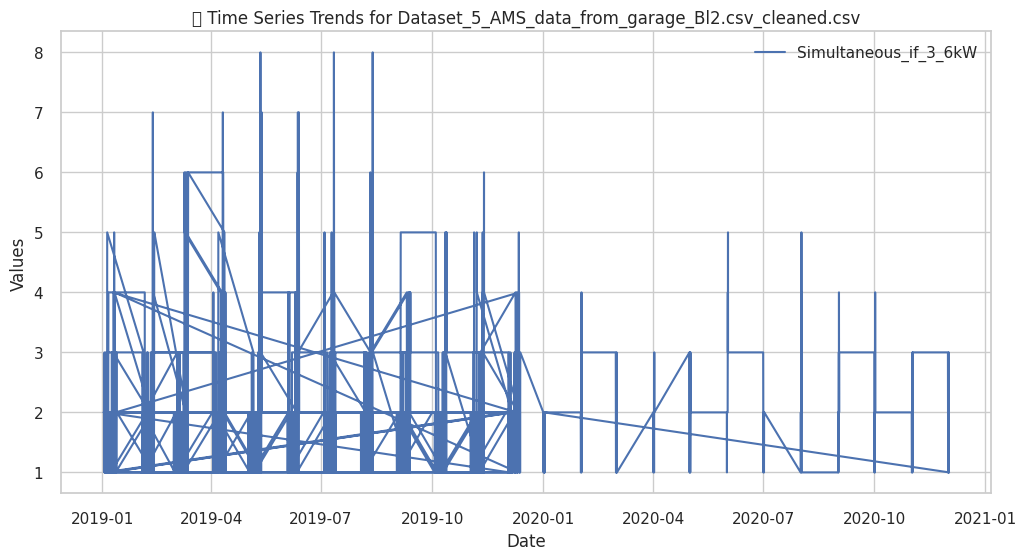


📊 Exploratory Data Analysis for: Dataset_1_EV_charging_reports.csv_cleaned.csv


📝 Column Info & Missing Values:
                   Data Type  Missing Values
session_ID            int64               0
Garage_ID            object               0
User_ID              object               0
User_type            object               0
Shared_ID            object               0
Start_plugin         object               0
Start_plugin_hour     int64               0
End_plugout          object               0
End_plugout_hour    float64               0
El_kWh               object               0
Duration_hours       object               0
month_plugin         object               0
weekdays_plugin      object               0
Plugin_category      object               0
Duration_category    object               0

📈 Summary Statistics:
          session_ID Garage_ID User_ID User_type Shared_ID      Start_plugin  \
count   6878.000000      6878    6878      6878      6878              6878   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


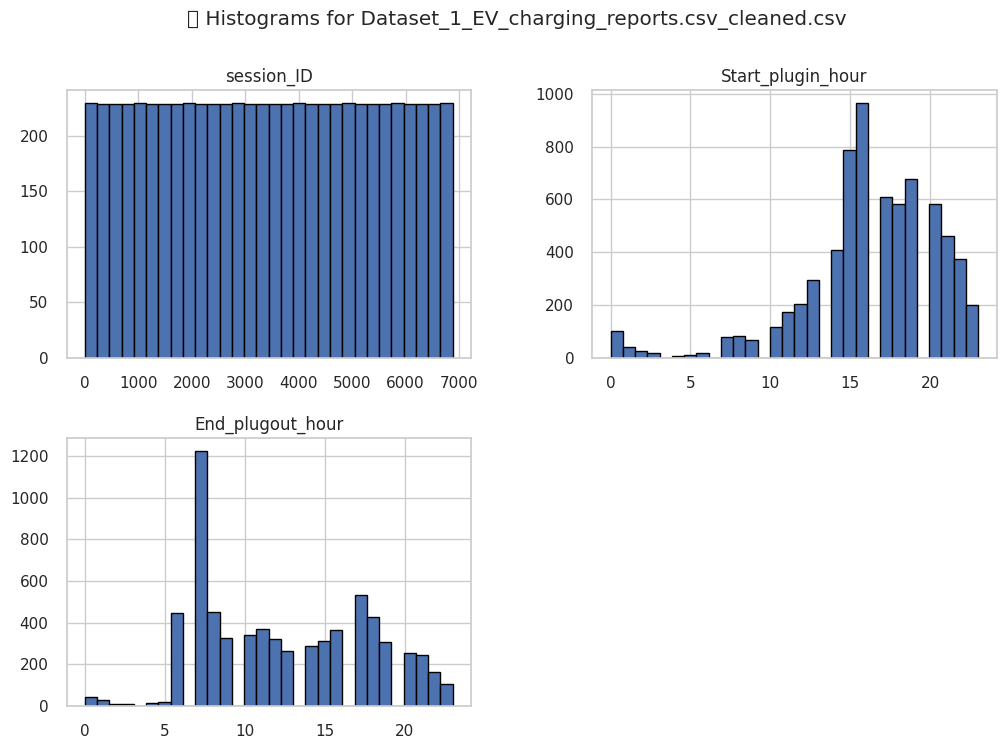

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


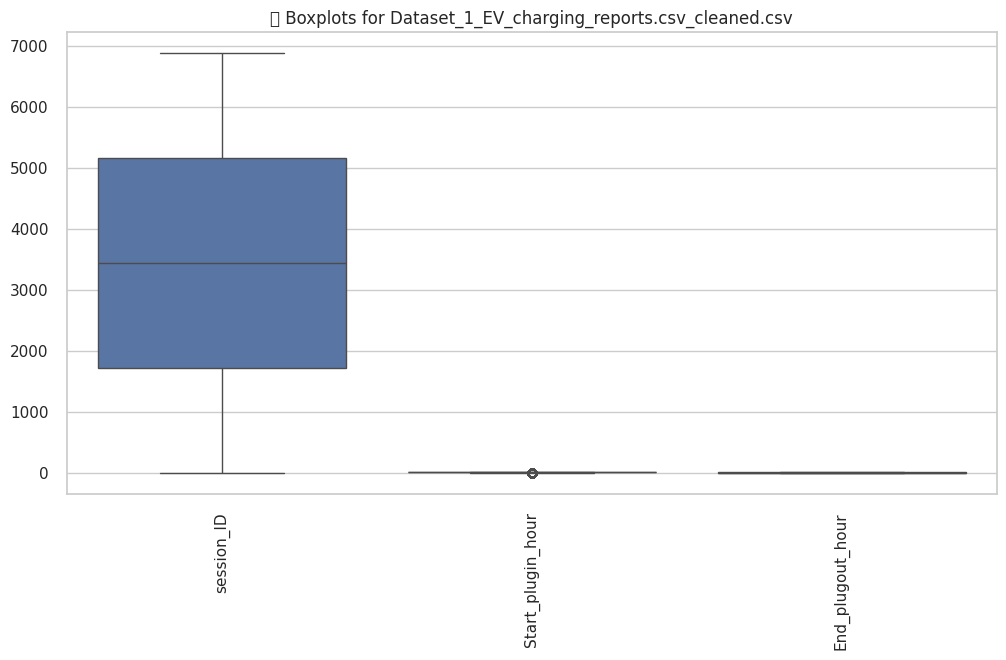


📊 Exploratory Data Analysis for: Dataset_6_Local_traffic_distribution.csv_cleaned.csv


📝 Column Info & Missing Values:
                                      Data Type  Missing Values
Date_from                               object               0
Date_to                                 object               0
KROPPAN BRU                             object               0
MOHOLTLIA                               object               0
SELSBAKK                                object               0
MOHOLT RAMPE 2                           int64               0
Jonsvannsveien vest for Steinanvegen     int64               0

📈 Summary Statistics:
                Date_from           Date_to KROPPAN BRU MOHOLTLIA SELSBAKK  \
count              10248             10248       10248     10248    10248   
unique             10247             10247        3835      2312      864   
top     27.10.2019 02:00  27.10.2019 02:00          69        29       24   
freq                   2                 2

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


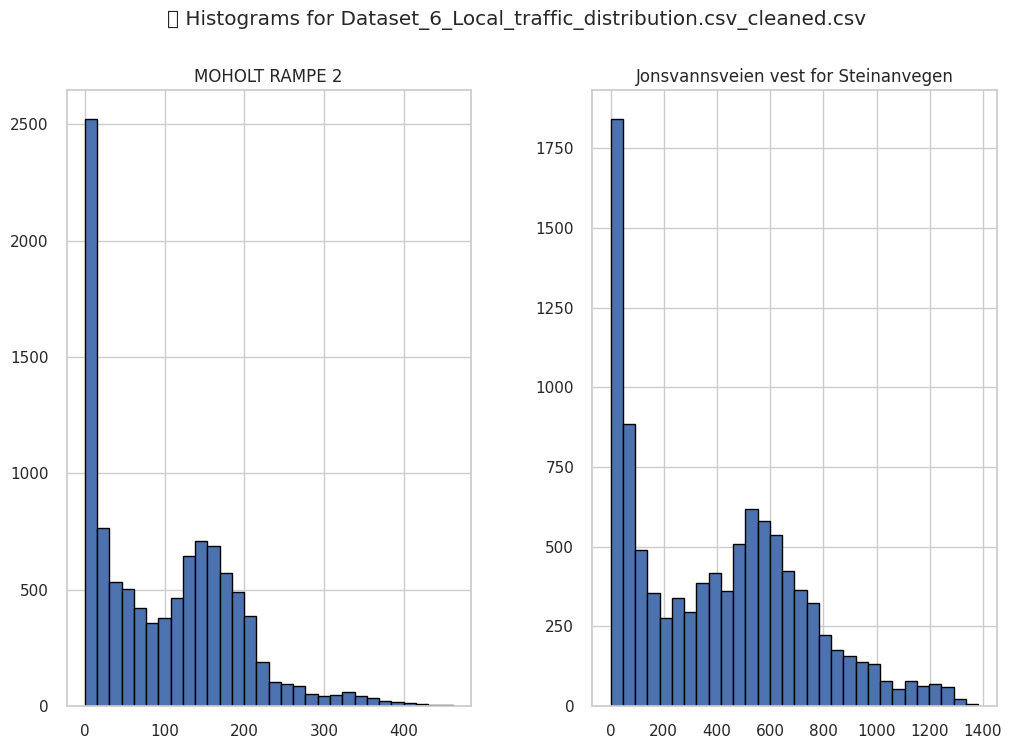

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


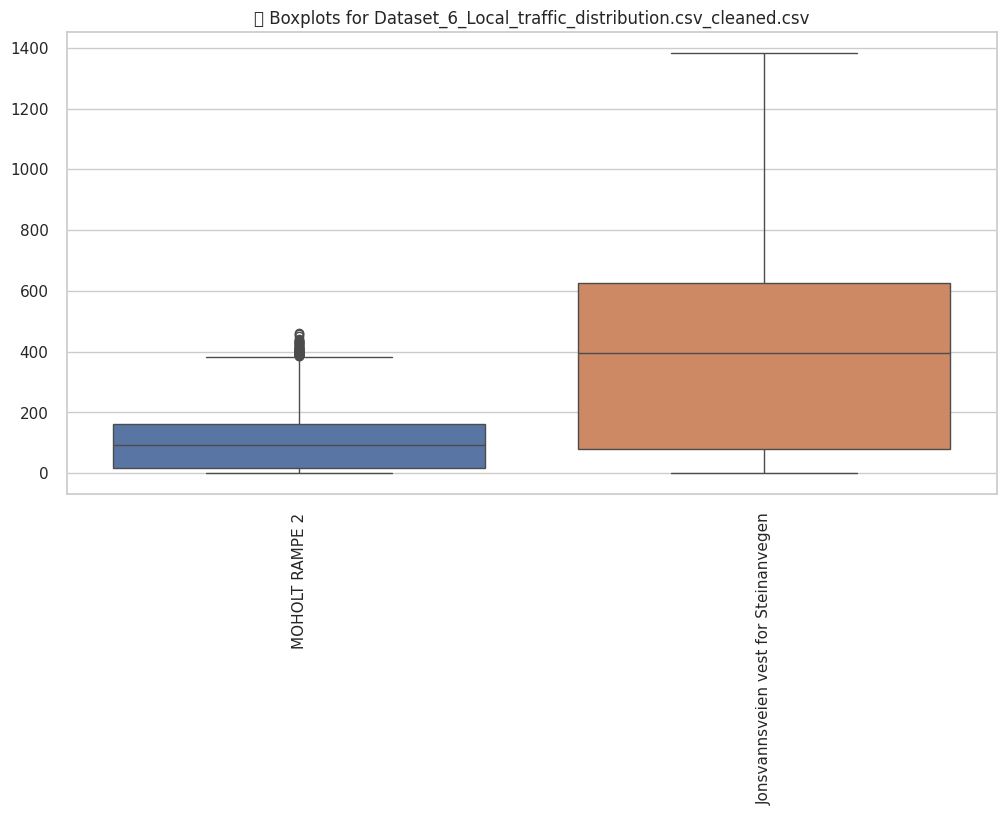


📊 Exploratory Data Analysis for: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv


📝 Column Info & Missing Values:
                 Data Type  Missing Values
Unnamed: 0          int64               0
clouds              int64               0
datetime           object               0
dewpt             float64               0
dhi                 int64               0
dni                 int64               0
ghi                 int64               0
max_dhi             int64               0
max_dni             int64               0
max_ghi             int64               0
max_temp          float64               0
max_temp_ts         int64               0
max_uv            float64               0
max_wind_dir        int64               0
max_wind_spd      float64               0
max_wind_spd_ts     int64               0
min_temp          float64               0
min_temp_ts         int64               0
precip            float64               0
precip_gpm        float64               0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


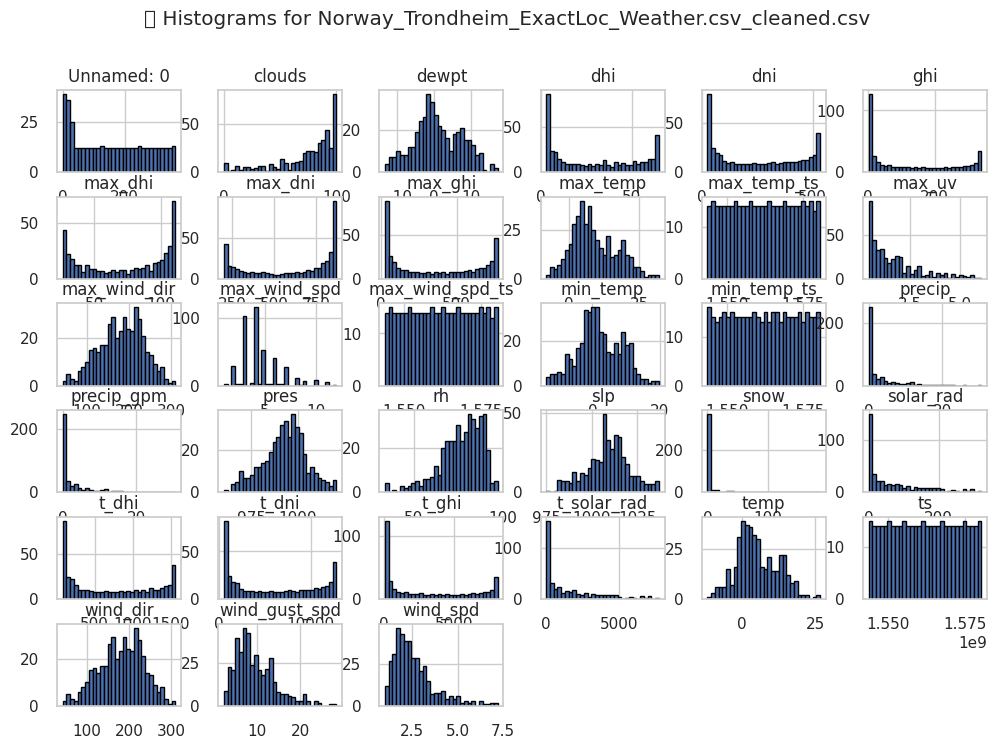

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


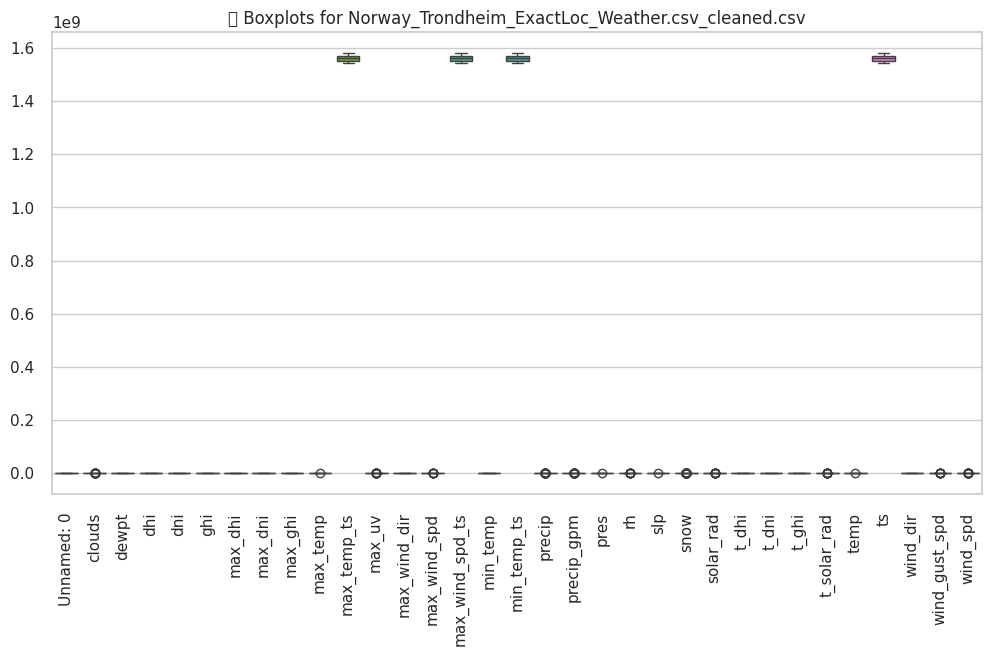

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Get list of cleaned CSV files
cleaned_files = [f for f in os.listdir() if f.endswith("_cleaned.csv")]

# Dictionary to store dataframes
eda_data = {}

# Load each cleaned dataset
for file in cleaned_files:
    df = pd.read_csv(file)
    eda_data[file] = df

# Perform EDA
for file, df in eda_data.items():
    print(f"\n📊 Exploratory Data Analysis for: {file}\n")

    # Column Info & Missing Values
    column_info = pd.DataFrame({"Data Type": df.dtypes, "Missing Values": df.isnull().sum()})
    print("\n📝 Column Info & Missing Values:\n", column_info)

    # Summary Statistics
    summary_stats = df.describe(include="all")
    print("\n📈 Summary Statistics:\n", summary_stats)

    # Correlation Matrix (for numerical data)
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()
    print("\n🔗 Correlation Matrix:\n", correlation_matrix)

    # Visualization: Histograms
    df.hist(bins=30, figsize=(12, 8), edgecolor='black')
    plt.suptitle(f"📊 Histograms for {file}")
    plt.show()

    # Boxplot for detecting outliers
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title(f"📊 Boxplots for {file}")
    plt.show()

    # Time-Series Trends (if "date_from" exists)
    if "date_from" in df.columns:
        df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
        df = df.dropna(subset=["date_from"])  # Drop NaN dates
        df.set_index("date_from", inplace=True)

        # Plot numerical trends over time
        plt.figure(figsize=(12, 6))
        for column in numeric_df.columns[:3]:  # Plot first 3 numerical columns
            if column in df.columns:
                plt.plot(df.index, df[column], label=column)

        plt.title(f"📈 Time Series Trends for {file}")
        plt.xlabel("Date")
        plt.ylabel("Values")
        plt.legend()
        plt.show()



📊 Visualizing: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


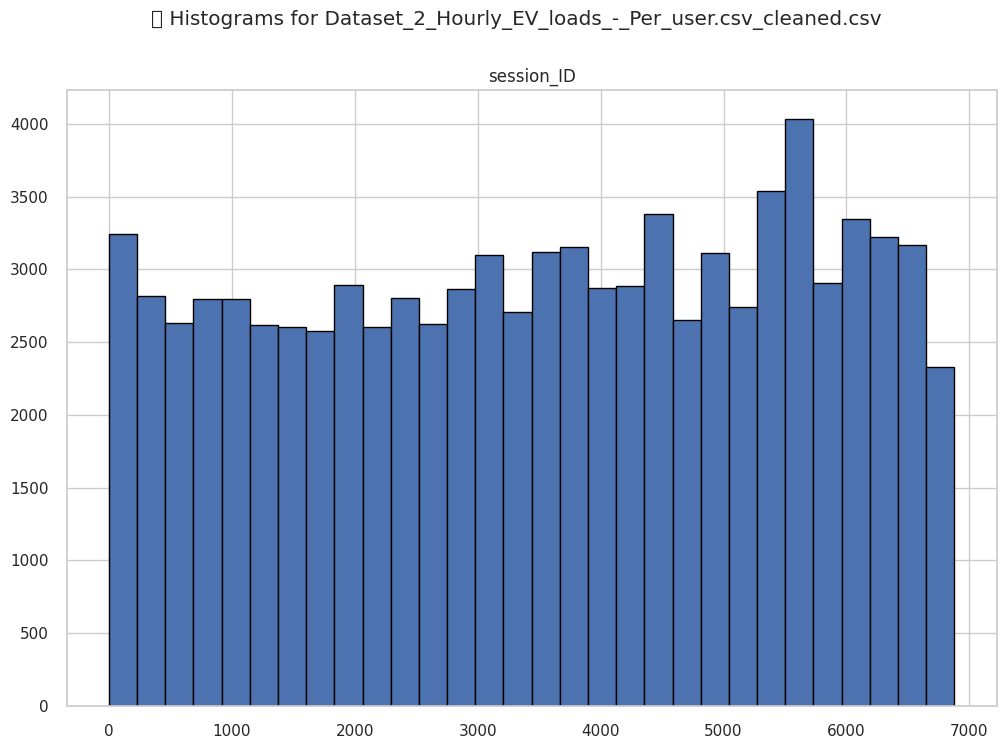

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


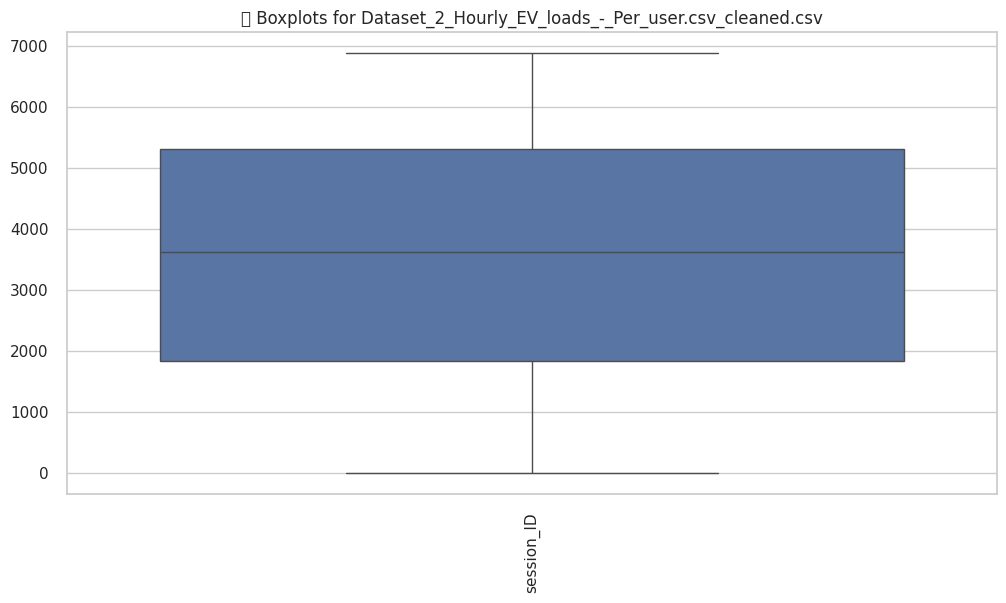

<ipython-input-9-c0252417aa93>:36: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


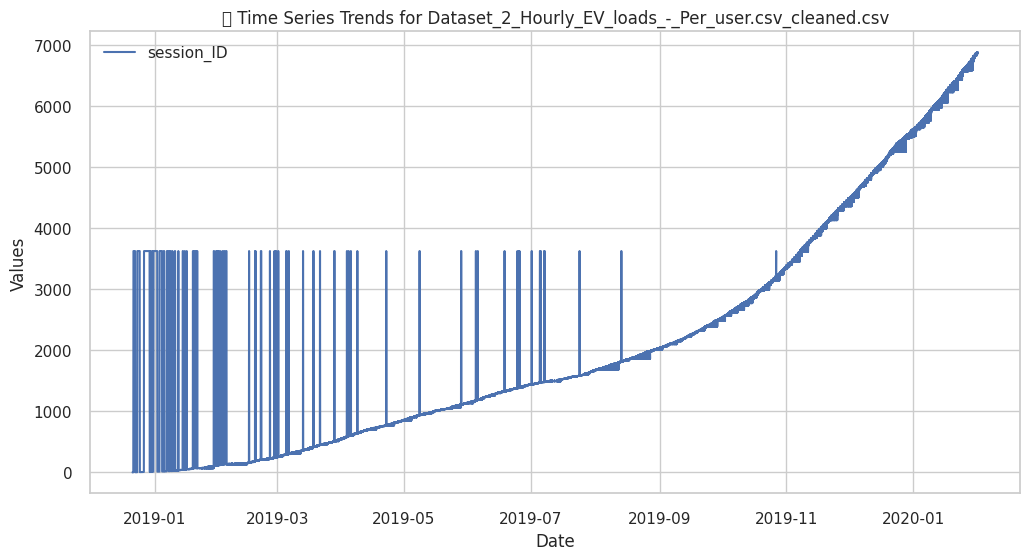


📊 Visualizing: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


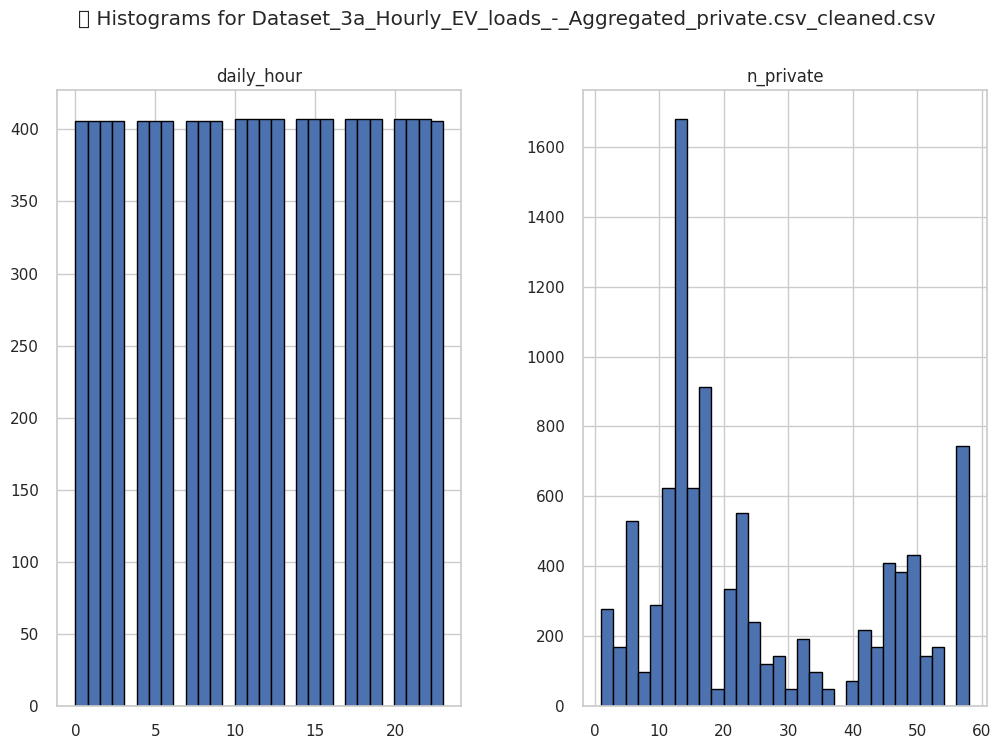

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


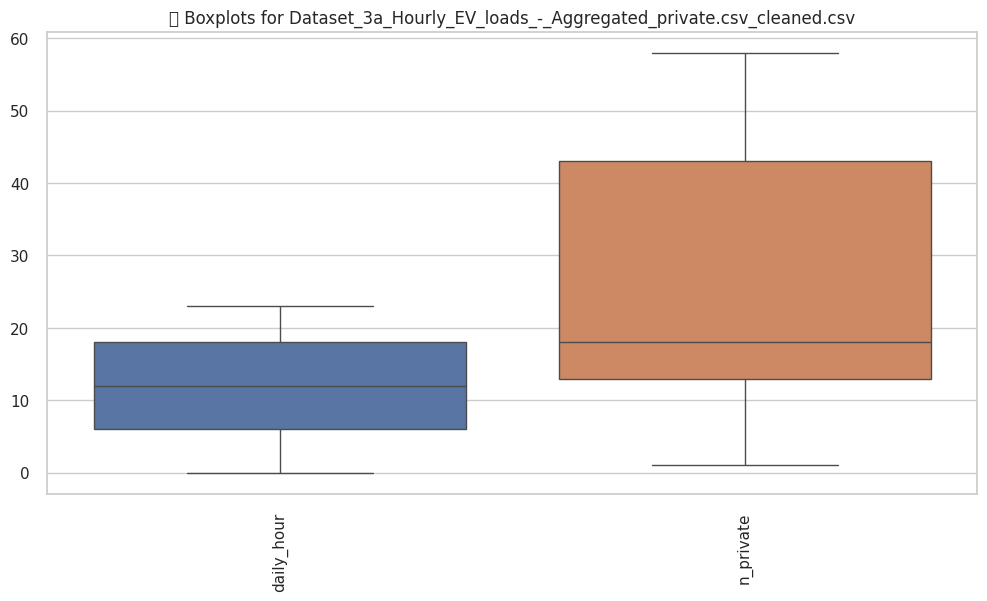

<ipython-input-9-c0252417aa93>:36: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


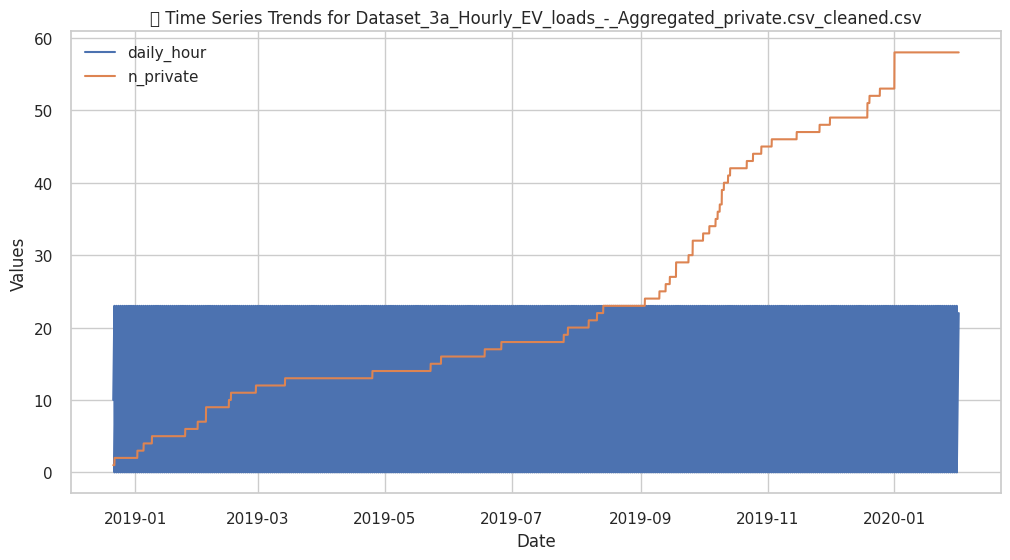


📊 Visualizing: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


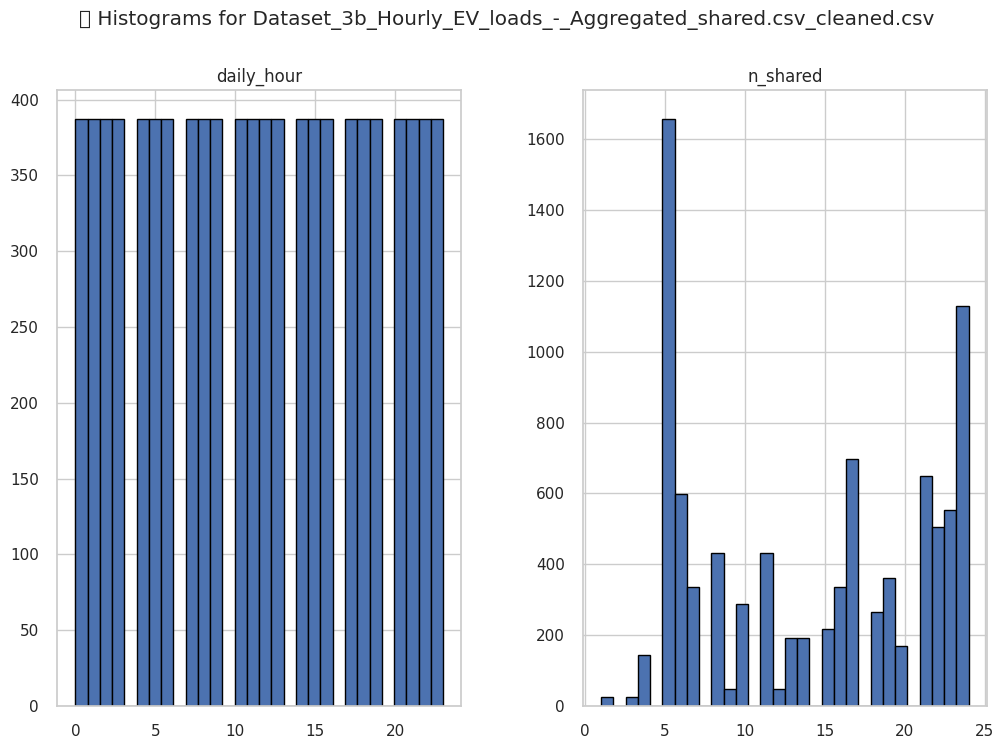

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


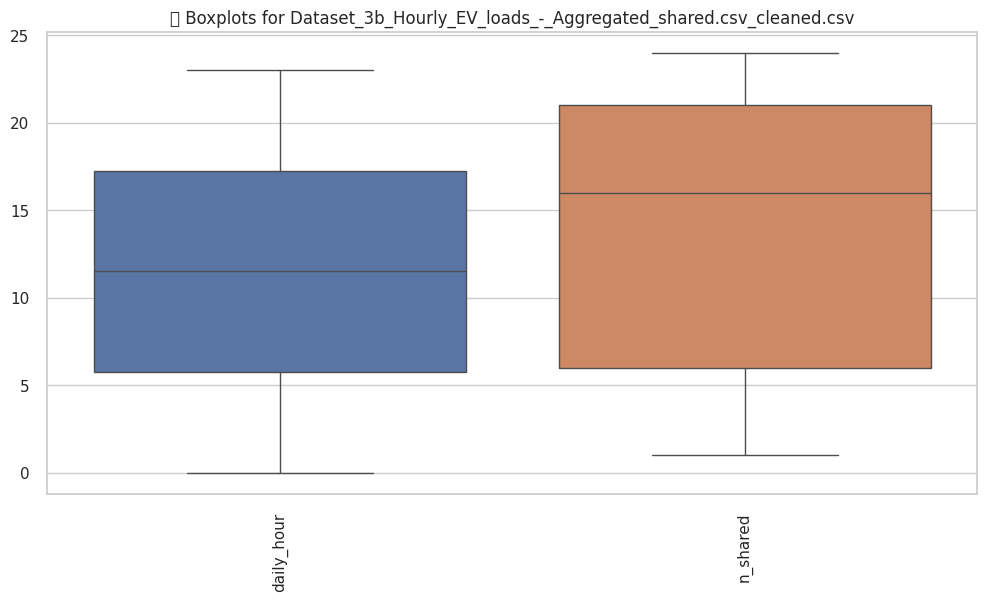

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


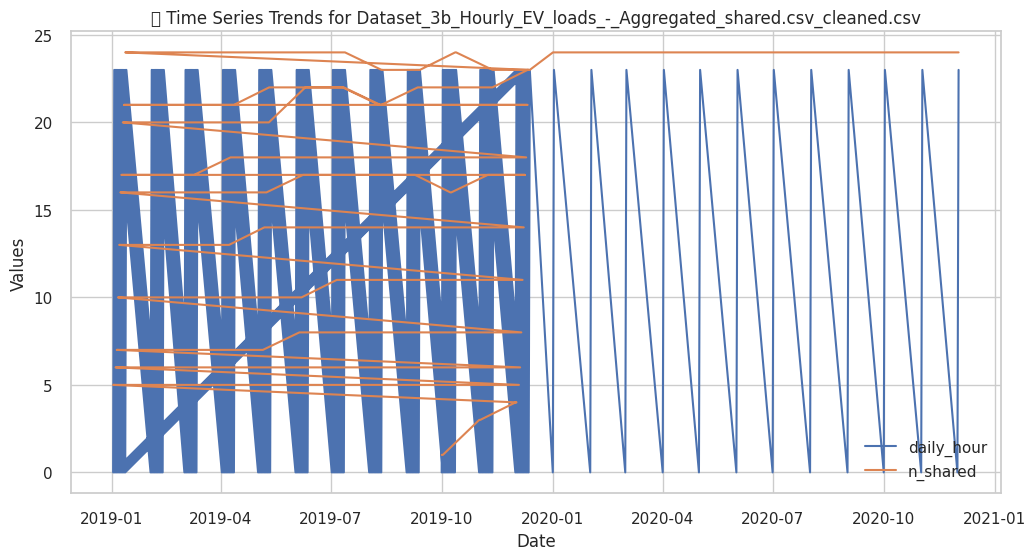


📊 Visualizing: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


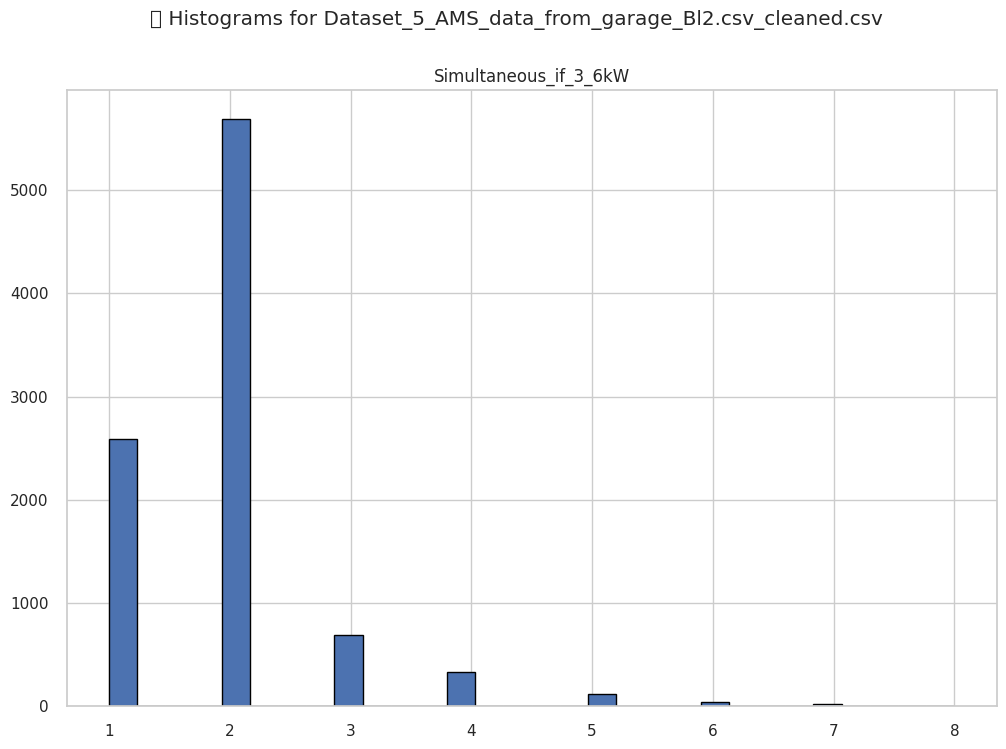

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


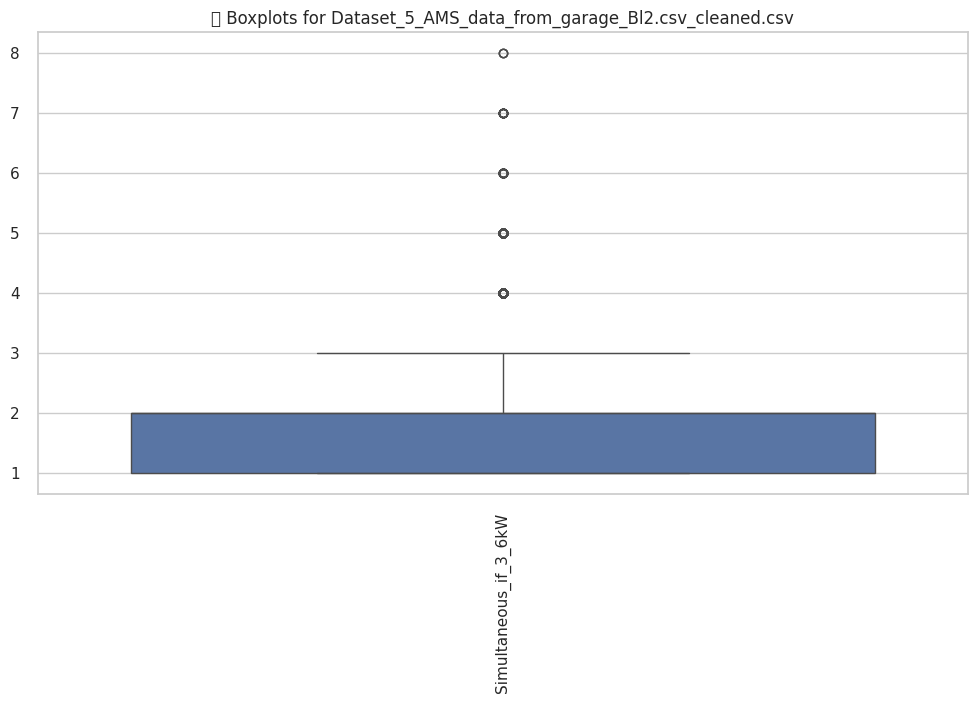

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


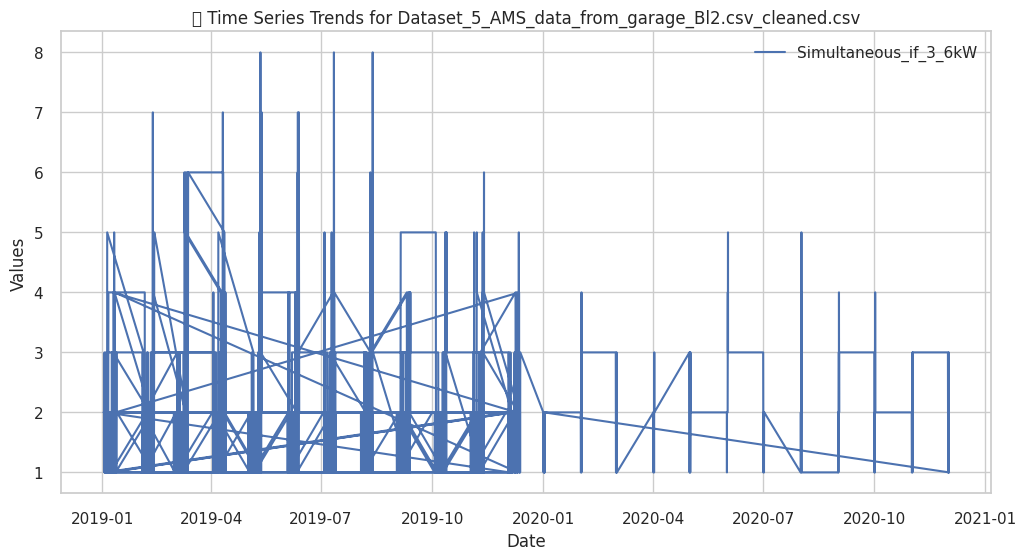


📊 Visualizing: Dataset_1_EV_charging_reports.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


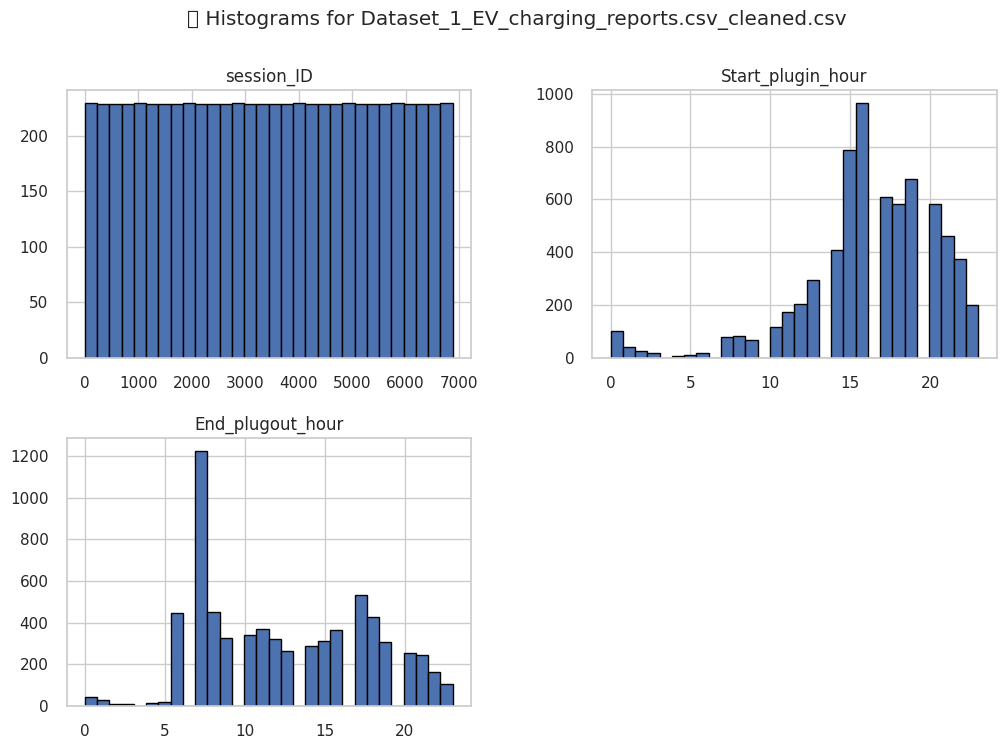

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


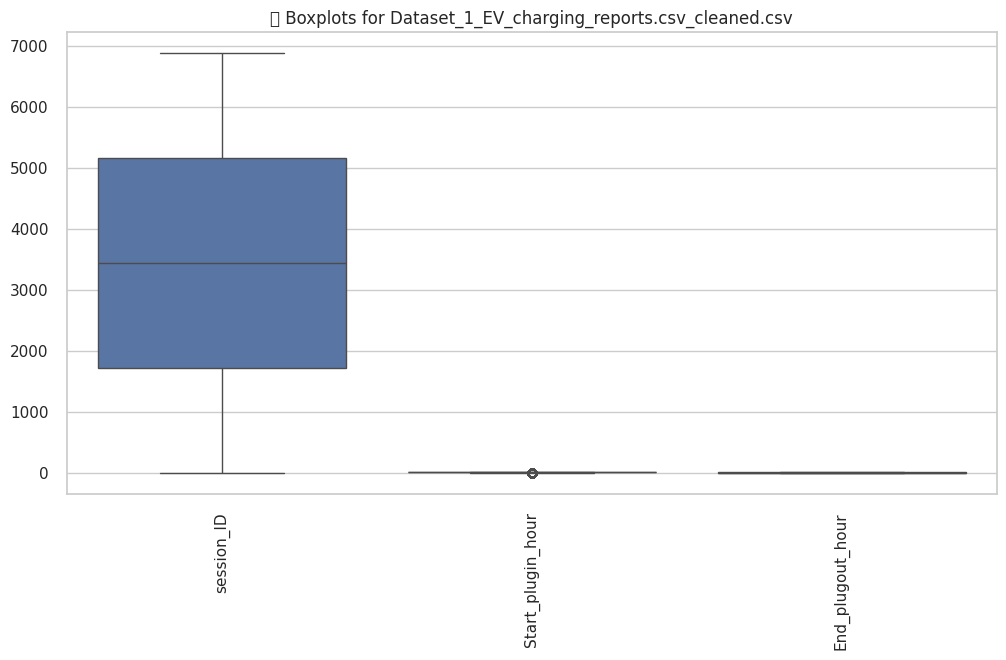


📊 Visualizing: Dataset_6_Local_traffic_distribution.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


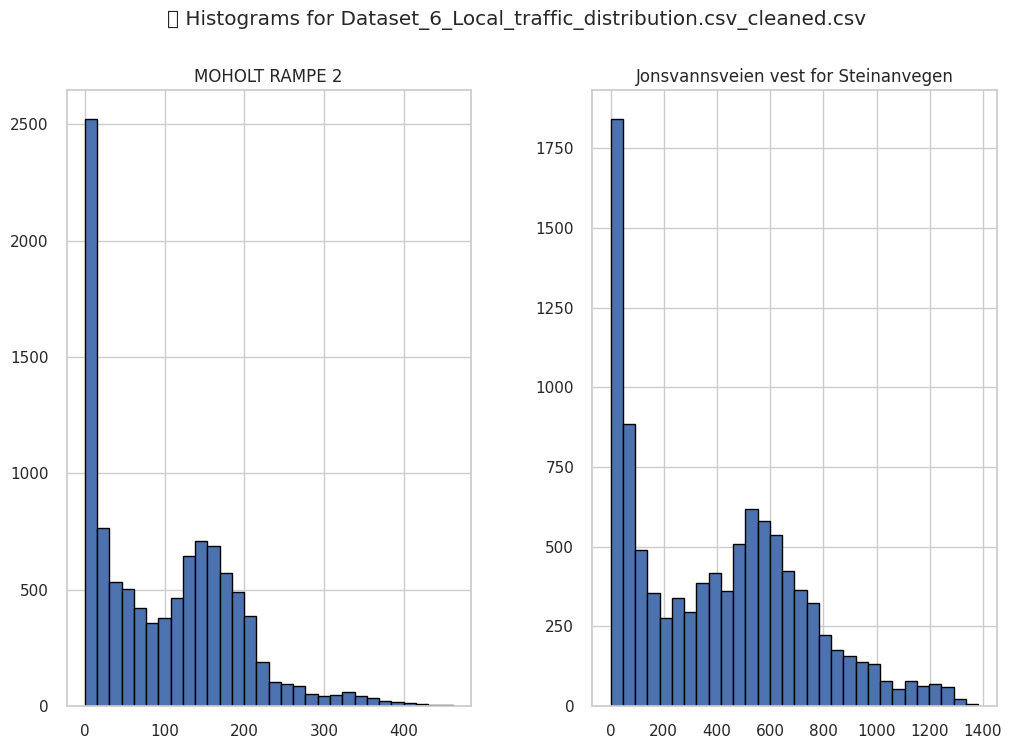

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


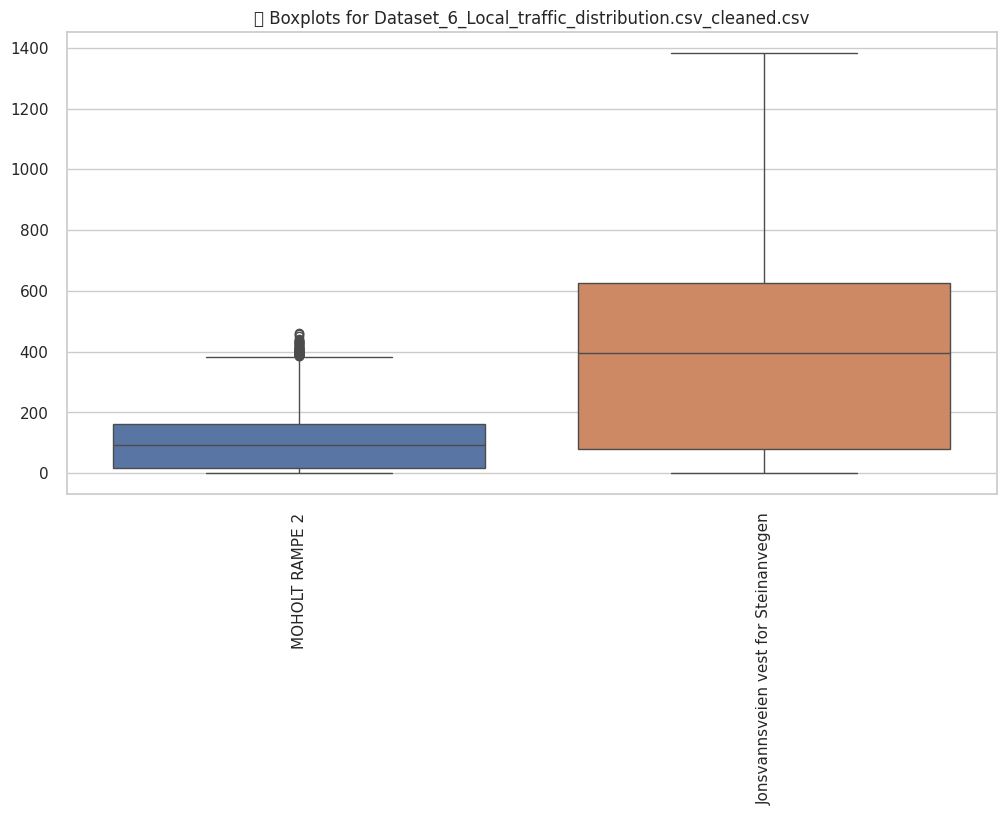


📊 Visualizing: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


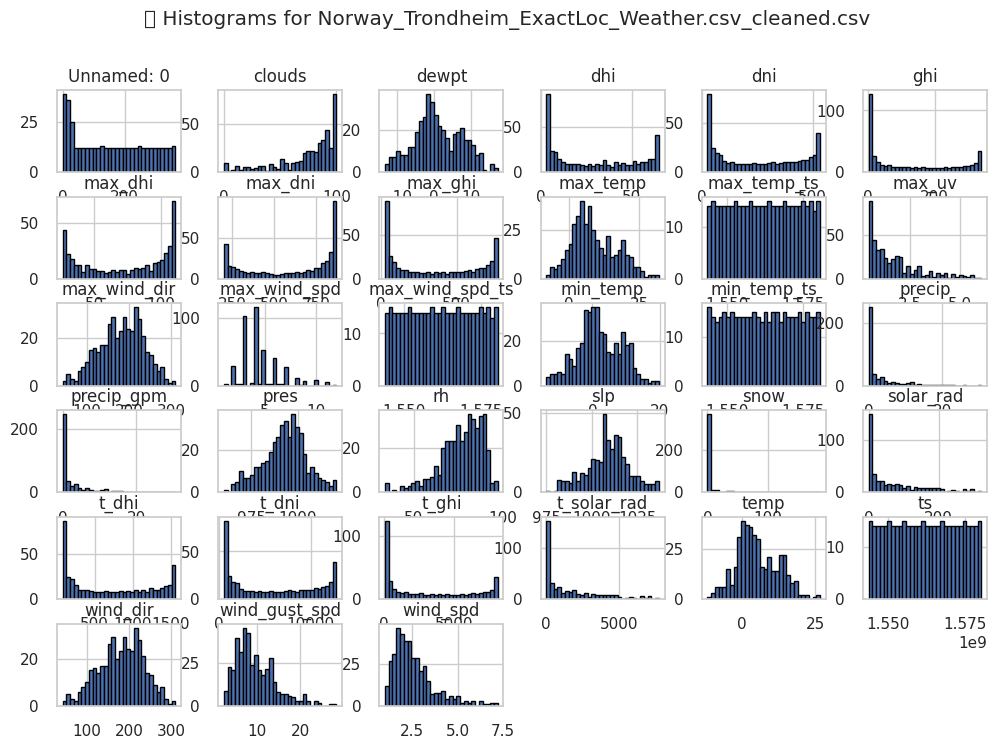

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


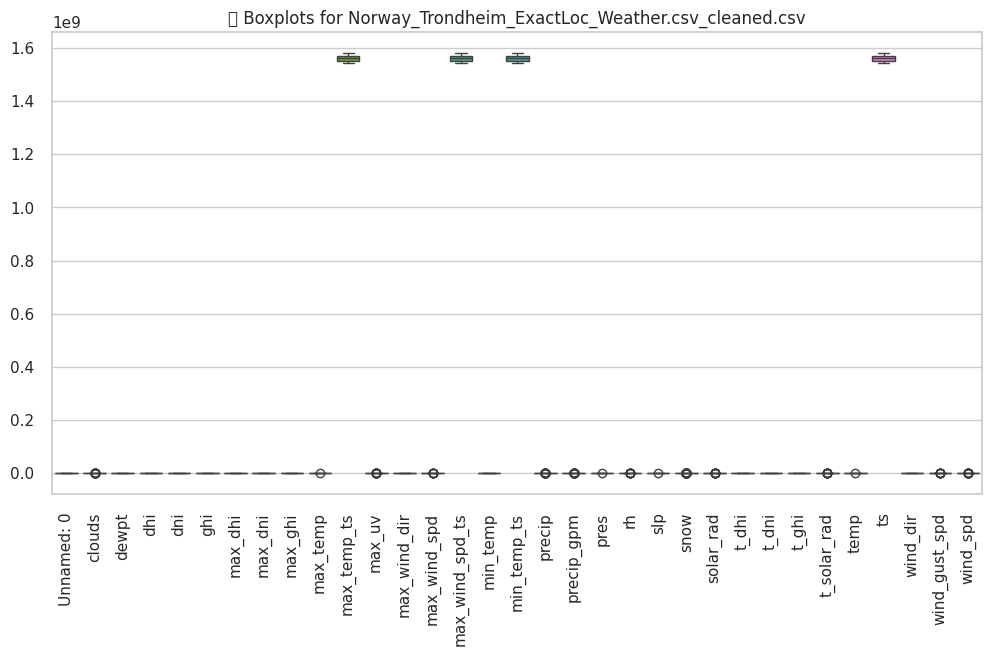

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Get list of cleaned CSV files
cleaned_files = [f for f in os.listdir() if f.endswith("_cleaned.csv")]

# Dictionary to store dataframes
eda_data = {}

# Load each cleaned dataset
for file in cleaned_files:
    df = pd.read_csv(file)
    eda_data[file] = df

# Function to visualize key insights
def visualize_data(df, file_name):
    print(f"\n📊 Visualizing: {file_name}")

    # 🔹 Histogram for Numerical Data
    df.hist(bins=30, figsize=(12, 8), edgecolor='black')
    plt.suptitle(f"📊 Histograms for {file_name}")
    plt.show()

    # 🔹 Boxplot for Outliers
    numeric_df = df.select_dtypes(include=["number"])
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title(f"📊 Boxplots for {file_name}")
    plt.show()

    # 🔹 Time-Series Trends (if "date_from" exists)
    if "date_from" in df.columns:
        df["date_from"] = pd.to_datetime(df["date_from"], errors="coerce")
        df = df.dropna(subset=["date_from"])  # Drop NaN dates
        df.set_index("date_from", inplace=True)

        plt.figure(figsize=(12, 6))
        for column in numeric_df.columns[:3]:  # Plot first 3 numerical columns
            if column in df.columns:
                plt.plot(df.index, df[column], label=column)

        plt.title(f"📈 Time Series Trends for {file_name}")
        plt.xlabel("Date")
        plt.ylabel("Values")
        plt.legend()
        plt.show()

# Apply visualization to all datasets
for file, df in eda_data.items():
    visualize_data(df, file)



📌 Summary Statistics for: Dataset_2_Hourly_EV_loads_-_Per_user.csv_cleaned.csv

               date_from           date_to User_ID    session_ID  \
count              88156             88156   88156  88156.000000   
unique              9762              9762      98           NaN   
top     29.01.2020 22:00  29.01.2020 23:00   Bl2-5           NaN   
freq                  37                37    4578           NaN   
mean                 NaN               NaN     NaN   3529.984062   
std                  NaN               NaN     NaN   1986.714983   
min                  NaN               NaN     NaN      1.000000   
25%                  NaN               NaN     NaN   1832.000000   
50%                  NaN               NaN     NaN   3625.000000   
75%                  NaN               NaN     NaN   5315.000000   
max                  NaN               NaN     NaN   6878.000000   

       Synthetic_3_6kW Synthetic_7_2kW Flex_3_6kW Flex_7_2kW  
count            88156           88156 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


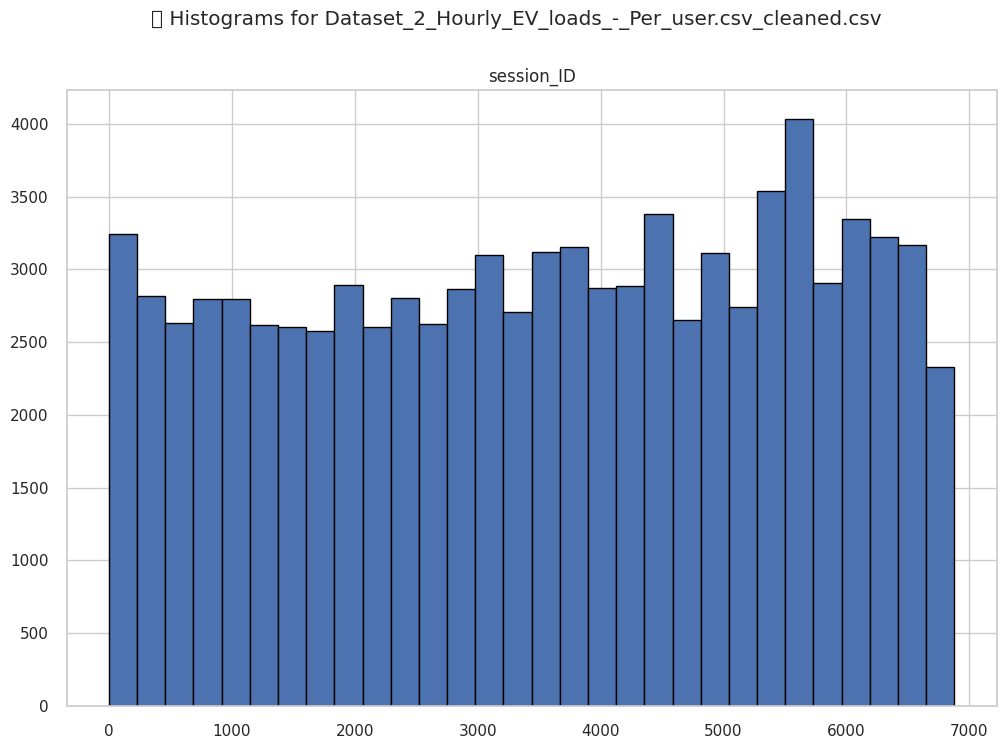

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


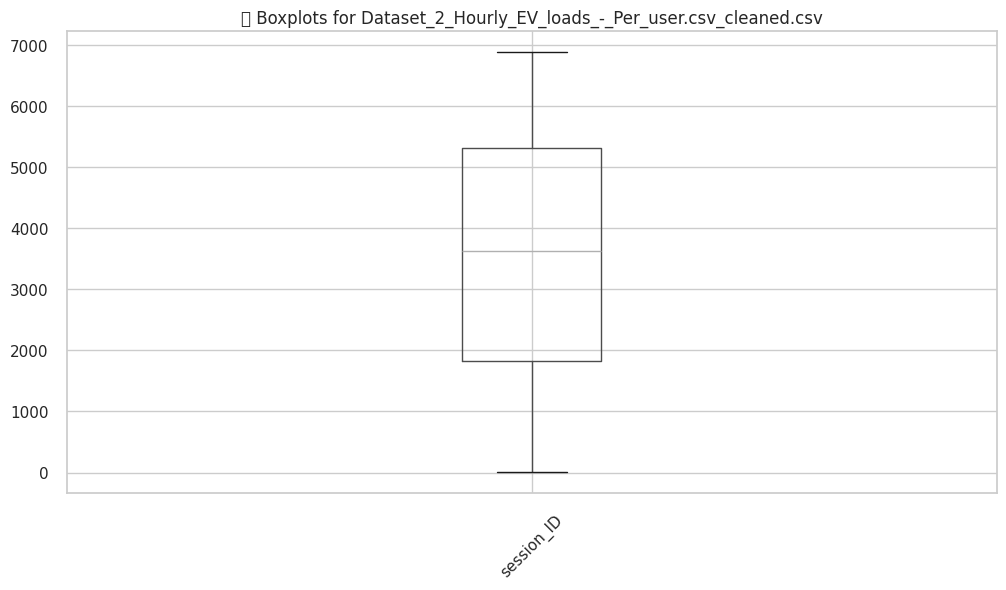


📌 Summary Statistics for: Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv

               date_from   daily_hour weekday month Synthetic_3_6kW  \
count               9757  9757.000000    9757  9757            9757   
unique              9756          NaN       7    12            2118   
top     27.10.2019 02:00          NaN  Friday   Jan               0   
freq                   2          NaN    1405  1487            3515   
mean                 NaN    11.505996     NaN   NaN             NaN   
std                  NaN     6.921223     NaN   NaN             NaN   
min                  NaN     0.000000     NaN   NaN             NaN   
25%                  NaN     6.000000     NaN   NaN             NaN   
50%                  NaN    12.000000     NaN   NaN             NaN   
75%                  NaN    18.000000     NaN   NaN             NaN   
max                  NaN    23.000000     NaN   NaN             NaN   

       Synthetic_7_2kW Flex_3_6kW Flex_7_2kW    n_priva

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


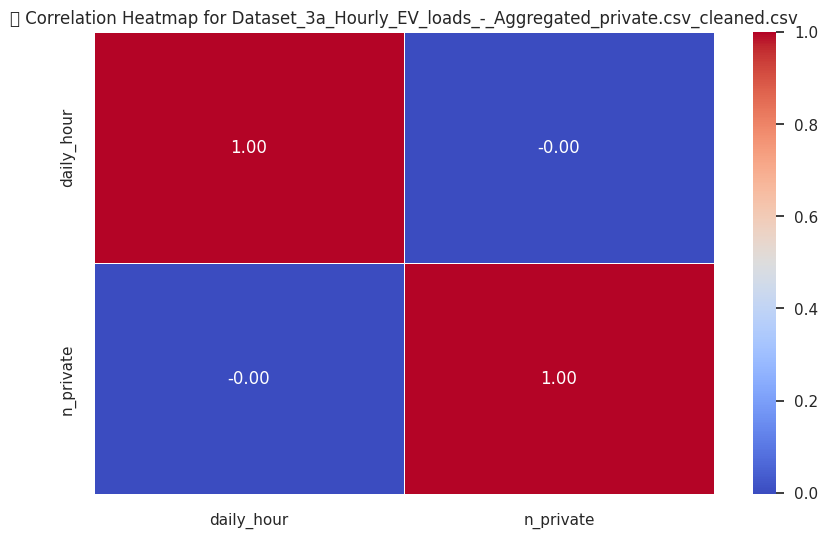

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


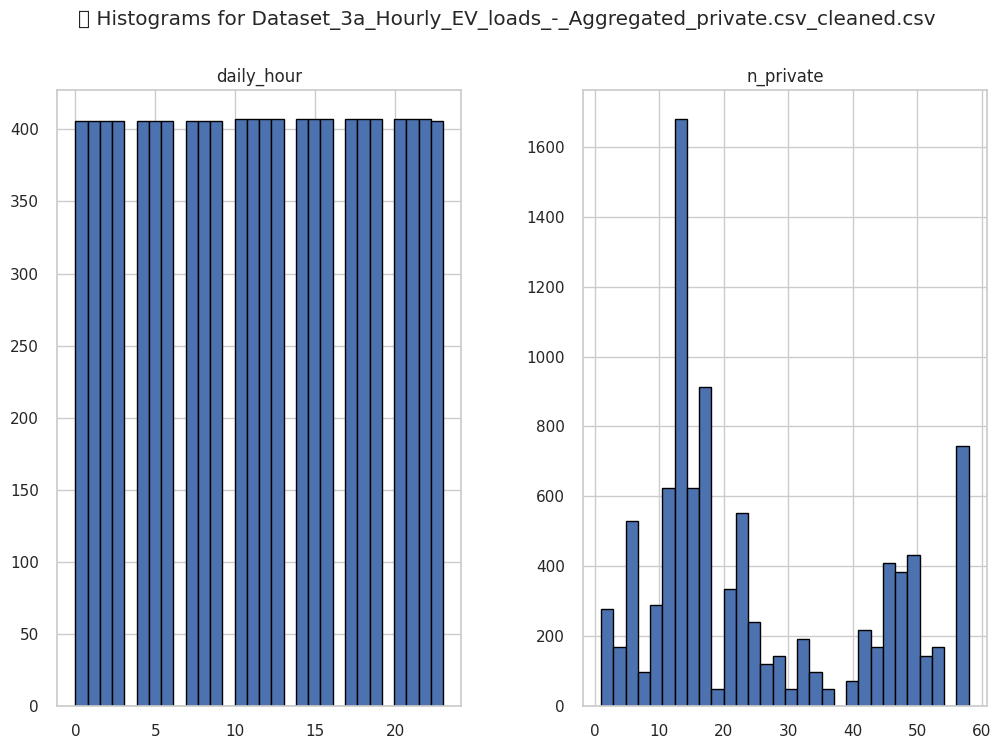

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


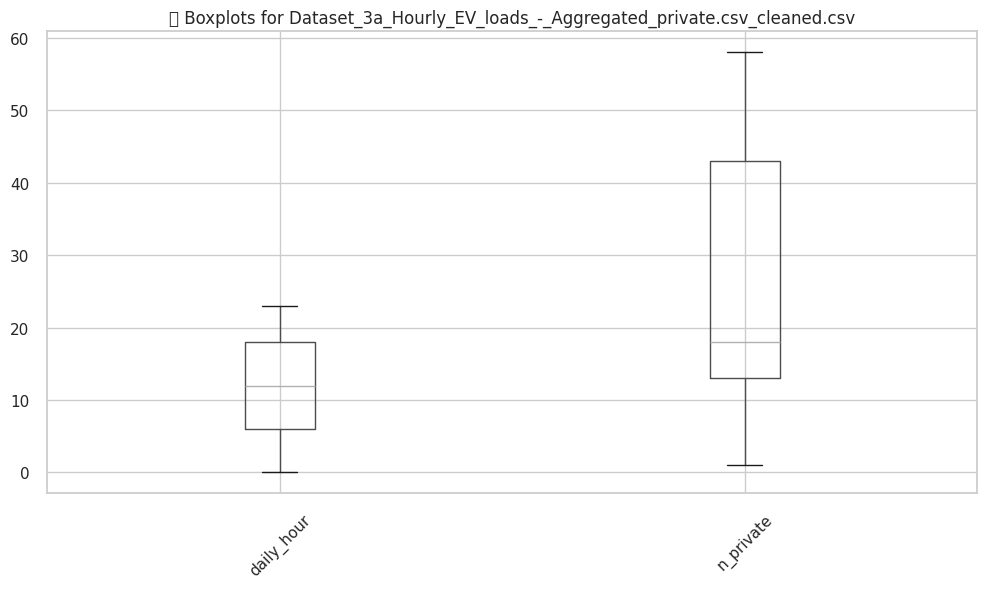


📌 Summary Statistics for: Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv

               date_from   daily_hour   weekday month Synthetic_3_6kW  \
count               9288  9288.000000      9288  9288            9288   
unique              9287          NaN         7    12             901   
top     27.10.2019 02:00          NaN  Thursday   Jan               0   
freq                   2          NaN      1344  1272            4291   
mean                 NaN    11.500000       NaN   NaN             NaN   
std                  NaN     6.922559       NaN   NaN             NaN   
min                  NaN     0.000000       NaN   NaN             NaN   
25%                  NaN     5.750000       NaN   NaN             NaN   
50%                  NaN    11.500000       NaN   NaN             NaN   
75%                  NaN    17.250000       NaN   NaN             NaN   
max                  NaN    23.000000       NaN   NaN             NaN   

       Synthetic_7_2kW Flex_3_6k

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


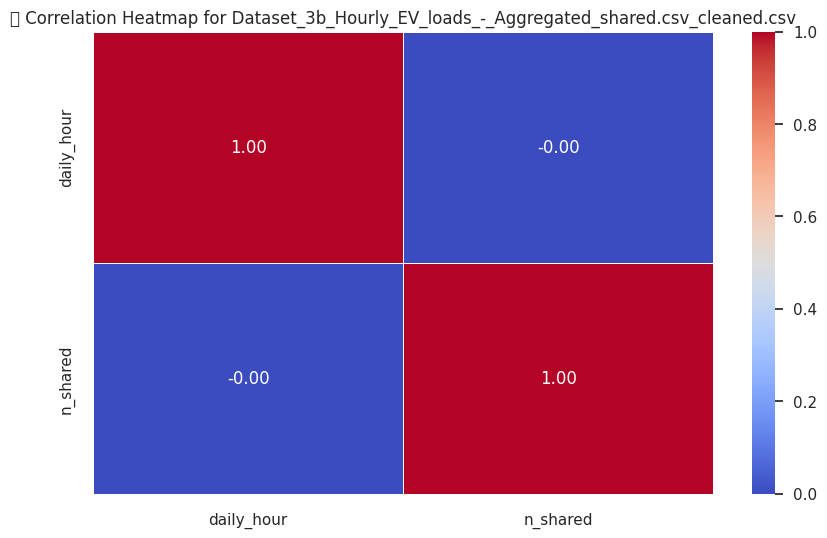

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


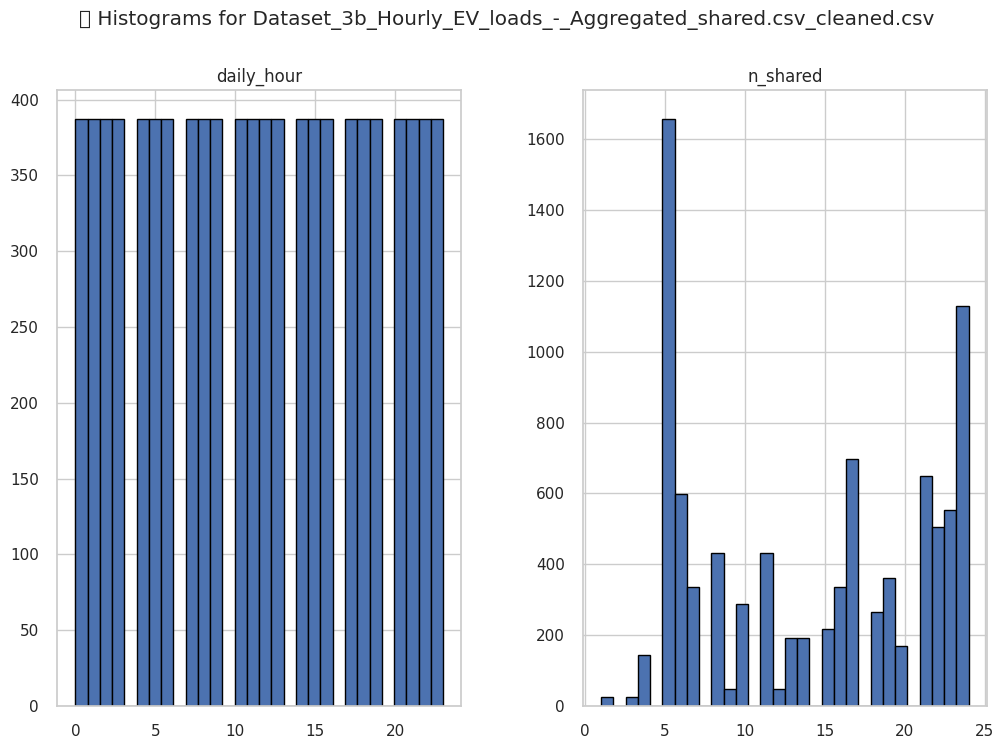

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


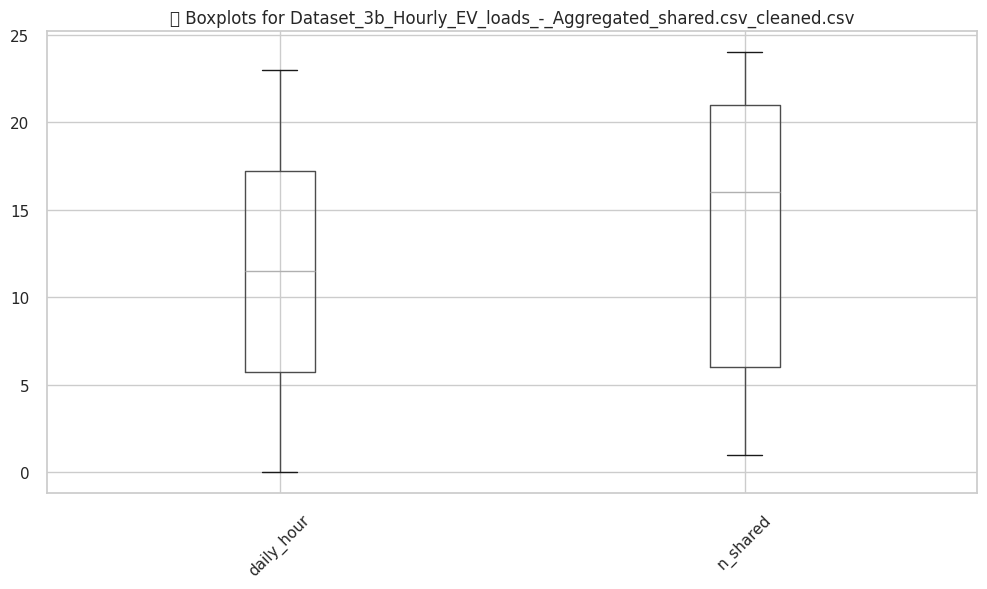


📌 Summary Statistics for: Dataset_5_AMS_data_from_garage_Bl2.csv_cleaned.csv

               date_from           date_to month AMS_kWh Synthetic_3_6kW  \
count               9466              9466  9466    9466            9466   
unique              9465              9463    12     417            1083   
top     27.10.2019 02:00  06.03.2019 13:00   Jan    0,05               0   
freq                   2                 3  1445    3704            3112   
mean                 NaN               NaN   NaN     NaN             NaN   
std                  NaN               NaN   NaN     NaN             NaN   
min                  NaN               NaN   NaN     NaN             NaN   
25%                  NaN               NaN   NaN     NaN             NaN   
50%                  NaN               NaN   NaN     NaN             NaN   
75%                  NaN               NaN   NaN     NaN             NaN   
max                  NaN               NaN   NaN     NaN             NaN   

       S

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


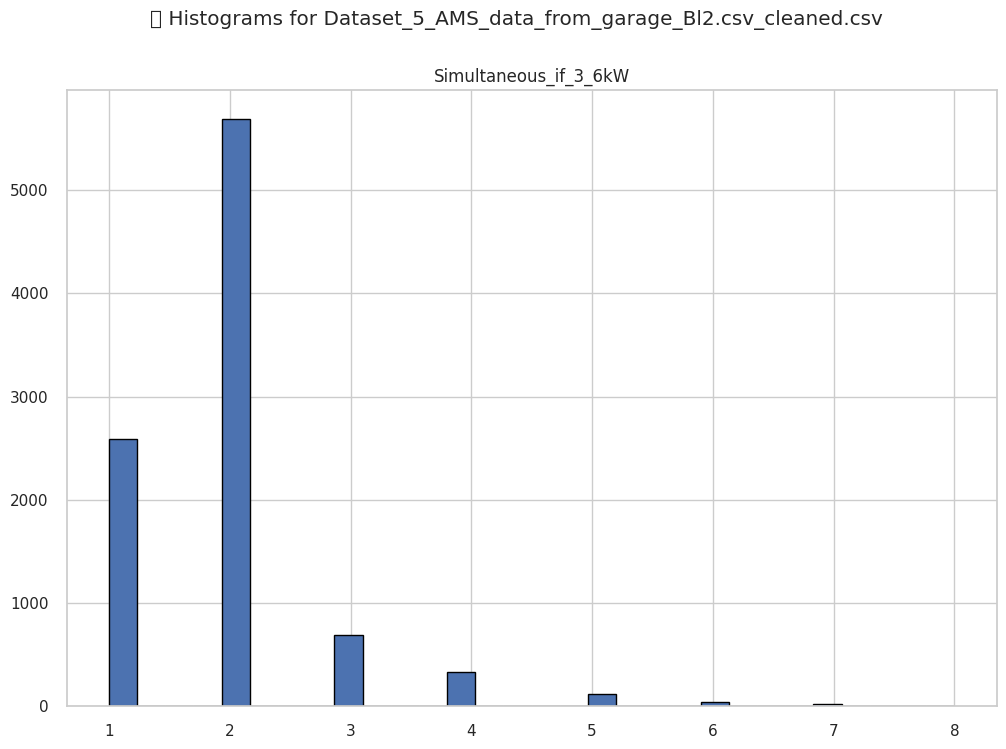

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


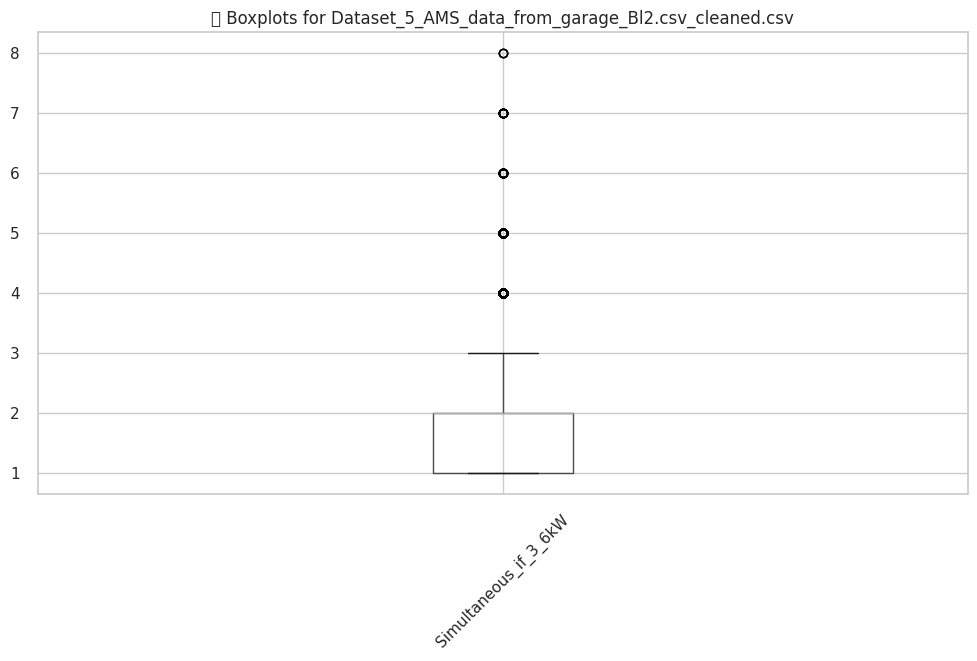


📌 Summary Statistics for: Dataset_1_EV_charging_reports.csv_cleaned.csv

         session_ID Garage_ID User_ID User_type Shared_ID      Start_plugin  \
count   6878.000000      6878    6878      6878      6878              6878   
unique          NaN        24      97         2        13              6740   
top             NaN       Bl2   Bl2-5   Private   Unknown  23.12.2019 11:23   
freq            NaN      2243     639      5466      5466                 7   
mean    3439.500000       NaN     NaN       NaN       NaN               NaN   
std     1985.651908       NaN     NaN       NaN       NaN               NaN   
min        1.000000       NaN     NaN       NaN       NaN               NaN   
25%     1720.250000       NaN     NaN       NaN       NaN               NaN   
50%     3439.500000       NaN     NaN       NaN       NaN               NaN   
75%     5158.750000       NaN     NaN       NaN       NaN               NaN   
max     6878.000000       NaN     NaN       NaN       NaN

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


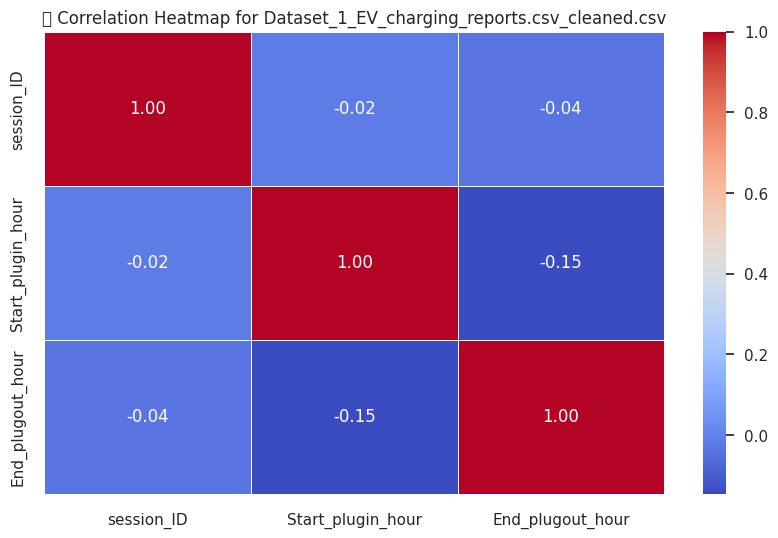

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


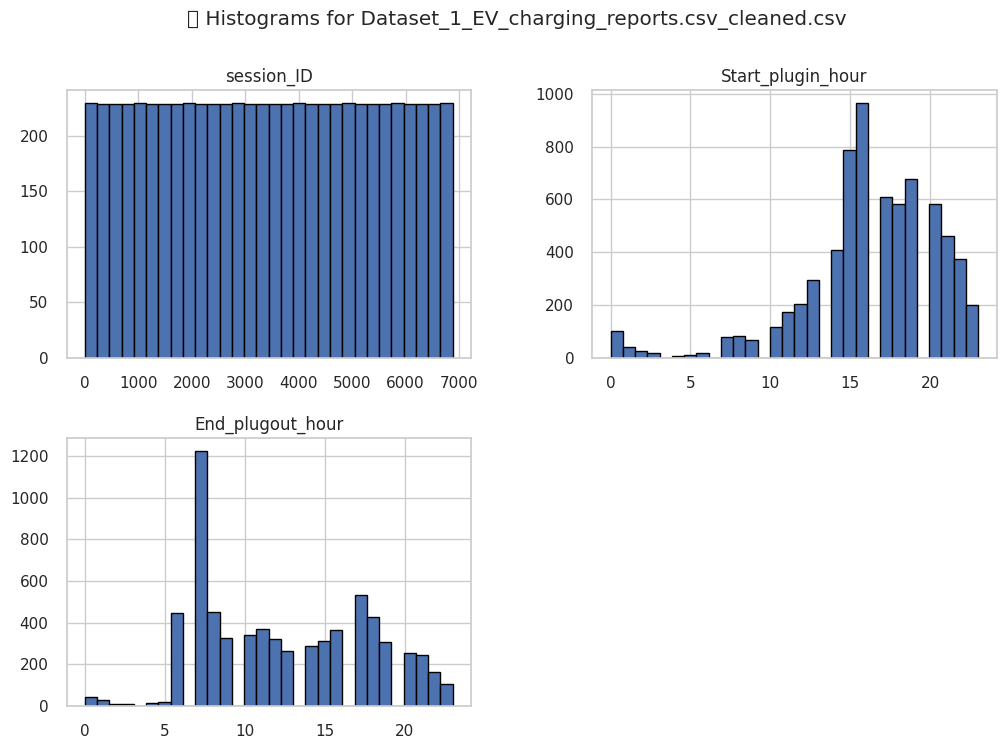

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


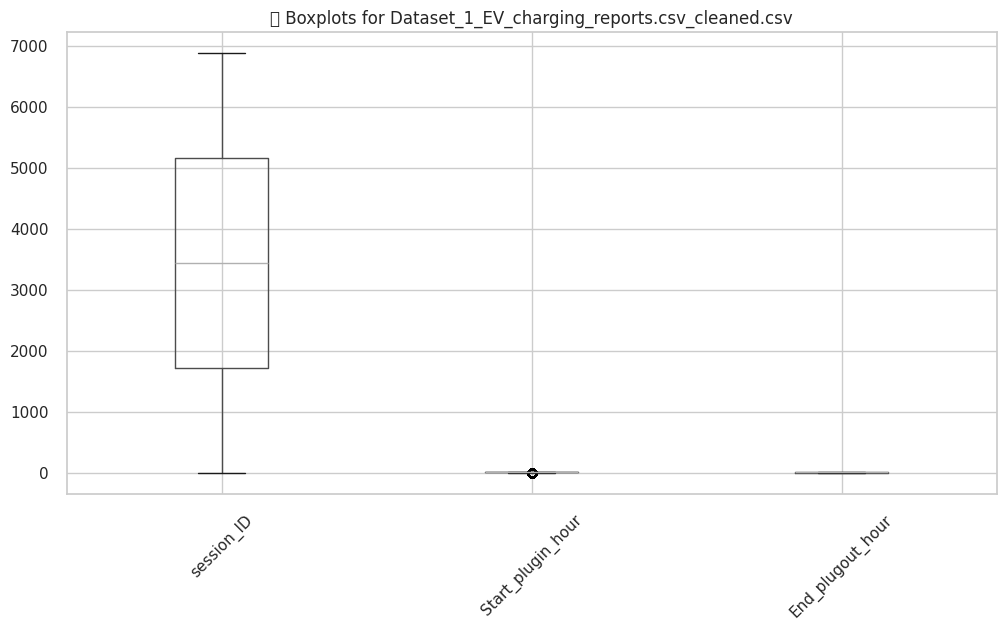


📌 Summary Statistics for: Dataset_6_Local_traffic_distribution.csv_cleaned.csv

               Date_from           Date_to KROPPAN BRU MOHOLTLIA SELSBAKK  \
count              10248             10248       10248     10248    10248   
unique             10247             10247        3835      2312      864   
top     27.10.2019 02:00  27.10.2019 02:00          69        29       24   
freq                   2                 2          18        41       77   
mean                 NaN               NaN         NaN       NaN      NaN   
std                  NaN               NaN         NaN       NaN      NaN   
min                  NaN               NaN         NaN       NaN      NaN   
25%                  NaN               NaN         NaN       NaN      NaN   
50%                  NaN               NaN         NaN       NaN      NaN   
75%                  NaN               NaN         NaN       NaN      NaN   
max                  NaN               NaN         NaN       NaN      Na

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


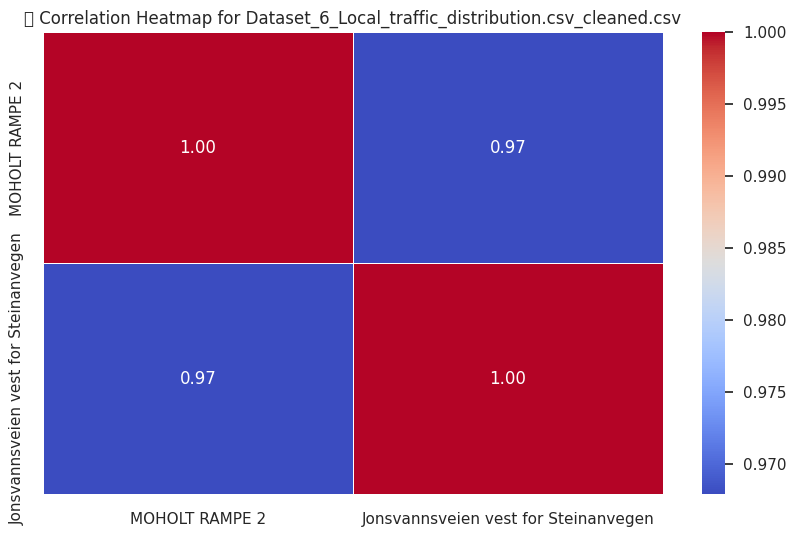

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


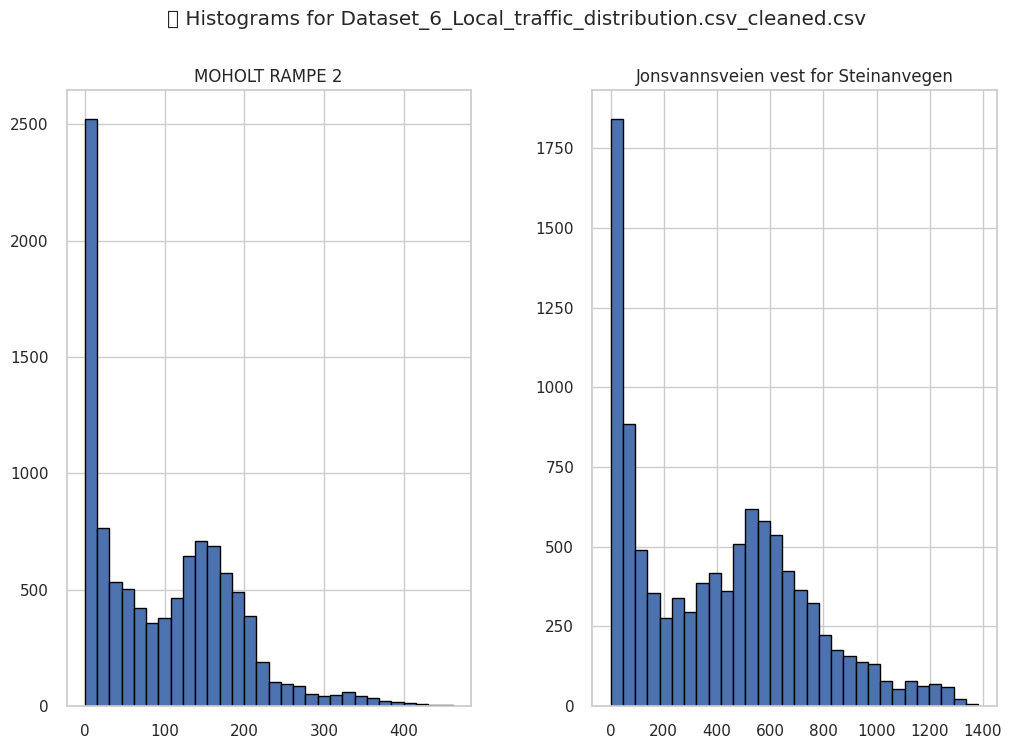

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


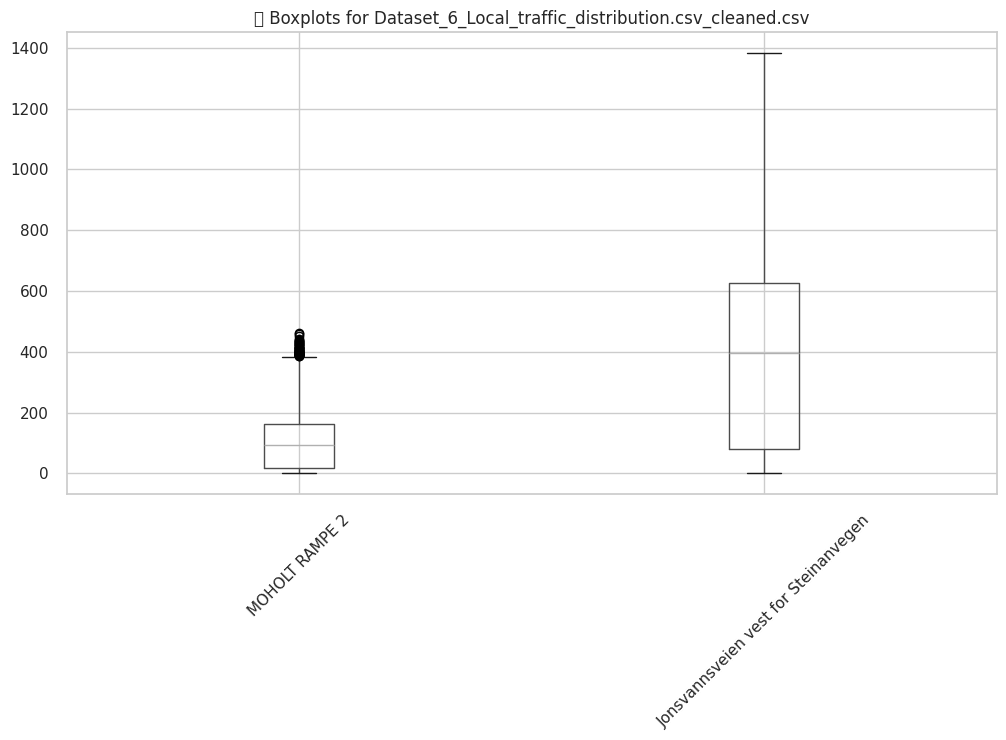


📌 Summary Statistics for: Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv

        Unnamed: 0      clouds    datetime       dewpt         dhi  \
count   427.000000  427.000000         427  427.000000  427.000000   
unique         NaN         NaN         427         NaN         NaN   
top            NaN         NaN  2018-12-01         NaN         NaN   
freq           NaN         NaN           1         NaN         NaN   
mean    156.971897   74.662763         NaN    1.039578   29.702576   
std     113.713561   25.635374         NaN    6.338840   22.245811   
min       0.000000    0.000000         NaN  -13.100000    3.000000   
25%      43.500000   65.000000         NaN   -3.150000    7.000000   
50%     150.000000   84.000000         NaN    0.300000   26.000000   
75%     256.500000   93.500000         NaN    6.100000   51.500000   
max     363.000000  100.000000         NaN   17.200000   65.000000   

               dni         ghi     max_dhi     max_dni     max_ghi  ...  \
count 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


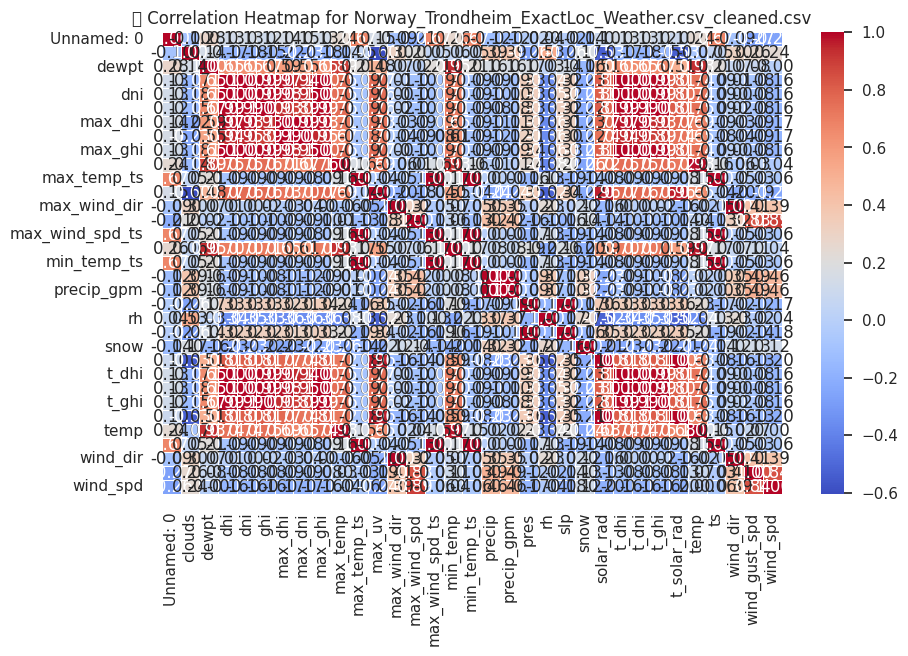

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


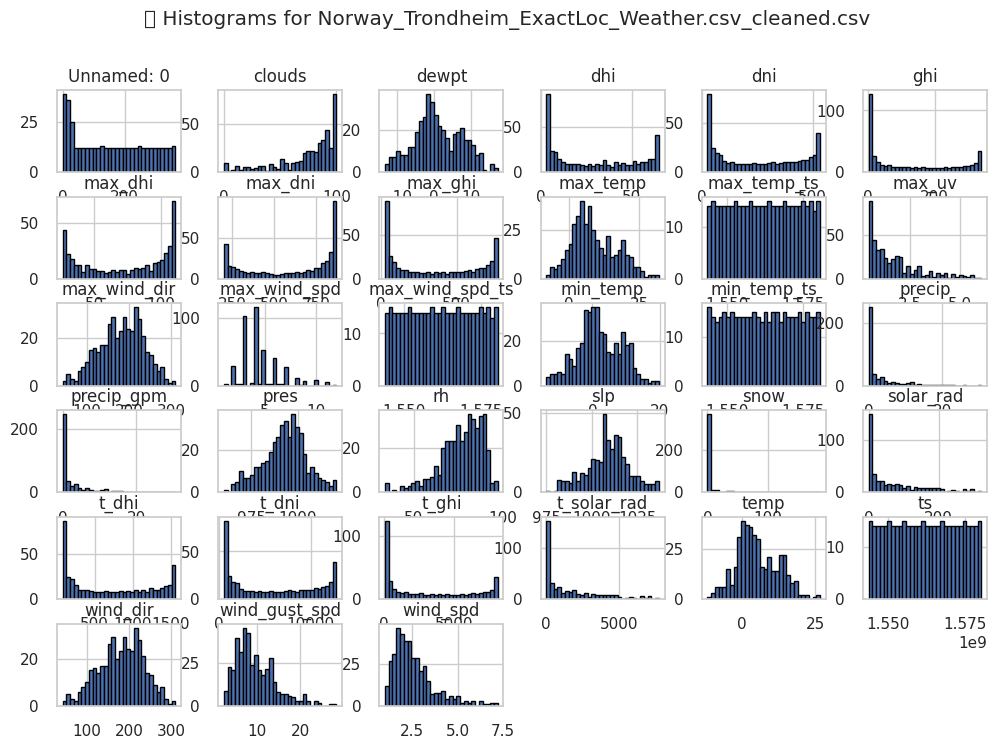

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


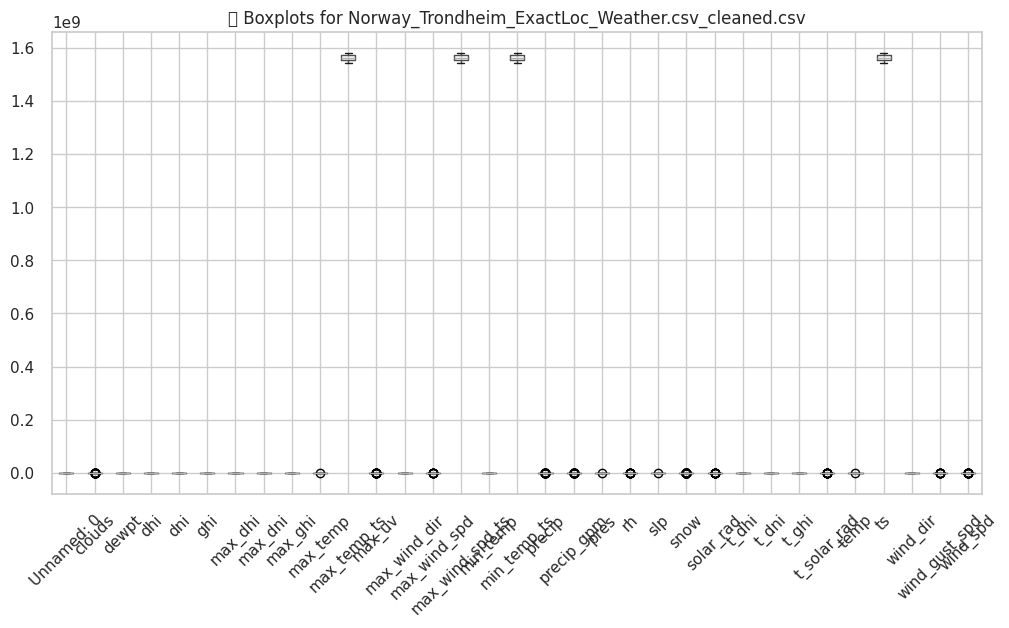

<ipython-input-10-705b8b35a6d1>:47: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


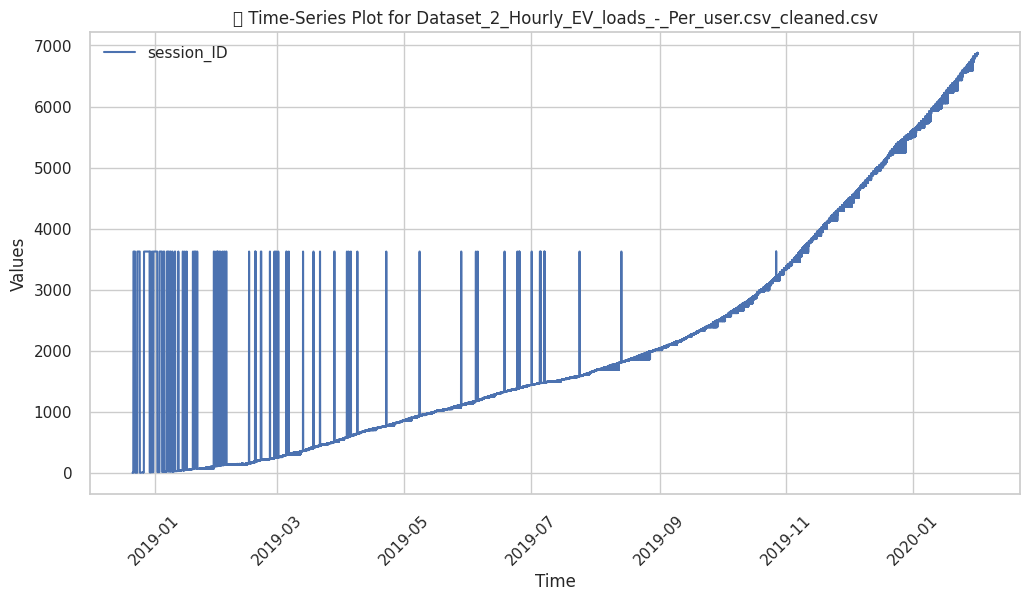

<ipython-input-10-705b8b35a6d1>:47: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


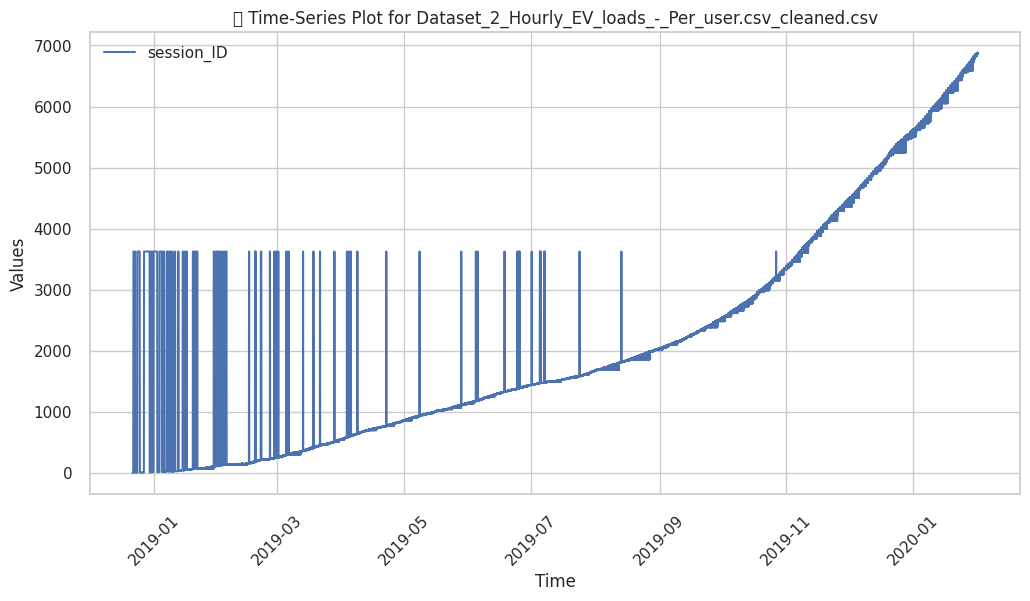

<ipython-input-10-705b8b35a6d1>:47: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


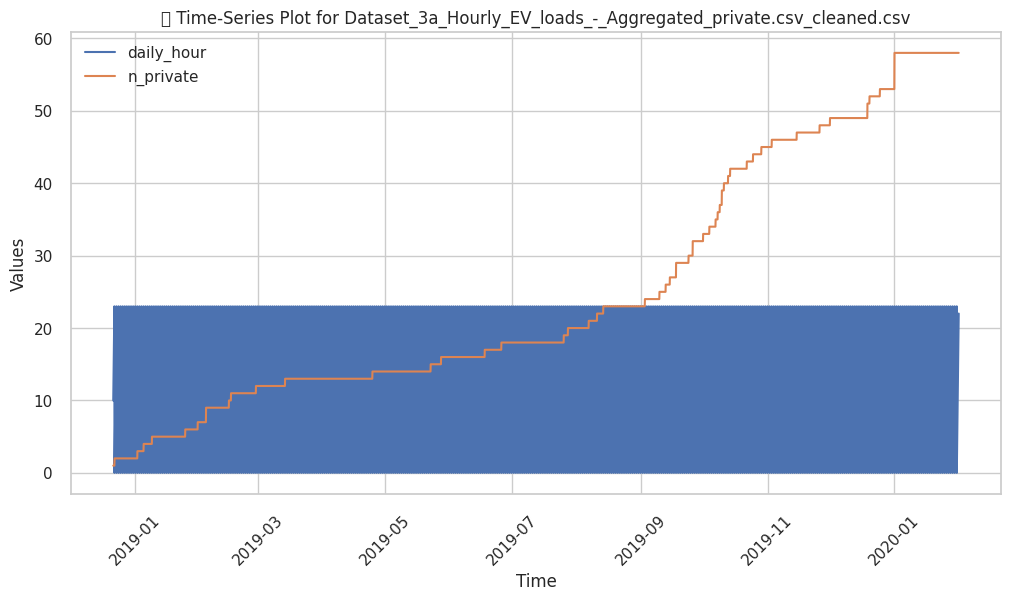

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


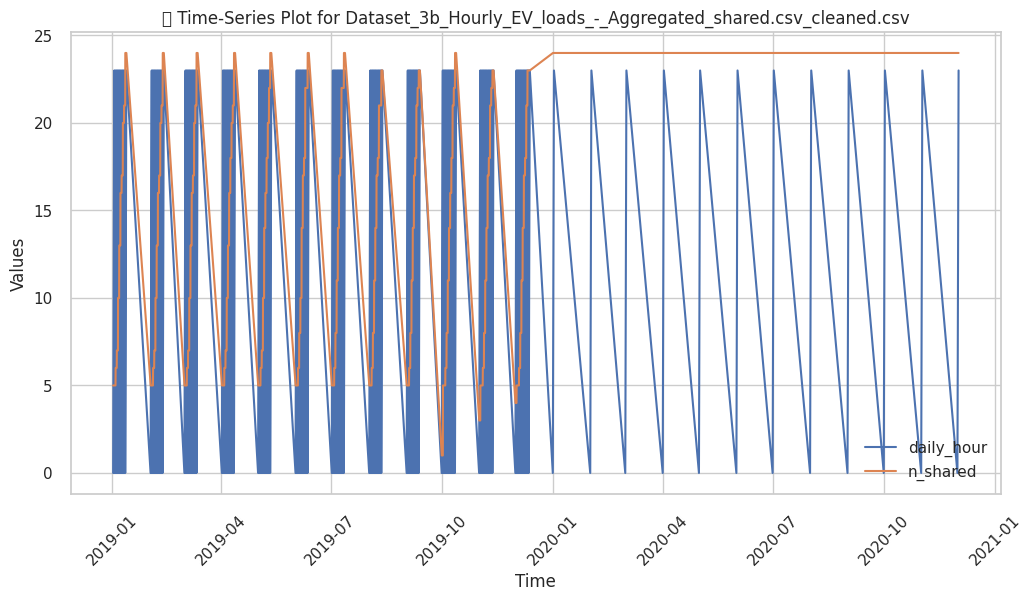

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


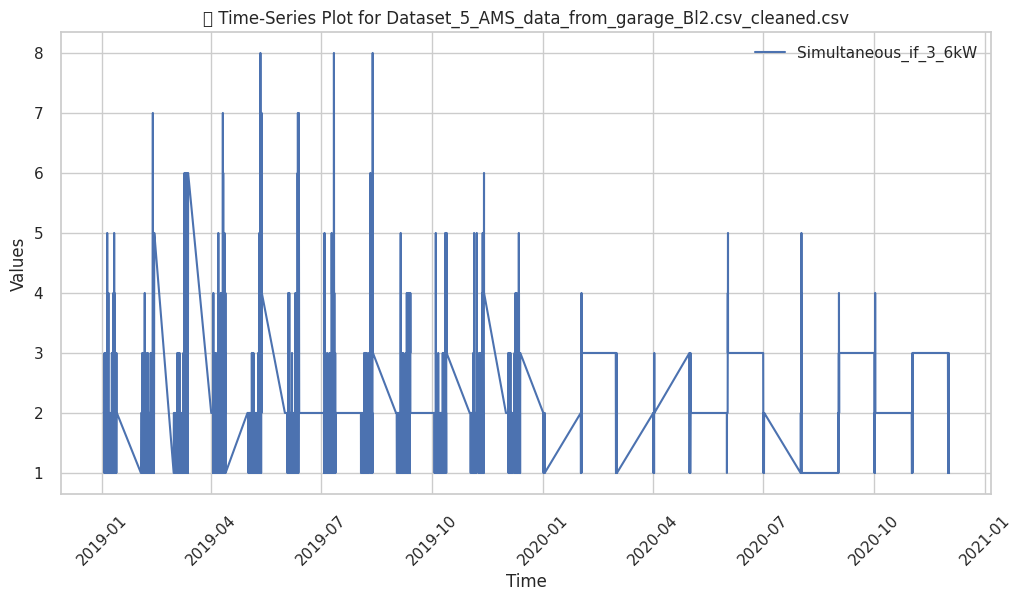

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


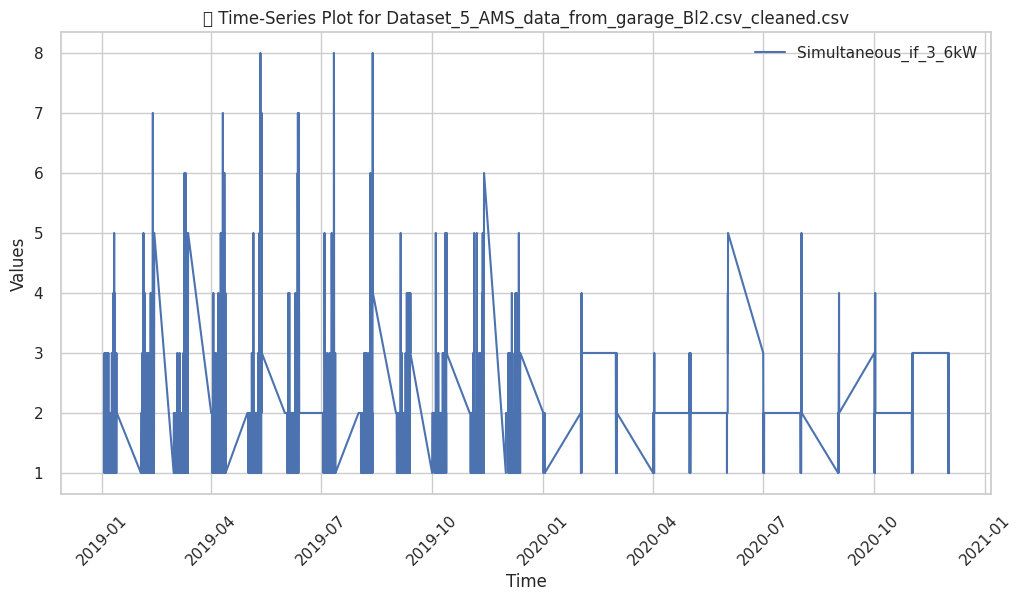

<ipython-input-10-705b8b35a6d1>:47: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


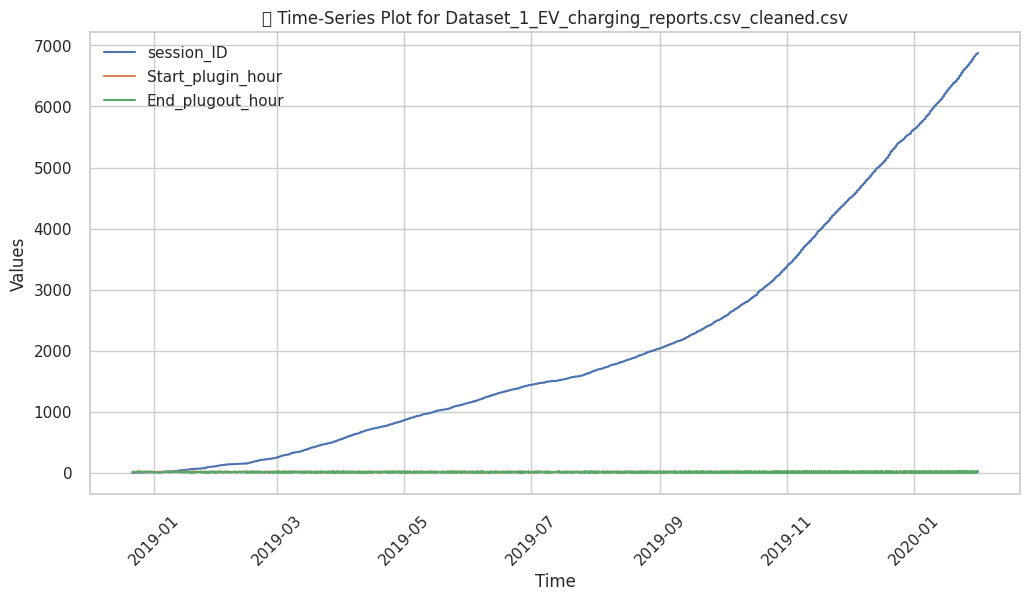

<ipython-input-10-705b8b35a6d1>:47: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


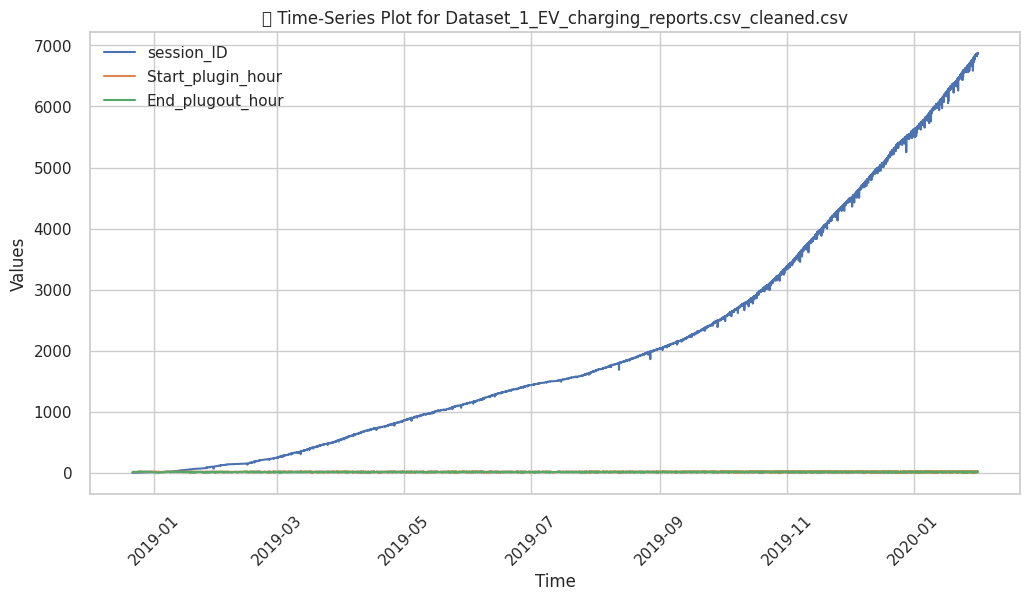

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


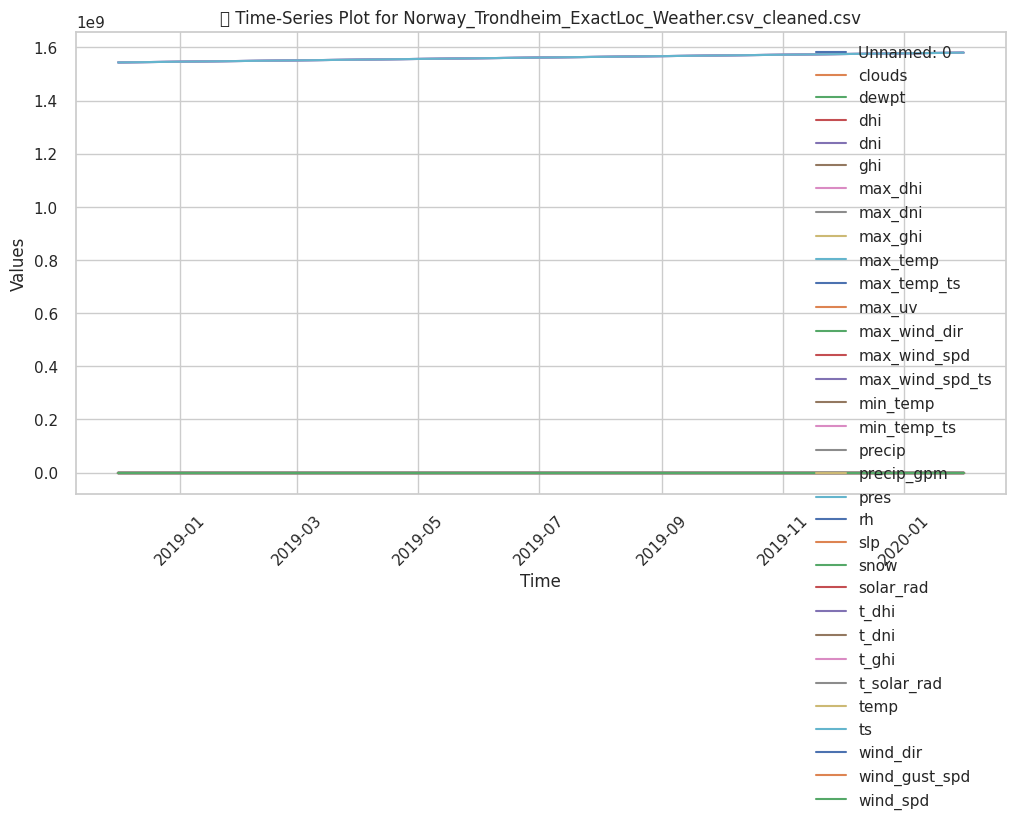

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory where the cleaned files are stored
cleaned_data_dir = "/content"

# List all cleaned CSV files
cleaned_files = [f for f in os.listdir(cleaned_data_dir) if f.endswith("_cleaned.csv")]

# Load the datasets
dfs = {file: pd.read_csv(os.path.join(cleaned_data_dir, file)) for file in cleaned_files}

# Exploratory Data Analysis (EDA)
for file_name, df in dfs.items():
    print(f"\n📌 Summary Statistics for: {file_name}\n")
    print(df.describe(include="all"))
    print("\n🔍 Checking for missing values:\n", df.isnull().sum())

    # Compute and display correlation matrix for numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title(f"🔍 Correlation Heatmap for {file_name}")
        plt.show()

    # Histograms for numerical columns
    df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
    plt.suptitle(f"📊 Histograms for {file_name}")
    plt.show()

    # Boxplots to check distributions and outliers
    plt.figure(figsize=(12, 6))
    df[numeric_cols].boxplot()
    plt.title(f"📦 Boxplots for {file_name}")
    plt.xticks(rotation=45)
    plt.show()

# Time-series visualization for datasets containing datetime columns
for file_name, df in dfs.items():
    time_cols = ["datetime", "date_from", "date_to", "Start_plugin", "End_plugout"]
    time_cols = [col for col in time_cols if col in df.columns]

    for col in time_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
        df = df.dropna(subset=[col])  # Drop rows with NaT values
        df = df.sort_values(by=col)  # Sort by datetime

        plt.figure(figsize=(12, 6))
        for numeric_col in df.select_dtypes(include=['number']).columns:
            plt.plot(df[col], df[numeric_col], label=numeric_col)
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Values")
        plt.title(f"⏳ Time-Series Plot for {file_name}")
        plt.xticks(rotation=45)
        plt.show()


<ipython-input-11-81c6873491e3>:15: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


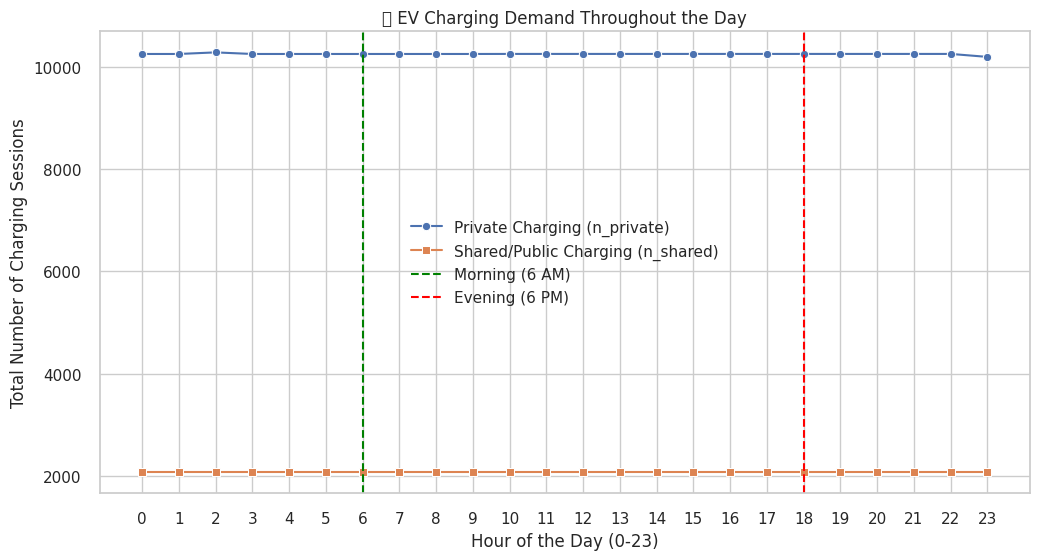

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


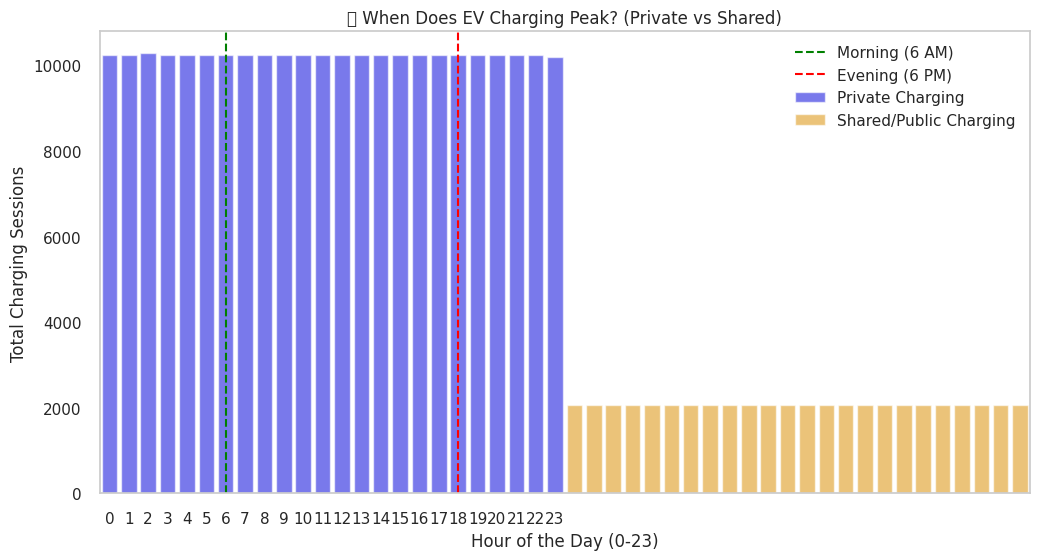

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths for private and shared charging datasets
private_file = "/content/Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv"
shared_file = "/content/Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv"

# Load the datasets
private_df = pd.read_csv(private_file)
shared_df = pd.read_csv(shared_file)

# Ensure datetime is in the correct format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce")

# Extract hour of the day
private_df["hour"] = private_df["date_from"].dt.hour
shared_df["hour"] = shared_df["date_from"].dt.hour

# Group by hour to find peak charging times
private_hourly = private_df.groupby("hour")["n_private"].sum()
shared_hourly = shared_df.groupby("hour")["n_shared"].sum()

# 📊 Plot peak charging trends (Private vs Shared Charging)
plt.figure(figsize=(12, 6))
sns.lineplot(x=private_hourly.index, y=private_hourly.values, label="Private Charging (n_private)", marker="o")
sns.lineplot(x=shared_hourly.index, y=shared_hourly.values, label="Shared/Public Charging (n_shared)", marker="s")

plt.axvline(6, color="green", linestyle="--", label="Morning (6 AM)")
plt.axvline(18, color="red", linestyle="--", label="Evening (6 PM)")

plt.title("🔋 EV Charging Demand Throughout the Day")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Total Number of Charging Sessions")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24, 1))
plt.show()

# 📊 Barplot for better visual representation
plt.figure(figsize=(12, 6))
sns.barplot(x=private_hourly.index, y=private_hourly.values, color="blue", alpha=0.6, label="Private Charging")
sns.barplot(x=shared_hourly.index, y=shared_hourly.values, color="orange", alpha=0.6, label="Shared/Public Charging")

plt.axvline(6, color="green", linestyle="--", label="Morning (6 AM)")
plt.axvline(18, color="red", linestyle="--", label="Evening (6 PM)")

plt.title("⏳ When Does EV Charging Peak? (Private vs Shared)")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Total Charging Sessions")
plt.legend()
plt.xticks(range(0, 24, 1))
plt.grid(axis="y")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


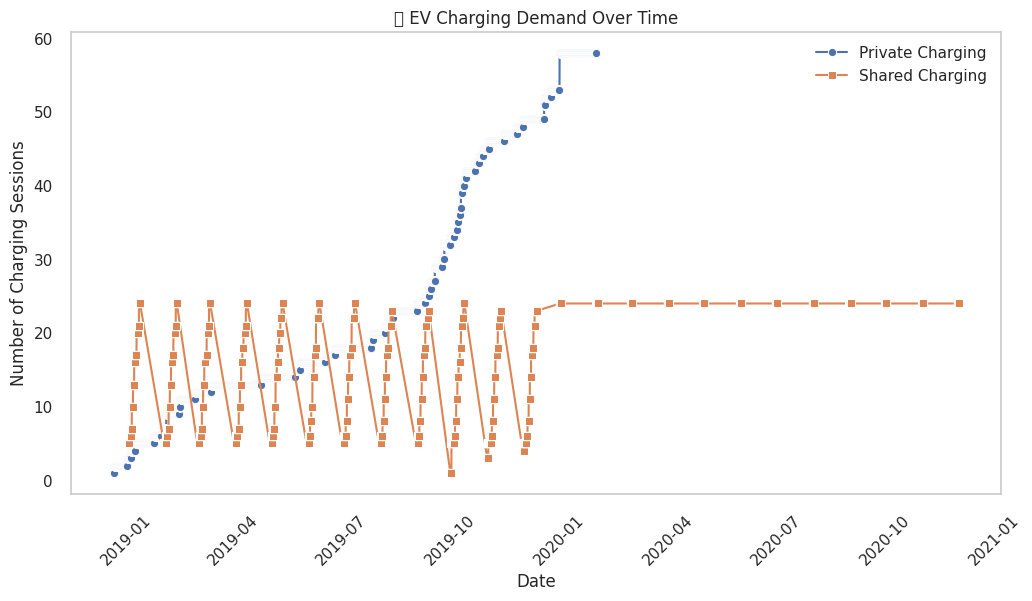

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=private_df["date_from"], y=private_df["n_private"], label="Private Charging", marker="o")
sns.lineplot(x=shared_df["date_from"], y=shared_df["n_shared"], label="Shared Charging", marker="s")

plt.title("🔋 EV Charging Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Charging Sessions")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


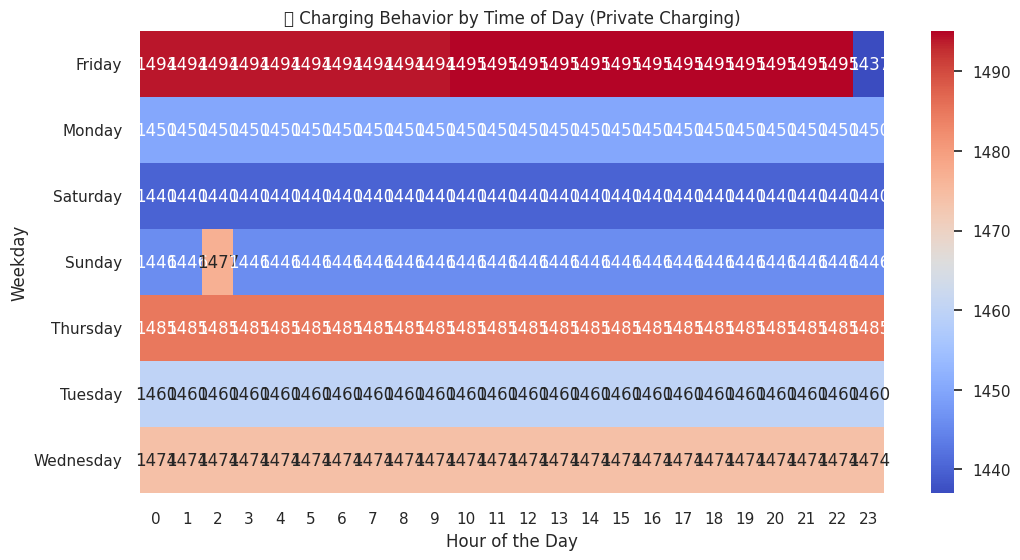

In [ ]:
private_df["hour"] = private_df["date_from"].dt.hour
private_df["weekday"] = private_df["date_from"].dt.day_name()

heatmap_data = private_df.pivot_table(index="weekday", columns="hour", values="n_private", aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("⏳ Charging Behavior by Time of Day (Private Charging)")
plt.xlabel("Hour of the Day")
plt.ylabel("Weekday")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


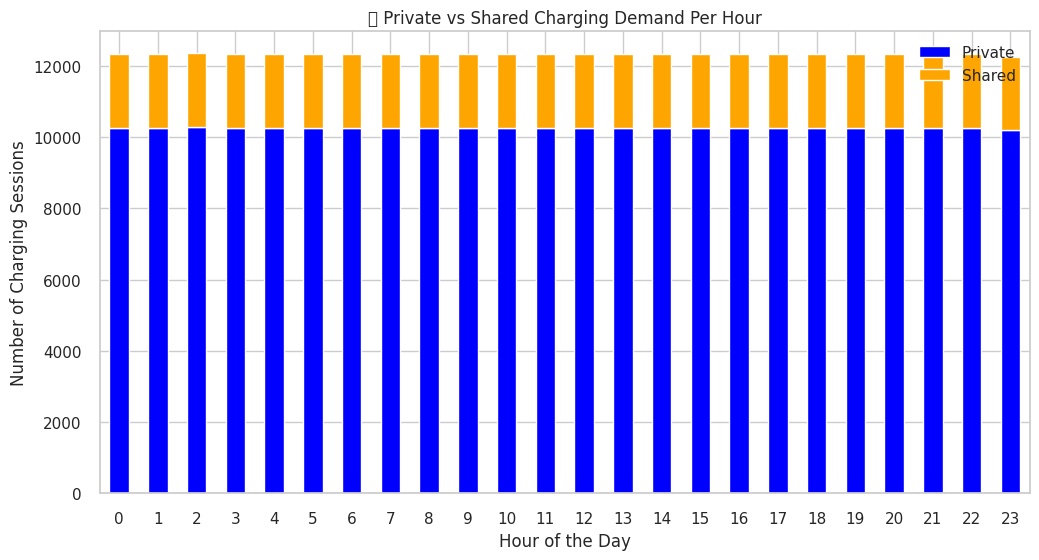

In [ ]:
combined_df = private_df.groupby("hour")["n_private"].sum().to_frame()
combined_df["n_shared"] = shared_df.groupby("hour")["n_shared"].sum()

combined_df.plot(kind="bar", stacked=True, figsize=(12, 6), color=["blue", "orange"])
plt.title("🏠 Private vs Shared Charging Demand Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Charging Sessions")
plt.legend(["Private", "Shared"])
plt.xticks(rotation=0)
plt.show()


<ipython-input-15-34f7a8e2e1ca>:11: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  charging_df["date_from"] = pd.to_datetime(charging_df["date_from"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


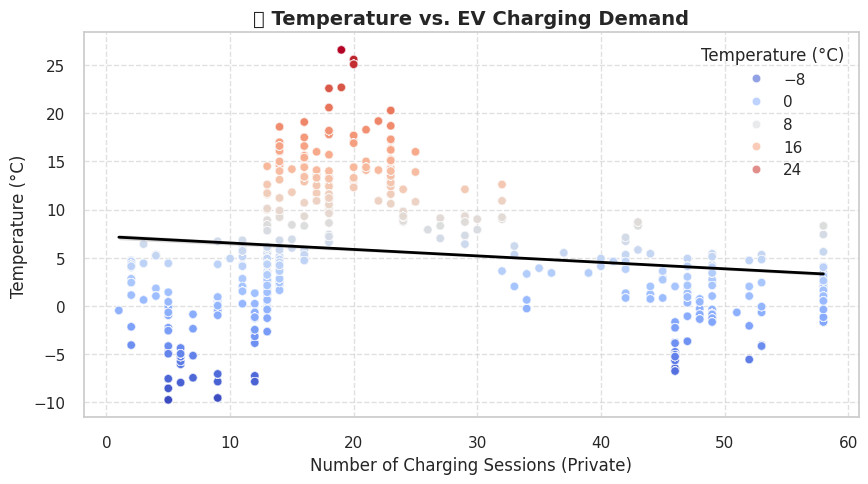

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
weather_df = pd.read_csv("/content/Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv")
charging_df = pd.read_csv("/content/Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")

# Convert date columns to datetime format
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"], errors="coerce")
charging_df["date_from"] = pd.to_datetime(charging_df["date_from"], errors="coerce")

# Drop missing values before merging
weather_df = weather_df.dropna(subset=["datetime", "temp"])
charging_df = charging_df.dropna(subset=["date_from", "n_private"])

# Convert to numeric types
charging_df["n_private"] = pd.to_numeric(charging_df["n_private"], errors="coerce")
weather_df["temp"] = pd.to_numeric(weather_df["temp"], errors="coerce")

# Sort values before merging
charging_df = charging_df.sort_values("date_from")
weather_df = weather_df.sort_values("datetime")

# Merge on closest timestamps
merged_df = pd.merge_asof(charging_df, weather_df, left_on="date_from", right_on="datetime")

# Drop NaN values after merging
merged_df = merged_df.dropna(subset=["n_private", "temp"])

# Ensure data is not empty before plotting
if merged_df.empty:
    print("❌ No valid data to plot. Check dataset values!")
else:
    # Plot scatter plot with regression line
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=merged_df["n_private"], y=merged_df["temp"], hue=merged_df["temp"], palette="coolwarm", alpha=0.6)
    sns.regplot(x=merged_df["n_private"], y=merged_df["temp"], scatter=False, color="black", line_kws={"linewidth": 2})

    # Formatting
    plt.title("🌡 Temperature vs. EV Charging Demand", fontsize=14, fontweight="bold")
    plt.xlabel("Number of Charging Sessions (Private)", fontsize=12)
    plt.ylabel("Temperature (°C)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Temperature (°C)")
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set_style("whitegrid")

# Define file paths for cleaned datasets
private_file = "/content/cleaned_datasets/Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv"
shared_file = "/content/cleaned_datasets/Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv"

# Load the datasets
private_df = pd.read_csv(private_file)
shared_df = pd.read_csv(shared_file)

# Convert date columns to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce")

# Extract hour of the day for analysis
private_df["hour"] = private_df["date_from"].dt.hour
shared_df["hour"] = shared_df["date_from"].dt.hour

# Aggregate number of charging sessions by hour
private_hourly = private_df.groupby("hour")["n_private"].sum()
shared_hourly = shared_df.groupby("hour")["n_shared"].sum()

# 🔹 **Plot Private vs Shared Charging Demand by Hour**
plt.figure(figsize=(12, 6))
plt.plot(private_hourly, marker="o", label="Private Charging Demand", linestyle="-")
plt.plot(shared_hourly, marker="s", label="Shared/Public Charging Demand", linestyle="--")

plt.axvspan(6, 9, color="lightgray", alpha=0.3, label="Morning Peak (6AM-9AM)")
plt.axvspan(17, 21, color="gray", alpha=0.3, label="Evening Peak (5PM-9PM)")

plt.xlabel("Hour of the Day")
plt.ylabel("Total Charging Sessions")
plt.title("⏰ Peak EV Charging Trends (Private vs Shared)")
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)

# Show plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_datasets/Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv'

Private Data Columns: Index(['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_private', 'hour'],
      dtype='object')
Shared Data Columns: Index(['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_shared', 'hour'],
      dtype='object')
Private Data Points in Range: 8760
Shared Data Points in Range: 3240


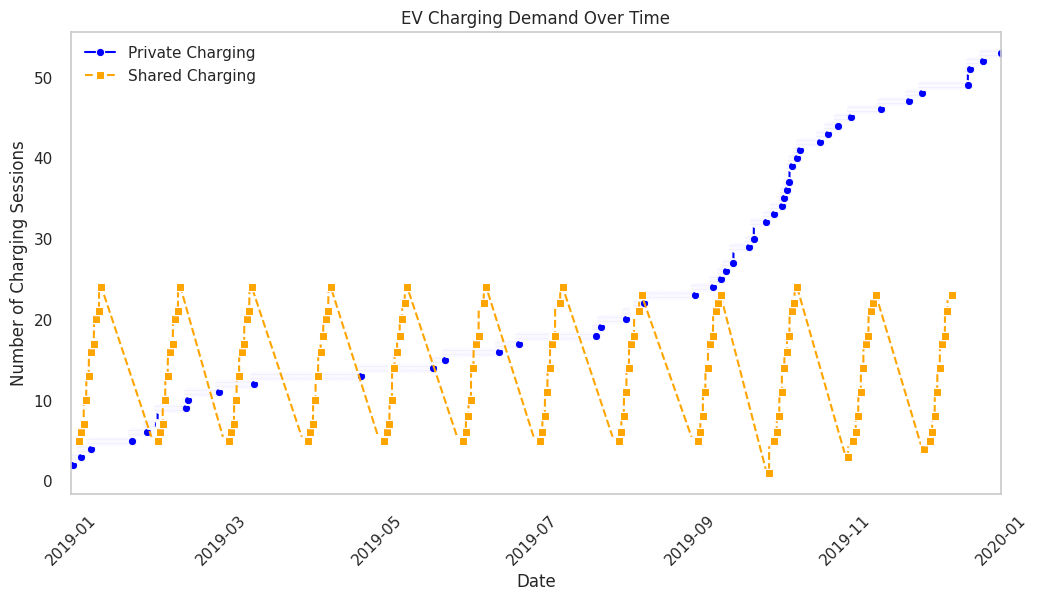

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Ensure `date_from` is in datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce")

# ✅ Check if the column exists
print("Private Data Columns:", private_df.columns)
print("Shared Data Columns:", shared_df.columns)

# ✅ Filter Data Within Specified Range
private_df = private_df[(private_df["date_from"] >= "2019-01-01") & (private_df["date_from"] < "2020-01-01")]
shared_df = shared_df[(shared_df["date_from"] >= "2019-01-01") & (shared_df["date_from"] < "2020-01-01")]

# ✅ Check if data exists
print("Private Data Points in Range:", len(private_df))
print("Shared Data Points in Range:", len(shared_df))

# ✅ Drop NaNs and Convert to Numeric
private_df = private_df.dropna(subset=["n_private"])
shared_df = shared_df.dropna(subset=["n_shared"])
private_df["n_private"] = pd.to_numeric(private_df["n_private"], errors="coerce")
shared_df["n_shared"] = pd.to_numeric(shared_df["n_shared"], errors="coerce")

# ✅ Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=private_df["date_from"], y=private_df["n_private"], label="Private Charging",
             marker="o", linestyle="-", color="blue")
sns.lineplot(x=shared_df["date_from"], y=shared_df["n_shared"], label="Shared Charging",
             marker="s", linestyle="--", color="orange")

plt.title("EV Charging Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Charging Sessions")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# ✅ Set x-axis limit to **2019-01 to 2020-01**
plt.xlim([pd.Timestamp("2019-01-01"), pd.Timestamp("2020-01-01")])

plt.show()


In [ ]:
print("Private Data Columns:", private_df.columns.tolist())
print("Shared Data Columns:", shared_df.columns.tolist())


Private Data Columns: ['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_private', 'hour']
Shared Data Columns: ['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_shared', 'hour']


<ipython-input-21-b6856e1781e5>:10: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")


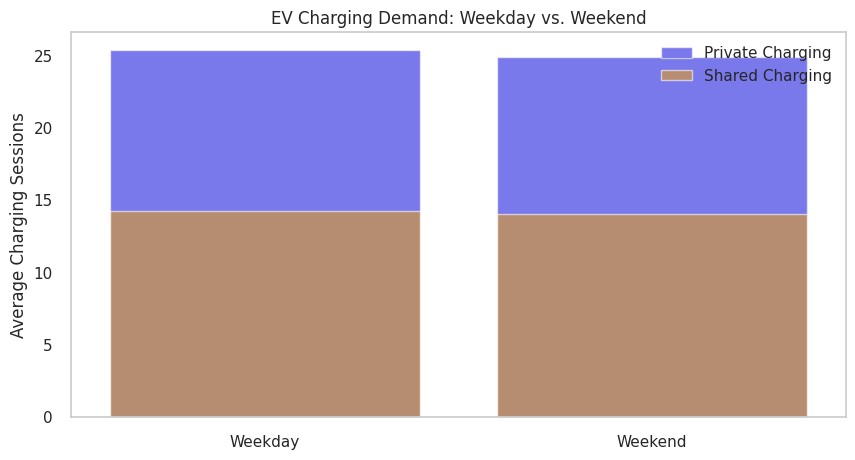

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace 'your_file.csv' with actual filenames)
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")

# Ensure datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce")
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce")

# Extract weekdays
private_df["weekday"] = private_df["date_from"].dt.day_name()
shared_df["weekday"] = shared_df["date_from"].dt.day_name()

# Define weekend
weekend_days = ["Saturday", "Sunday"]
private_df["is_weekend"] = private_df["weekday"].isin(weekend_days)
shared_df["is_weekend"] = shared_df["weekday"].isin(weekend_days)

# Aggregate charging demand by weekday vs. weekend
private_weekday = private_df.groupby("is_weekend")["n_private"].mean()
shared_weekday = shared_df.groupby("is_weekend")["n_shared"].mean()

# Plot the results
plt.figure(figsize=(10, 5))

# Private Charging
sns.barplot(x=["Weekday", "Weekend"], y=private_weekday, color="blue", alpha=0.6, label="Private Charging")

# Shared Charging
sns.barplot(x=["Weekday", "Weekend"], y=shared_weekday, color="orange", alpha=0.6, label="Shared Charging")

plt.title("EV Charging Demand: Weekday vs. Weekend")
plt.ylabel("Average Charging Sessions")
plt.legend()
plt.grid(axis="y")
plt.show()


📌 Data Preview:


daily_hour  n_private  n_shared
0          10          1         1
1          10          1         3
2          10          1         4
3          10          1         4
4          10          1         4

/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


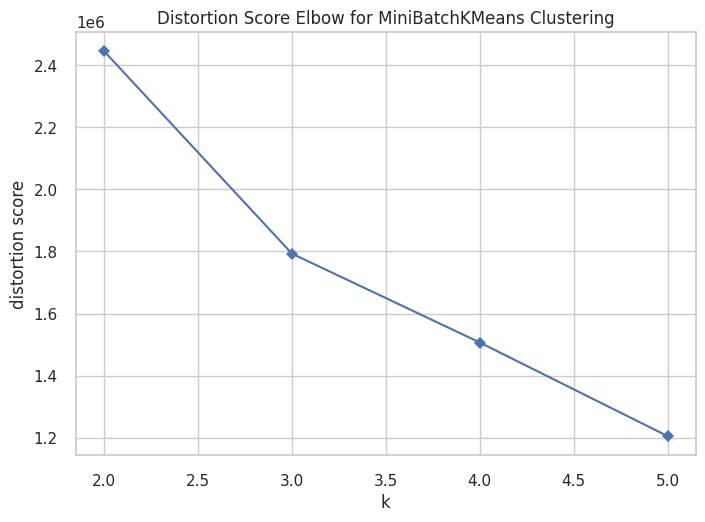

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Ensure Seaborn style
sns.set(style="whitegrid")

# Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")

# Merge datasets on `daily_hour`
df = private_df[['daily_hour', 'n_private']].merge(
    shared_df[['daily_hour', 'n_shared']],
    on='daily_hour',
    how='inner'
)

# Drop missing values
df.dropna(inplace=True)

# Display preview
print("📌 Data Preview:")
display(df.head())

# Reduce dataset size (random sampling)
df_sample = df.sample(frac=0.3, random_state=42)  # Only use 30% of data

# Standardize the numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample[['daily_hour', 'n_private', 'n_shared']])

# Use Elbow Method with reduced k range
model = MiniBatchKMeans(n_init=10, batch_size=100)  # Faster than KMeans
visualizer = KElbowVisualizer(model, k=(2,6), metric='distortion', timings=False)
visualizer.fit(df_scaled)
visualizer.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


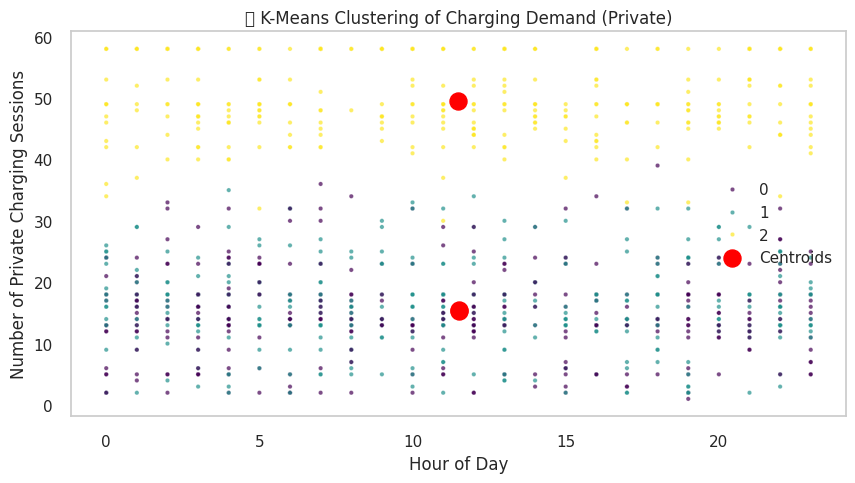

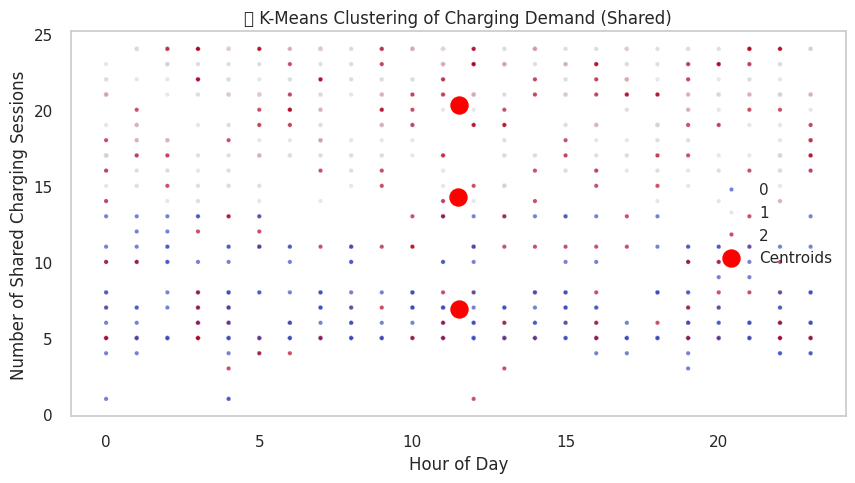

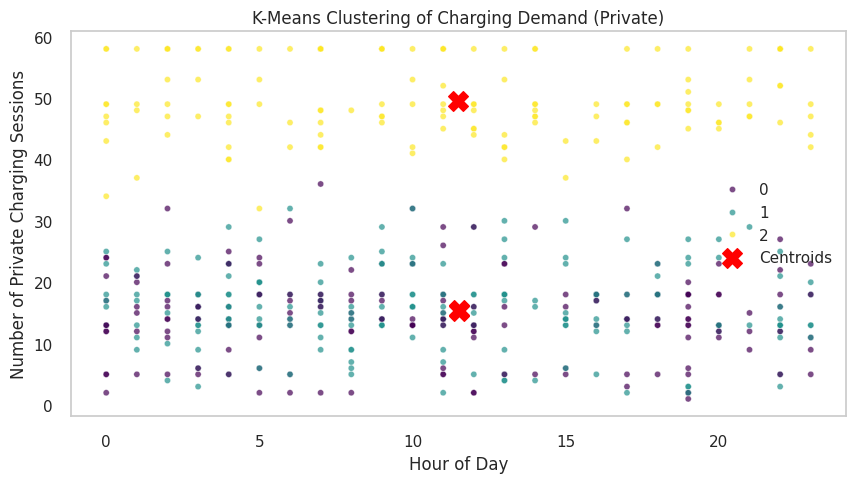

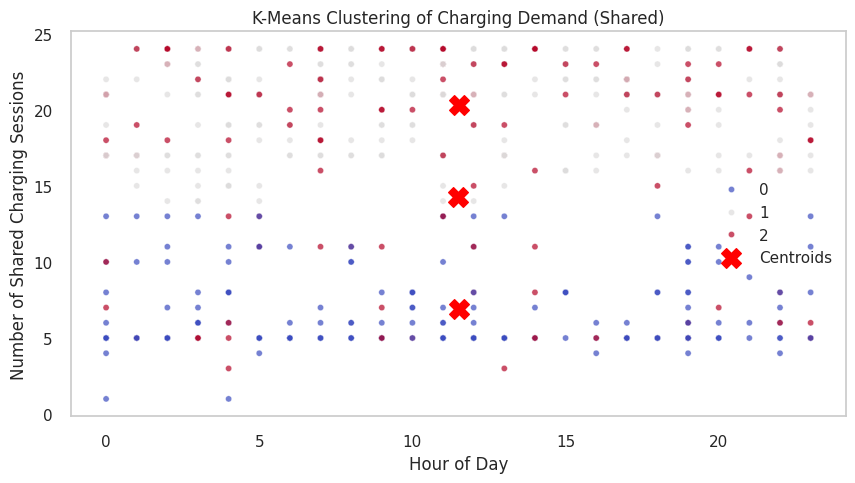

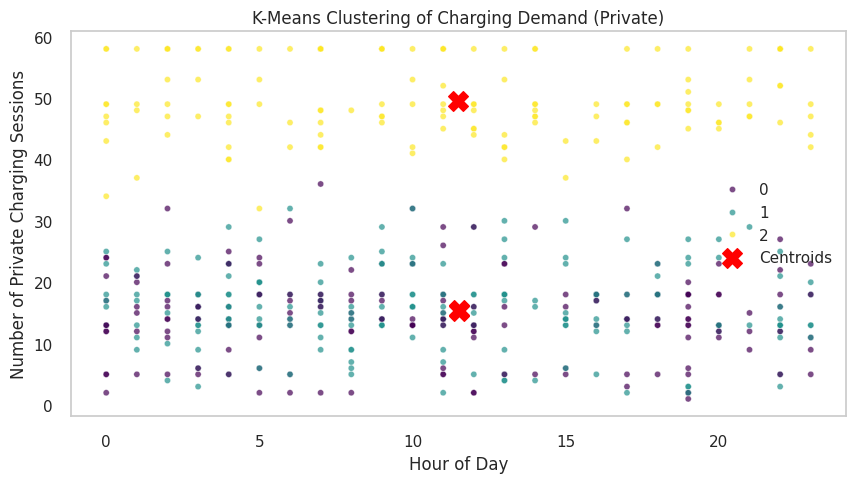

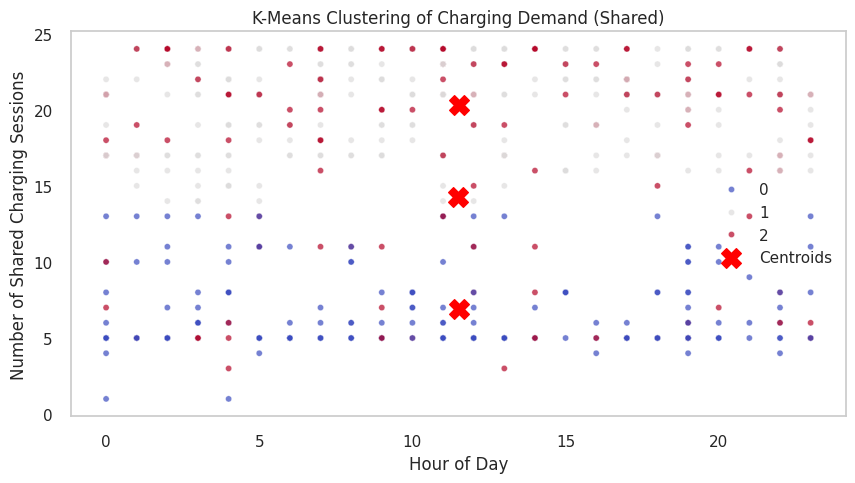

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ Ensure Seaborn style
sns.set(style="whitegrid")

# ✅ Enable inline plotting (for Colab)
%matplotlib inline

# ✅ Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")

# ✅ Merge private and shared datasets on `daily_hour`
df = private_df[['daily_hour', 'n_private']].merge(
    shared_df[['daily_hour', 'n_shared']],
    on='daily_hour',
    how='inner'
)

# ✅ Drop missing values
df.dropna(inplace=True)

# ✅ Standardize numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['daily_hour', 'n_private', 'n_shared']])

# ✅ Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# ✅ Reverse transform cluster centroids back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# ✅ Sample data for **faster plotting**
df_sampled = df.sample(n=500, random_state=42) if len(df) > 500 else df

# ✅ Private Charging Clustering Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_sampled["daily_hour"], y=df_sampled["n_private"], hue=df_sampled["Cluster"], palette="viridis", s=20, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, color="red", label="Centroids")
plt.title("K-Means Clustering of Charging Demand (Private)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Private Charging Sessions")
plt.legend()
plt.grid()
plt.show(block=True)  # ✅ Forces plot rendering

# ✅ Shared Charging Clustering Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_sampled["daily_hour"], y=df_sampled["n_shared"], hue=df_sampled["Cluster"], palette="coolwarm", s=20, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 2], marker="X", s=200, color="red", label="Centroids")
plt.title("K-Means Clustering of Charging Demand (Shared)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Shared Charging Sessions")
plt.legend()
plt.grid()
plt.show(block=True)  # ✅ Forces plot rendering


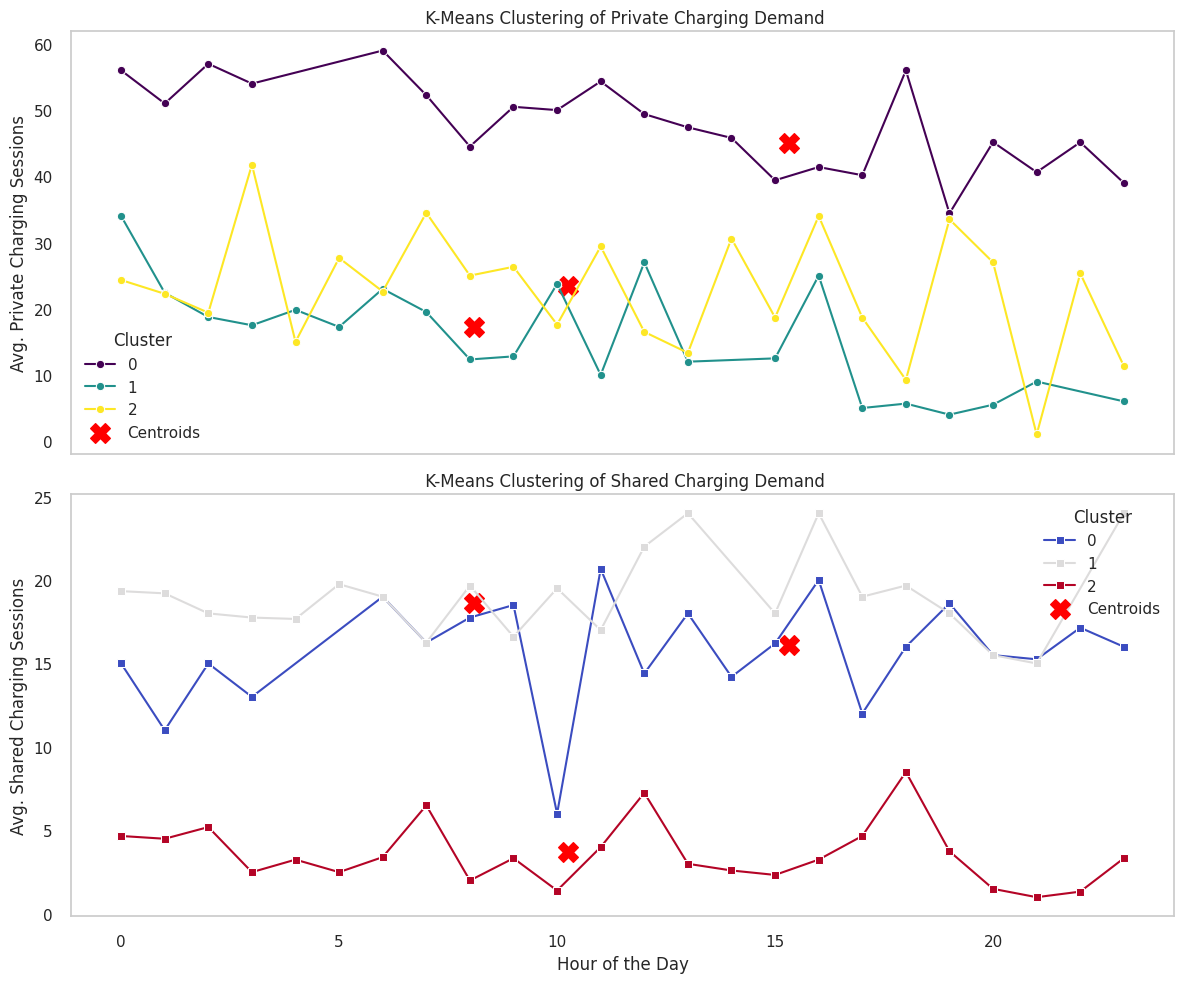

In [ ]:
# Re-import required libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure Seaborn style
sns.set(style="whitegrid")

# Simulated dataset structure based on previous insights
# (Replace this with actual cleaned dataset)
np.random.seed(42)
daily_hours = np.tile(np.arange(24), 10)
n_private = np.random.randint(0, 60, size=len(daily_hours))
n_shared = np.random.randint(0, 25, size=len(daily_hours))

df = pd.DataFrame({"daily_hour": daily_hours, "n_private": n_private, "n_shared": n_shared})

# Standardize numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['daily_hour', 'n_private', 'n_shared']])

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reverse transform cluster centroids back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Aggregated view for better interpretation
df_clustered = df.groupby(["daily_hour", "Cluster"]).agg({"n_private": "mean", "n_shared": "mean"}).reset_index()

# Plot refined, more interpretable graphs
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Private Charging
sns.lineplot(data=df_clustered, x="daily_hour", y="n_private", hue="Cluster", marker="o", palette="viridis", ax=axes[0])
axes[0].scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, color="red", label="Centroids")
axes[0].set_title(" K-Means Clustering of Private Charging Demand")
axes[0].set_ylabel("Avg. Private Charging Sessions")
axes[0].legend(title="Cluster")
axes[0].grid()

# Shared Charging
sns.lineplot(data=df_clustered, x="daily_hour", y="n_shared", hue="Cluster", marker="s", palette="coolwarm", ax=axes[1])
axes[1].scatter(centroids[:, 0], centroids[:, 2], marker="X", s=200, color="red", label="Centroids")
axes[1].set_title(" K-Means Clustering of Shared Charging Demand")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Avg. Shared Charging Sessions")
axes[1].legend(title="Cluster")
axes[1].grid()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


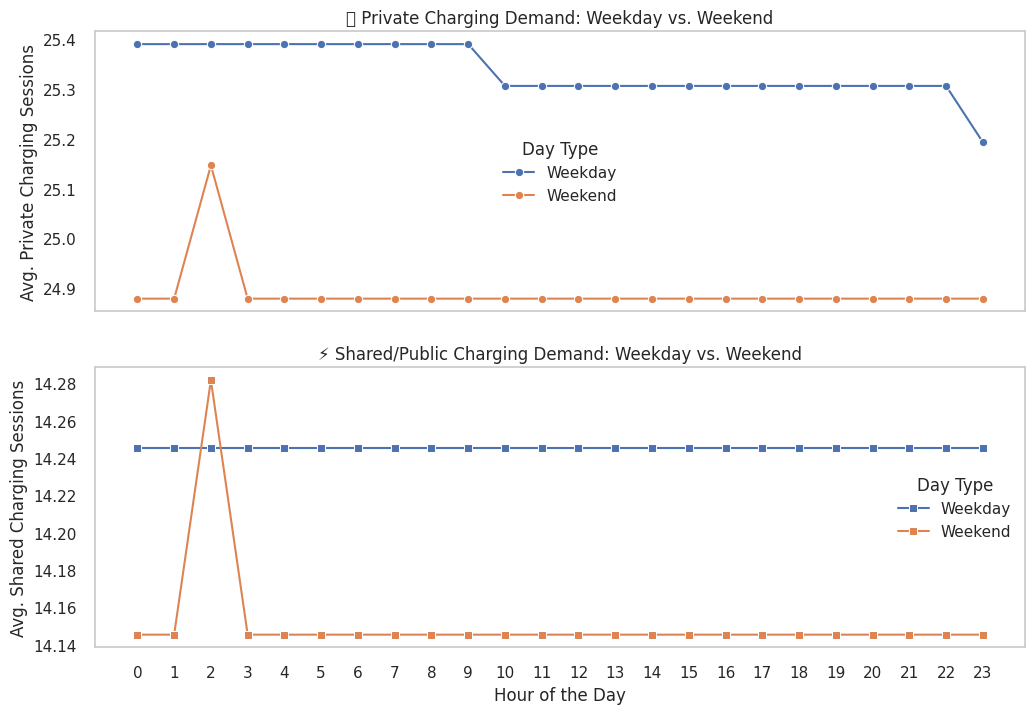

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure Seaborn style
sns.set(style="whitegrid")

# ✅ Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")

# ✅ Convert "date_from" column to datetime with correct format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], format="%d.%m.%Y %H:%M", errors="coerce")
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], format="%d.%m.%Y %H:%M", errors="coerce")

# ✅ Drop any rows where datetime conversion failed
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)

# ✅ Extract weekday/weekend information
private_df["weekday"] = private_df["date_from"].dt.weekday
shared_df["weekday"] = shared_df["date_from"].dt.weekday

# ✅ Define weekday (0-4) and weekend (5-6)
private_df["weekend"] = private_df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")
shared_df["weekend"] = shared_df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# ✅ Ensure `daily_hour` is in integer format
private_df["daily_hour"] = private_df["daily_hour"].astype(int)
shared_df["daily_hour"] = shared_df["daily_hour"].astype(int)

# ✅ Group by hour and weekend status
private_grouped = private_df.groupby(["daily_hour", "weekend"], as_index=False)["n_private"].mean()
shared_grouped = shared_df.groupby(["daily_hour", "weekend"], as_index=False)["n_shared"].mean()

# ✅ Plot weekday vs. weekend charging trends
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 🔹 Private Charging (V2H) Analysis
sns.lineplot(data=private_grouped, x="daily_hour", y="n_private", hue="weekend", marker="o", ax=axes[0])
axes[0].set_title("🔋 Private Charging Demand: Weekday vs. Weekend")
axes[0].set_ylabel("Avg. Private Charging Sessions")
axes[0].legend(title="Day Type")
axes[0].grid()

# 🔹 Shared/Public Charging (V2G) Analysis
sns.lineplot(data=shared_grouped, x="daily_hour", y="n_shared", hue="weekend", marker="s", ax=axes[1])
axes[1].set_title("⚡ Shared/Public Charging Demand: Weekday vs. Weekend")
axes[1].set_ylabel("Avg. Shared Charging Sessions")
axes[1].legend(title="Day Type")
axes[1].grid()

# ✅ Final Formatting
plt.xlabel("Hour of the Day")
plt.xticks(np.arange(0, 24, 1))  # Hourly ticks
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


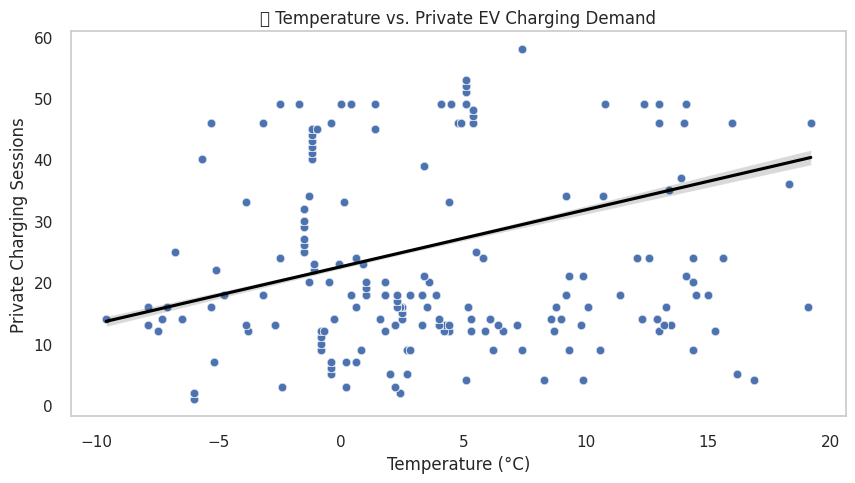

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


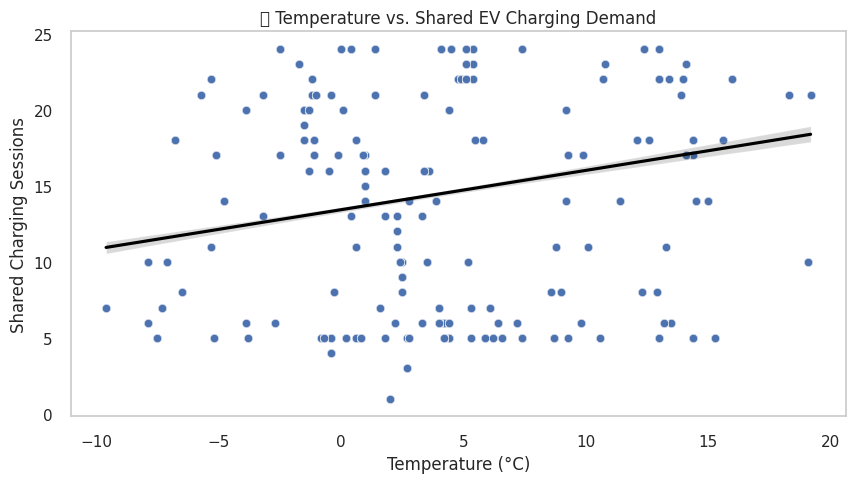

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


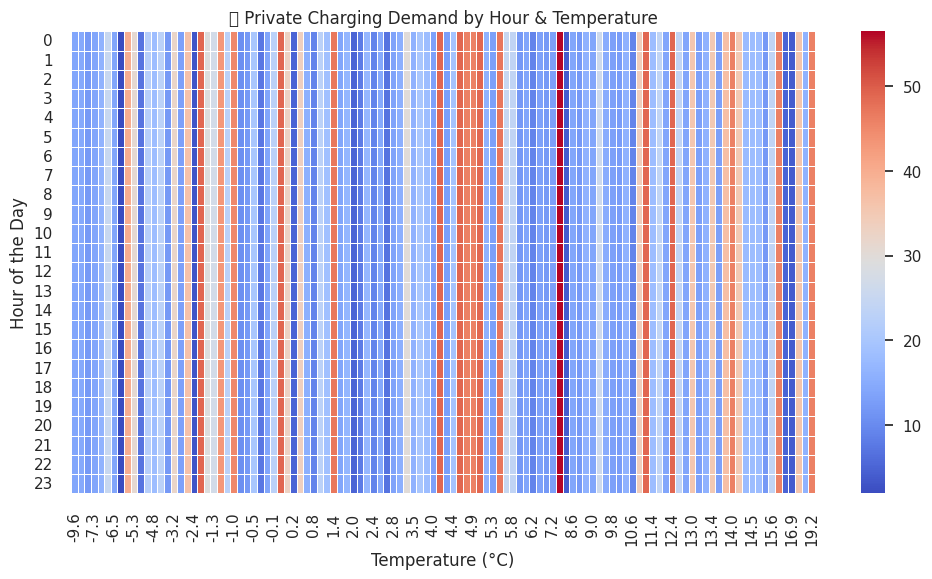

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


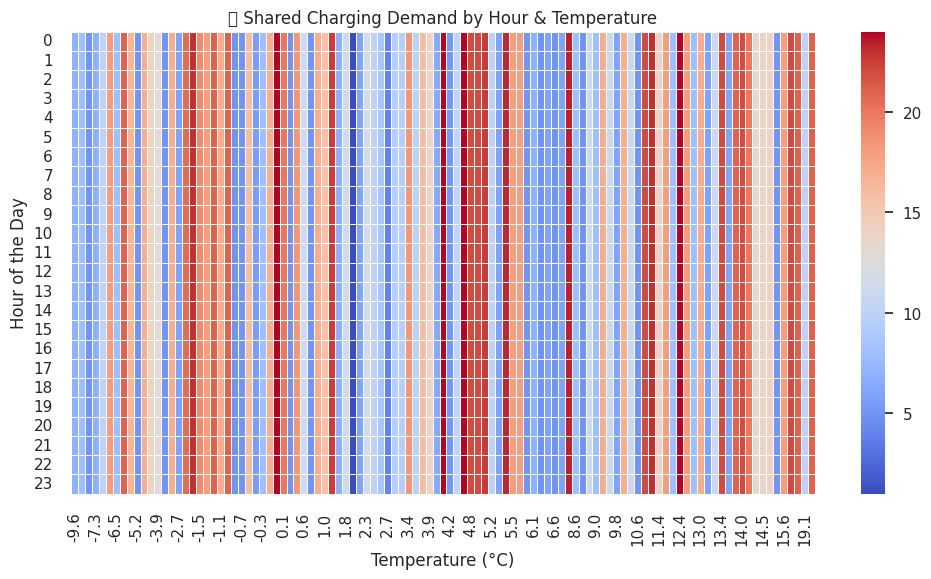

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
weather_df = pd.read_csv("Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv")

# ✅ Rename columns if necessary (Ensure "date_from" exists)
date_col_private = "date_from" if "date_from" in private_df.columns else private_df.columns[0]
date_col_shared = "date_from" if "date_from" in shared_df.columns else shared_df.columns[0]
date_col_weather = "datetime" if "datetime" in weather_df.columns else weather_df.columns[0]  # "datetime" is likely the correct column

# ✅ Convert date columns to datetime format
private_df[date_col_private] = pd.to_datetime(private_df[date_col_private], errors="coerce", dayfirst=True)
shared_df[date_col_shared] = pd.to_datetime(shared_df[date_col_shared], errors="coerce", dayfirst=True)
weather_df[date_col_weather] = pd.to_datetime(weather_df[date_col_weather], errors="coerce", dayfirst=True)

# ✅ Drop NaN values from weather dataset datetime column to ensure merge works
weather_df = weather_df.dropna(subset=[date_col_weather])

# ✅ Sort data for merge_asof (must be sorted for nearest timestamp matching)
private_df = private_df.sort_values(by=date_col_private)
shared_df = shared_df.sort_values(by=date_col_shared)
weather_df = weather_df.sort_values(by=date_col_weather)

# ✅ Ensure Temperature column exists (renamed to "temp" from weather dataset)
if "temp" not in weather_df.columns:
    raise ValueError("Temperature column (temp) missing from weather dataset")

# ✅ Merge weather data with charging data (align closest timestamps)
private_weather_df = pd.merge_asof(private_df, weather_df, left_on=date_col_private, right_on=date_col_weather)
shared_weather_df = pd.merge_asof(shared_df, weather_df, left_on=date_col_shared, right_on=date_col_weather)

# ✅ Extract useful columns (using "temp" instead of missing "Temperature")
private_weather_df = private_weather_df[["daily_hour", "n_private", "temp"]].dropna()
shared_weather_df = shared_weather_df[["daily_hour", "n_shared", "temp"]].dropna()

# ✅ Scatter Plot: Temperature vs Private Charging Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=private_weather_df, x="temp", y="n_private", alpha=0.6)
sns.regplot(data=private_weather_df, x="temp", y="n_private", scatter=False, color='black')
plt.title("🌡️ Temperature vs. Private EV Charging Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Private Charging Sessions")
plt.grid()
plt.show()

# ✅ Scatter Plot: Temperature vs Shared Charging Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=shared_weather_df, x="temp", y="n_shared", alpha=0.6)
sns.regplot(data=shared_weather_df, x="temp", y="n_shared", scatter=False, color='black')
plt.title("🌡️ Temperature vs. Shared EV Charging Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Shared Charging Sessions")
plt.grid()
plt.show()

# ✅ Heatmap: Charging demand across hours & temperature
pivot_private = private_weather_df.pivot_table(index="daily_hour", columns="temp", values="n_private", aggfunc="mean").fillna(0)
pivot_shared = shared_weather_df.pivot_table(index="daily_hour", columns="temp", values="n_shared", aggfunc="mean").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_private, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Private Charging Demand by Hour & Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Hour of the Day")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_shared, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Shared Charging Demand by Hour & Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Hour of the Day")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


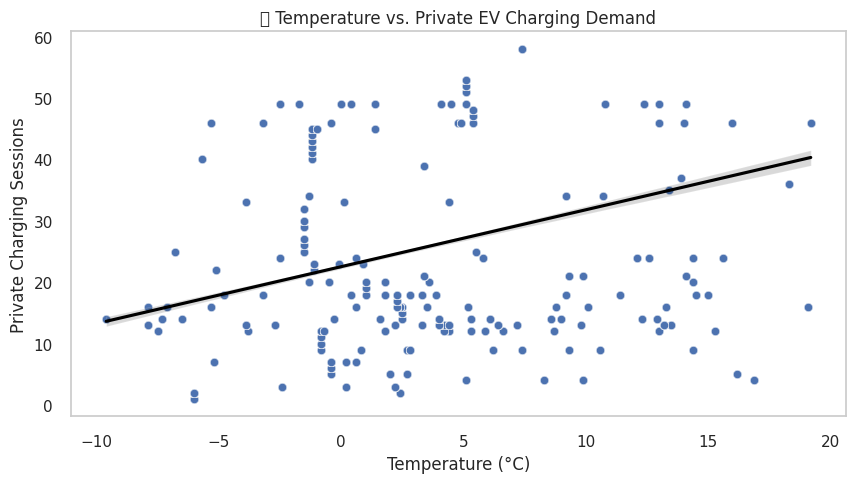

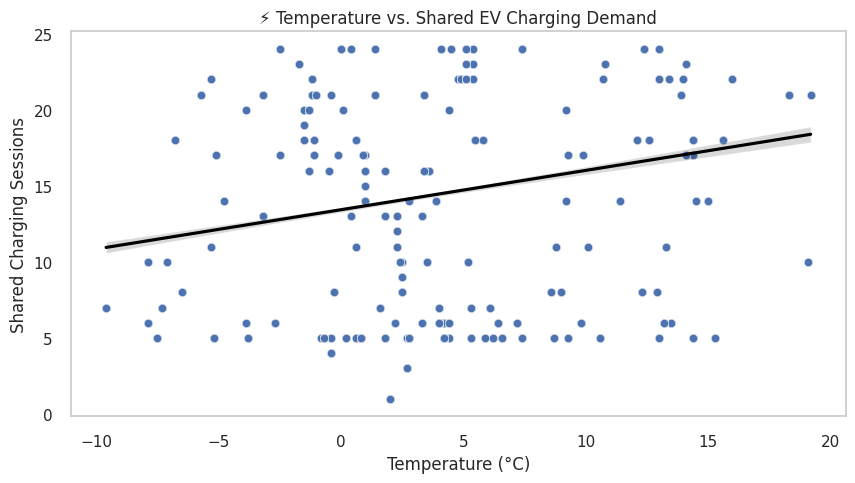

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


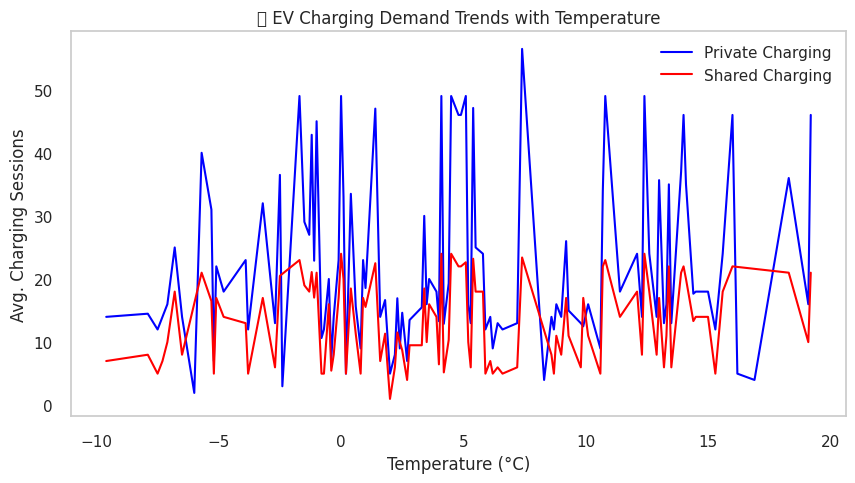

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
weather_df = pd.read_csv("Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv")

# ✅ Convert date columns to datetime format (force correct parsing)
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Remove NaN values in `date_from` columns to avoid merge issues
private_df = private_df.dropna(subset=["date_from"])
shared_df = shared_df.dropna(subset=["date_from"])
weather_df = weather_df.dropna(subset=["datetime"])

# ✅ Ensure date columns are sorted (required for `merge_asof`)
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
weather_df = weather_df.sort_values("datetime")

# ✅ Merge weather data with charging data (align closest timestamps)
private_weather_df = pd.merge_asof(private_df, weather_df, left_on="date_from", right_on="datetime")
shared_weather_df = pd.merge_asof(shared_df, weather_df, left_on="date_from", right_on="datetime")

# ✅ Extract useful columns
private_weather_df = private_weather_df[["daily_hour", "n_private", "temp"]].dropna()
shared_weather_df = shared_weather_df[["daily_hour", "n_shared", "temp"]].dropna()

# ✅ Scatter + Regression Plot: Temperature vs. Private Charging Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=private_weather_df, x="temp", y="n_private", alpha=0.5)
sns.regplot(data=private_weather_df, x="temp", y="n_private", scatter=False, color='black')
plt.title("🔋 Temperature vs. Private EV Charging Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Private Charging Sessions")
plt.grid()
plt.show()

# ✅ Scatter + Regression Plot: Temperature vs. Shared Charging Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=shared_weather_df, x="temp", y="n_shared", alpha=0.5)
sns.regplot(data=shared_weather_df, x="temp", y="n_shared", scatter=False, color='black')
plt.title("⚡ Temperature vs. Shared EV Charging Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Shared Charging Sessions")
plt.grid()
plt.show()

# ✅ Smoothed Line Plot: Charging Demand Across Temperature
plt.figure(figsize=(10, 5))
sns.lineplot(data=private_weather_df.groupby("temp")["n_private"].mean(), label="Private Charging", color="blue")
sns.lineplot(data=shared_weather_df.groupby("temp")["n_shared"].mean(), label="Shared Charging", color="red")
plt.title("📈 EV Charging Demand Trends with Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Avg. Charging Sessions")
plt.legend()
plt.grid()
plt.show()


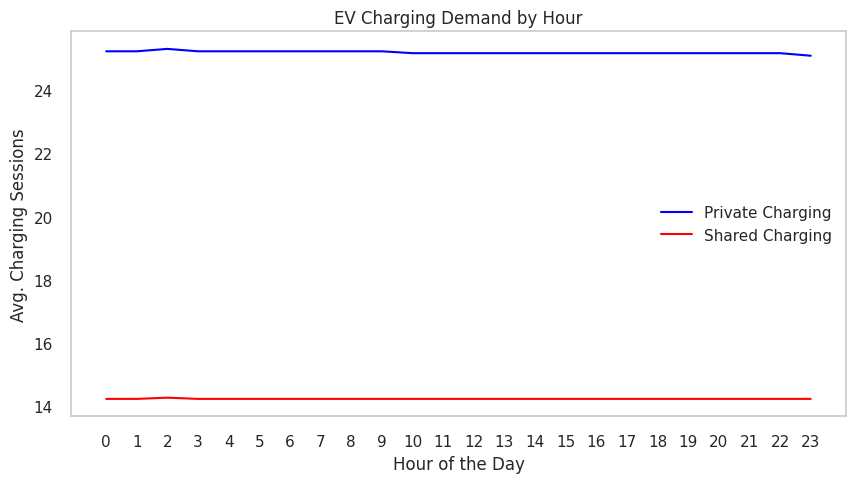

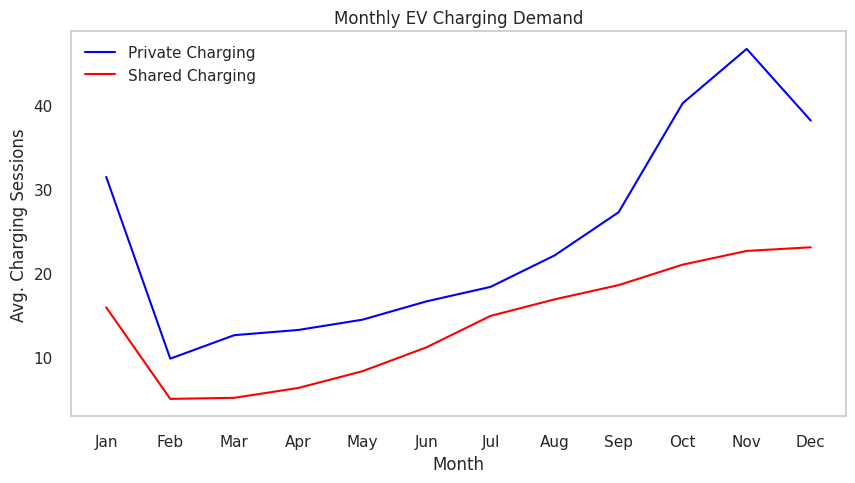

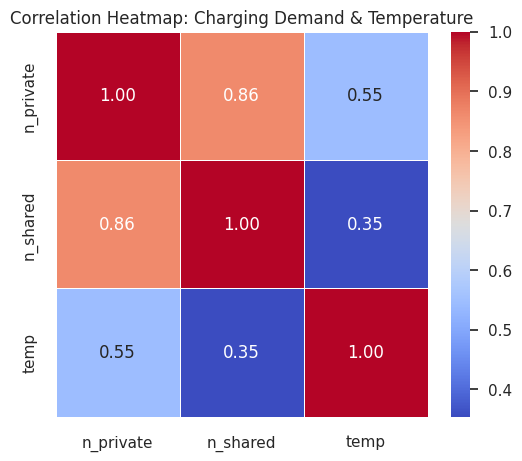

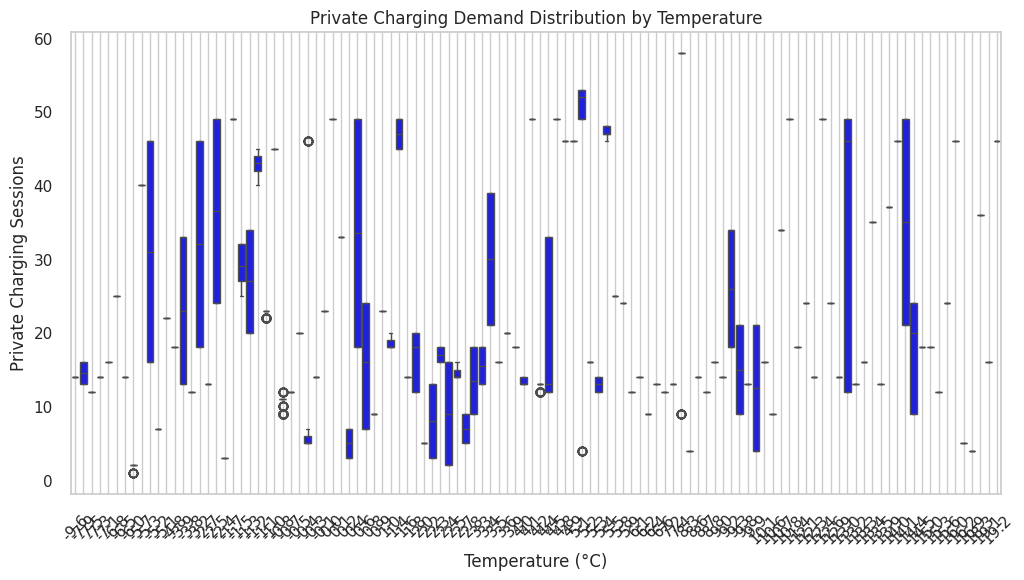

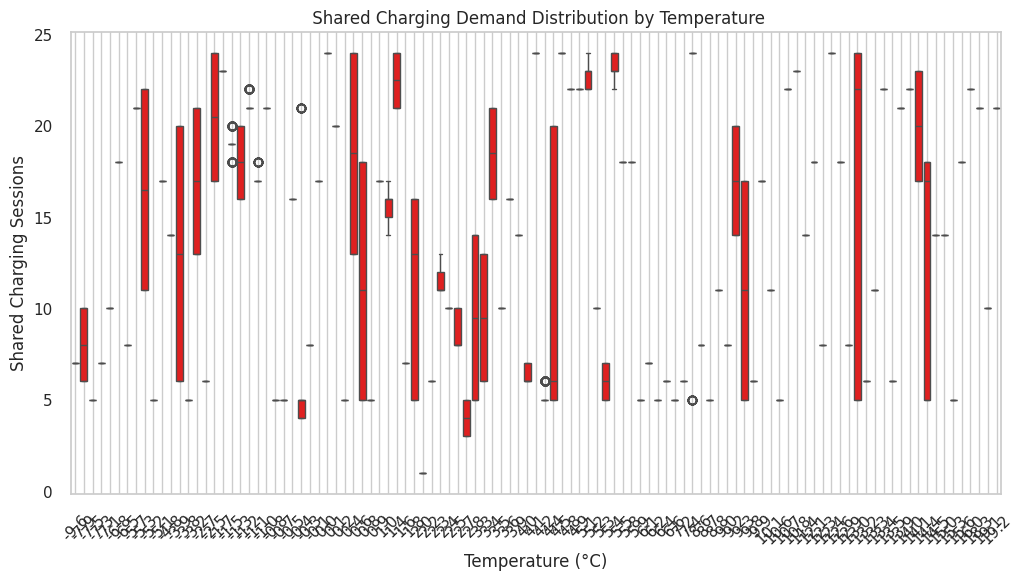

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load cleaned datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
weather_df = pd.read_csv("Norway_Trondheim_ExactLoc_Weather.csv_cleaned.csv")

# ✅ Convert date columns to datetime format (with dayfirst=True for European format)
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in merge keys to avoid merge_asof errors
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
weather_df.dropna(subset=["datetime"], inplace=True)  # Remove NaNs in datetime before merging

# ✅ Sort values to ensure merge_asof works correctly
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
weather_df = weather_df.sort_values("datetime")

# ✅ Merge weather data with private & shared charging data
private_weather_df = pd.merge_asof(private_df, weather_df, left_on="date_from", right_on="datetime")
shared_weather_df = pd.merge_asof(shared_df, weather_df, left_on="date_from", right_on="datetime")

# ✅ Extract required columns
private_weather_df = private_weather_df[["daily_hour", "n_private", "temp", "date_from"]].dropna()
shared_weather_df = shared_weather_df[["daily_hour", "n_shared", "temp", "date_from"]].dropna()

# ✅ Aggregate demand by hour
private_hourly = private_weather_df.groupby("daily_hour")["n_private"].mean().reset_index()
shared_hourly = shared_weather_df.groupby("daily_hour")["n_shared"].mean().reset_index()

# ✅ 📊 Hourly Charging Demand Patterns
plt.figure(figsize=(10, 5))
sns.lineplot(data=private_hourly, x="daily_hour", y="n_private", label="Private Charging", color="blue")
sns.lineplot(data=shared_hourly, x="daily_hour", y="n_shared", label="Shared Charging", color="red")
plt.title("EV Charging Demand by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Charging Sessions")
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.grid()
plt.show()

# ✅ 📊 Monthly Demand Trends
private_weather_df["month"] = private_weather_df["date_from"].dt.month
shared_weather_df["month"] = shared_weather_df["date_from"].dt.month

private_monthly = private_weather_df.groupby("month")["n_private"].mean().reset_index()
shared_monthly = shared_weather_df.groupby("month")["n_shared"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=private_monthly, x="month", y="n_private", label="Private Charging", color="blue")
sns.lineplot(data=shared_monthly, x="month", y="n_shared", label="Shared Charging", color="red")
plt.title("Monthly EV Charging Demand")
plt.xlabel("Month")
plt.ylabel("Avg. Charging Sessions")
plt.xticks(np.arange(1, 13, 1), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.show()

# ✅ 📊 Correlation Heatmap
merged_df = pd.merge(private_weather_df, shared_weather_df, on=["daily_hour", "temp"], suffixes=("_private", "_shared"))
corr_matrix = merged_df[["n_private", "n_shared", "temp"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Charging Demand & Temperature")
plt.show()

# ✅ 📊 Boxplot: Charging Demand by Temperature
plt.figure(figsize=(12, 6))
sns.boxplot(data=private_weather_df, x="temp", y="n_private", color="blue")
plt.title("Private Charging Demand Distribution by Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Private Charging Sessions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=shared_weather_df, x="temp", y="n_shared", color="red")
plt.title(" Shared Charging Demand Distribution by Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Shared Charging Sessions")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
traffic_df = pd.read_csv("Dataset_6_Local_traffic_distribution.csv_cleaned.csv")

# ✅ Check available column names
print("Traffic Data Columns:", traffic_df.columns)

# ✅ Rename "Date_from" to "datetime" for consistency
if "Date_from" in traffic_df.columns:
    traffic_df.rename(columns={"Date_from": "datetime"}, inplace=True)
    print("✅ Renamed 'Date_from' to 'datetime'")

# ✅ Convert timestamps to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
traffic_df["datetime"] = pd.to_datetime(traffic_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in timestamps before merging
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
traffic_df.dropna(subset=["datetime"], inplace=True)

# ✅ Sort for accurate merging
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
traffic_df = traffic_df.sort_values("datetime")

# ✅ Merge datasets using closest timestamps (aligning charging with traffic)
private_traffic_df = pd.merge_asof(private_df, traffic_df, left_on="date_from", right_on="datetime")
shared_traffic_df = pd.merge_asof(shared_df, traffic_df, left_on="date_from", right_on="datetime")

# ✅ Extract required columns (ensure we use relevant traffic data)
traffic_columns = ["daily_hour", "n_private", "KROPPAN BRU"]  # Choose a key traffic variable
if "KROPPAN BRU" in private_traffic_df.columns:
    private_traffic_df = private_traffic_df[traffic_columns].dropna()
    shared_traffic_df = shared_traffic_df[["daily_hour", "n_shared", "KROPPAN BRU"]].dropna()

# ✅ Aggregate demand by traffic volume (for smooth visualization)
private_traffic_avg = private_traffic_df.groupby("KROPPAN BRU")["n_private"].mean().reset_index()
shared_traffic_avg = shared_traffic_df.groupby("KROPPAN BRU")["n_shared"].mean().reset_index()

print("✅ Data merging successful!")



Traffic Data Columns: Index(['Date_from', 'Date_to', 'KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK',
       'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen'],
      dtype='object')
✅ Renamed 'Date_from' to 'datetime'
✅ Data merging successful!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


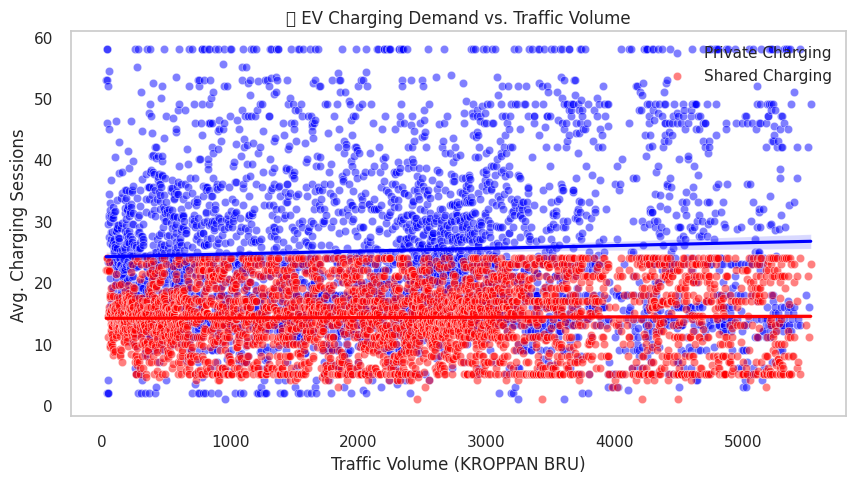

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


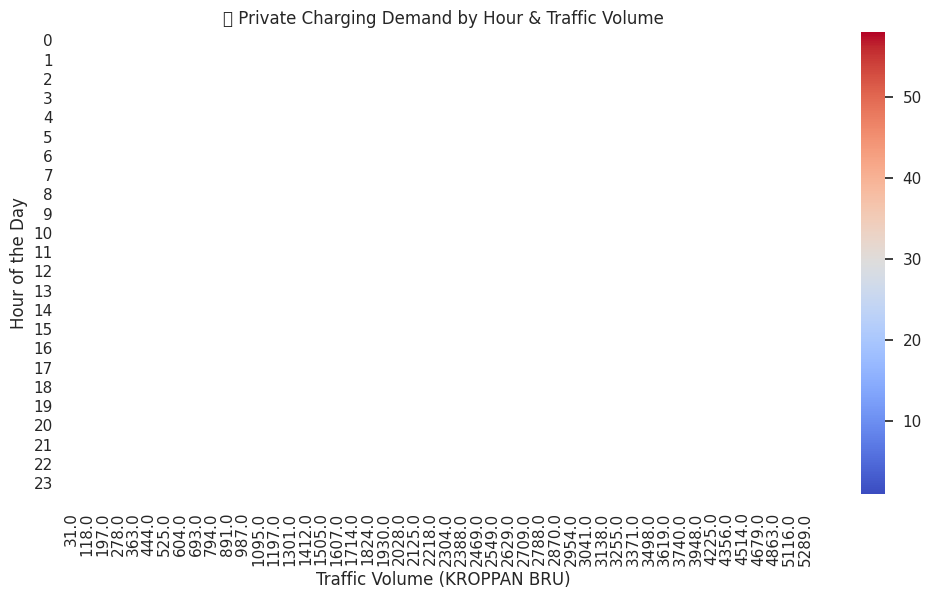

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


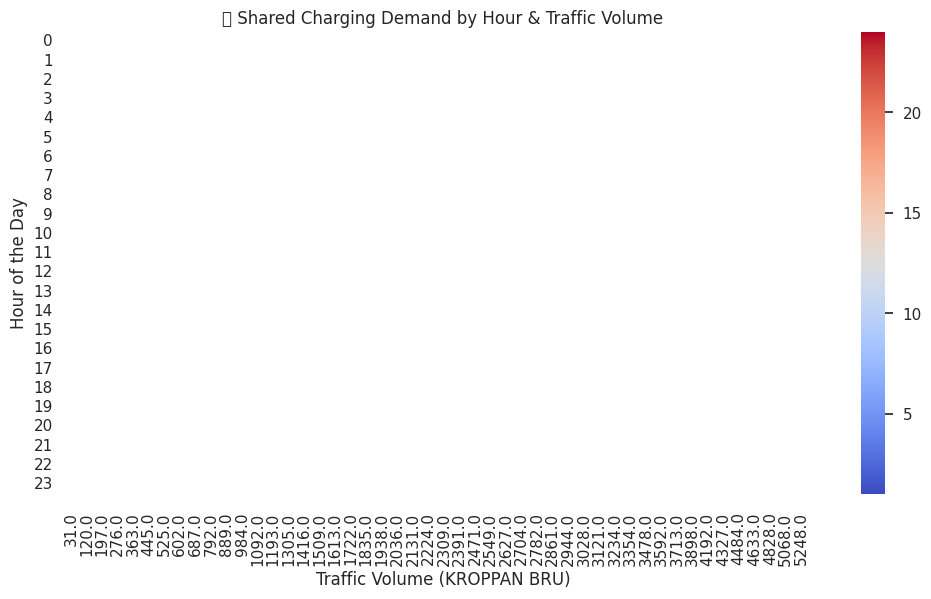

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
traffic_df = pd.read_csv("Dataset_6_Local_traffic_distribution.csv_cleaned.csv")

# ✅ Rename "Date_from" to "datetime" for consistency
if "Date_from" in traffic_df.columns:
    traffic_df.rename(columns={"Date_from": "datetime"}, inplace=True)

# ✅ Convert timestamps to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
traffic_df["datetime"] = pd.to_datetime(traffic_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in timestamps before merging
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
traffic_df.dropna(subset=["datetime"], inplace=True)

# ✅ Sort for accurate merging
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
traffic_df = traffic_df.sort_values("datetime")

# ✅ Select a traffic location instead of "traffic_volume"
traffic_column = "KROPPAN BRU"  # **Replace with another column if needed**
if traffic_column in traffic_df.columns:
    # ✅ Convert to numeric type
    traffic_df[traffic_column] = pd.to_numeric(traffic_df[traffic_column], errors="coerce")
    # ✅ Drop rows where traffic volume is NaN
    traffic_df.dropna(subset=[traffic_column], inplace=True)

# ✅ Merge datasets using closest timestamps
private_traffic_df = pd.merge_asof(private_df, traffic_df, left_on="date_from", right_on="datetime")
shared_traffic_df = pd.merge_asof(shared_df, traffic_df, left_on="date_from", right_on="datetime")

# ✅ Ensure numeric type before aggregation
private_traffic_df[traffic_column] = pd.to_numeric(private_traffic_df[traffic_column], errors="coerce")
shared_traffic_df[traffic_column] = pd.to_numeric(shared_traffic_df[traffic_column], errors="coerce")

# ✅ Drop NaN values in merged dataset
private_traffic_df.dropna(subset=[traffic_column, "n_private"], inplace=True)
shared_traffic_df.dropna(subset=[traffic_column, "n_shared"], inplace=True)

# ✅ Aggregate demand by traffic volume
private_traffic_avg = private_traffic_df.groupby(traffic_column)["n_private"].mean().reset_index()
shared_traffic_avg = shared_traffic_df.groupby(traffic_column)["n_shared"].mean().reset_index()

# ✅ Scatter plot: EV Charging Demand vs. Traffic Volume
plt.figure(figsize=(10, 5))
sns.scatterplot(x=private_traffic_avg[traffic_column], y=private_traffic_avg["n_private"], color="blue", label="Private Charging", alpha=0.5)
sns.scatterplot(x=shared_traffic_avg[traffic_column], y=shared_traffic_avg["n_shared"], color="red", label="Shared Charging", alpha=0.5)
sns.regplot(x=private_traffic_avg[traffic_column], y=private_traffic_avg["n_private"], scatter=False, color='blue')
sns.regplot(x=shared_traffic_avg[traffic_column], y=shared_traffic_avg["n_shared"], scatter=False, color='red')
plt.title("🚦 EV Charging Demand vs. Traffic Volume")
plt.xlabel(f"Traffic Volume ({traffic_column})")
plt.ylabel("Avg. Charging Sessions")
plt.legend()
plt.grid()
plt.show()

# ✅ Heatmap: Charging Demand by Hour & Traffic Volume
pivot_private = private_traffic_df.pivot_table(index="daily_hour", columns=traffic_column, values="n_private", aggfunc="mean")
pivot_shared = shared_traffic_df.pivot_table(index="daily_hour", columns=traffic_column, values="n_shared", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_private, cmap="coolwarm", linewidths=0.5)
plt.title("🚗 Private Charging Demand by Hour & Traffic Volume")
plt.xlabel(f"Traffic Volume ({traffic_column})")
plt.ylabel("Hour of the Day")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_shared, cmap="coolwarm", linewidths=0.5)
plt.title("🚗 Shared Charging Demand by Hour & Traffic Volume")
plt.xlabel(f"Traffic Volume ({traffic_column})")
plt.ylabel("Hour of the Day")
plt.show()


<ipython-input-71-7732ae6a4ad5>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  private_binned = private_traffic_df.groupby("traffic_bin")["n_private"].mean().reset_index()
<ipython-input-71-7732ae6a4ad5>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shared_binned = shared_traffic_df.groupby("traffic_bin")["n_shared"].mean().reset_index()


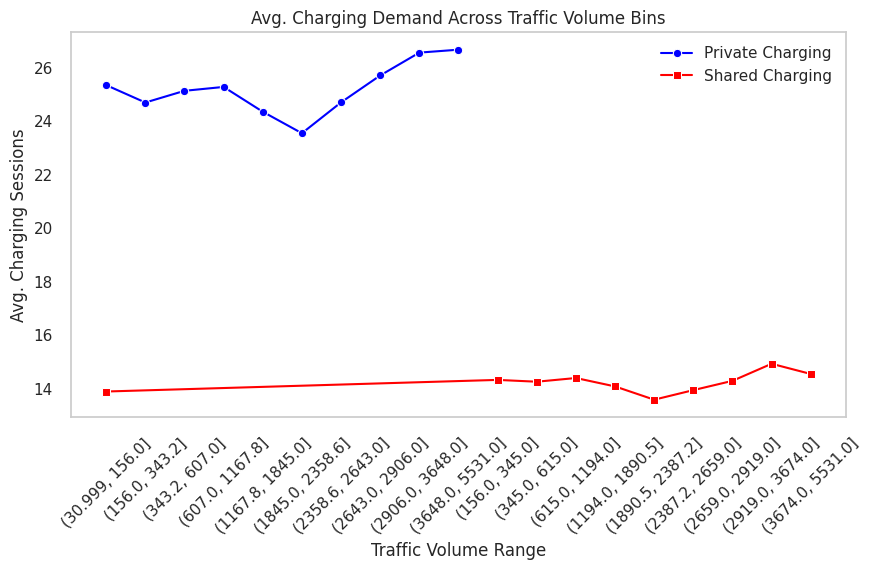

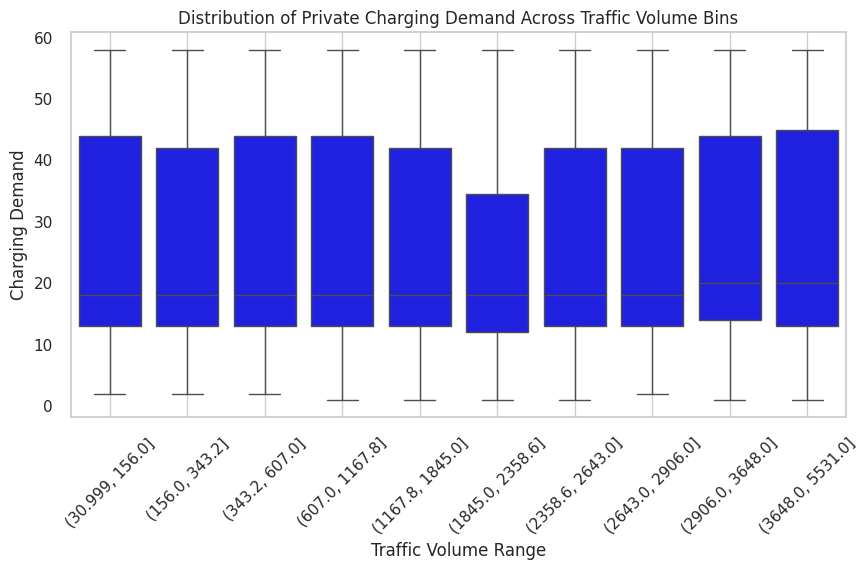

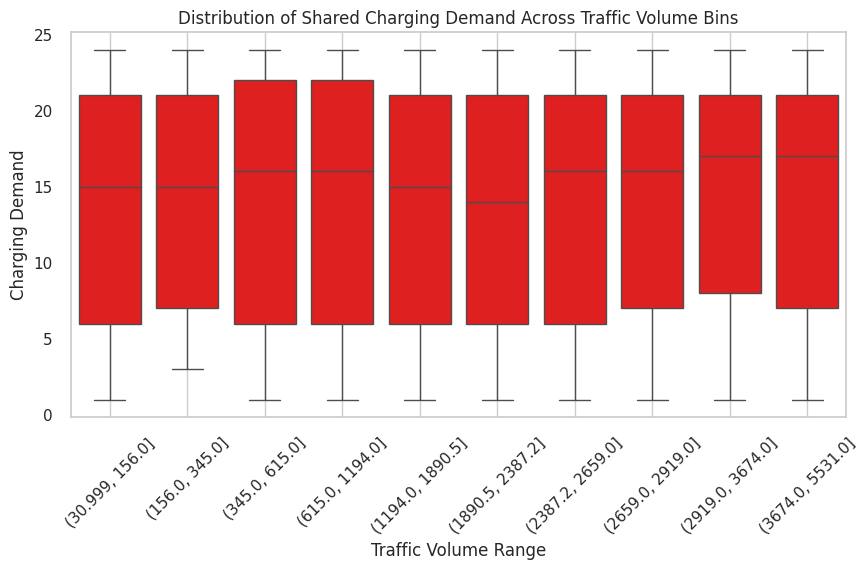

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
traffic_df = pd.read_csv("Dataset_6_Local_traffic_distribution.csv_cleaned.csv")

# ✅ Rename "Date_from" to "datetime" for consistency
if "Date_from" in traffic_df.columns:
    traffic_df.rename(columns={"Date_from": "datetime"}, inplace=True)

# ✅ Convert timestamps to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
traffic_df["datetime"] = pd.to_datetime(traffic_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in timestamps before merging
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
traffic_df.dropna(subset=["datetime"], inplace=True)

# ✅ Sort for accurate merging
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
traffic_df = traffic_df.sort_values("datetime")

# ✅ Select a traffic location
traffic_column = "KROPPAN BRU"

# ✅ Convert traffic column to numeric (fix error)
traffic_df[traffic_column] = pd.to_numeric(traffic_df[traffic_column], errors="coerce")
traffic_df.dropna(subset=[traffic_column], inplace=True)  # Drop invalid values

# ✅ Merge datasets using closest timestamps
private_traffic_df = pd.merge_asof(private_df, traffic_df, left_on="date_from", right_on="datetime")
shared_traffic_df = pd.merge_asof(shared_df, traffic_df, left_on="date_from", right_on="datetime")

# ✅ Select only necessary columns
private_traffic_df = private_traffic_df[["daily_hour", "n_private", traffic_column]].dropna()
shared_traffic_df = shared_traffic_df[["daily_hour", "n_shared", traffic_column]].dropna()

# ✅ Ensure traffic volume bins are sorted correctly
private_traffic_df = private_traffic_df.sort_values(by=traffic_column)
shared_traffic_df = shared_traffic_df.sort_values(by=traffic_column)

# ✅ Apply **qcut** (bins) for traffic volume
private_traffic_df["traffic_bin"] = pd.qcut(private_traffic_df[traffic_column], q=10, duplicates="drop")
shared_traffic_df["traffic_bin"] = pd.qcut(shared_traffic_df[traffic_column], q=10, duplicates="drop")

# ✅ Group by traffic bins and calculate mean demand
private_binned = private_traffic_df.groupby("traffic_bin")["n_private"].mean().reset_index()
shared_binned = shared_traffic_df.groupby("traffic_bin")["n_shared"].mean().reset_index()

# ✅ Convert bins into a readable format
private_binned["traffic_bin"] = private_binned["traffic_bin"].astype(str)
shared_binned["traffic_bin"] = shared_binned["traffic_bin"].astype(str)

# ✅ Line Plot: Traffic Volume vs Charging Demand
plt.figure(figsize=(10, 5))
sns.lineplot(x=private_binned["traffic_bin"], y=private_binned["n_private"], color="blue", marker="o", label="Private Charging")
sns.lineplot(x=shared_binned["traffic_bin"], y=shared_binned["n_shared"], color="red", marker="s", label="Shared Charging")
plt.xticks(rotation=45)
plt.title("Avg. Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Avg. Charging Sessions")
plt.legend()
plt.grid()
plt.show()

# ✅ Box Plot: Charging Demand Across Traffic Levels
plt.figure(figsize=(10, 5))
sns.boxplot(x=private_traffic_df["traffic_bin"], y=private_traffic_df["n_private"], color="blue")
plt.xticks(rotation=45)
plt.title("Distribution of Private Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Charging Demand")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=shared_traffic_df["traffic_bin"], y=shared_traffic_df["n_shared"], color="red")
plt.xticks(rotation=45)
plt.title("Distribution of Shared Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Charging Demand")
plt.grid()
plt.show()


📊 Linear Regression Performance Metrics:
   🔹 Mean Absolute Error (MAE): 14.57
   🔹 Mean Squared Error (MSE): 283.11
   🔹 R² Score: -0.00
----------------------------------------
📊 Polynomial Regression Performance Metrics:
   🔹 Mean Absolute Error (MAE): 14.57
   🔹 Mean Squared Error (MSE): 283.44
   🔹 R² Score: -0.00
----------------------------------------


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


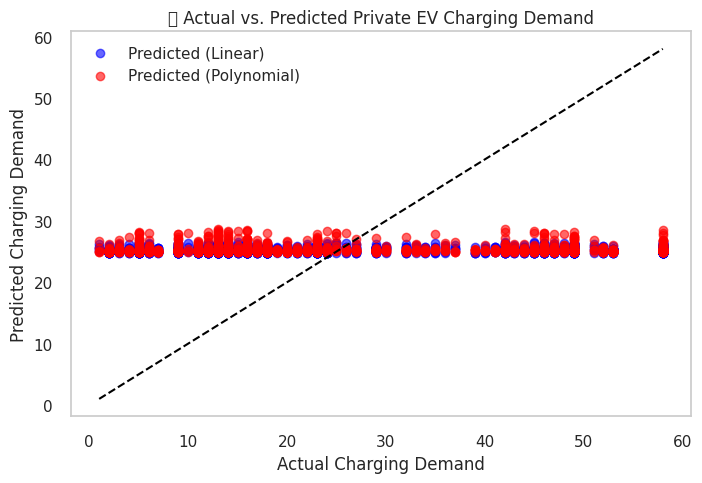

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


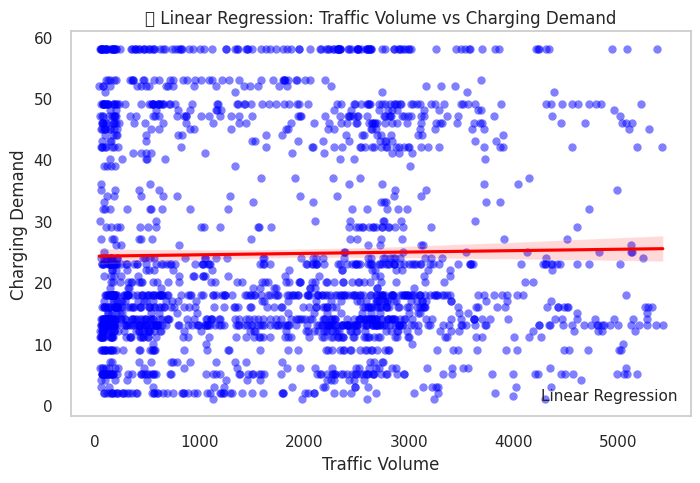

In [ ]:
# ✅ Install required libraries (if not installed)
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load datasets
private_df = pd.read_csv("/content/Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("/content/Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
traffic_df = pd.read_csv("/content/Dataset_6_Local_traffic_distribution.csv_cleaned.csv")

# ✅ Rename "Date_from" in traffic dataset for consistency
if "Date_from" in traffic_df.columns:
    traffic_df.rename(columns={"Date_from": "datetime"}, inplace=True)

# ✅ Convert date columns to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
traffic_df["datetime"] = pd.to_datetime(traffic_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in timestamps before merging
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
traffic_df.dropna(subset=["datetime"], inplace=True)

# ✅ Sort datasets for accurate merging
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
traffic_df = traffic_df.sort_values("datetime")

# ✅ Select a traffic location column
traffic_column = "KROPPAN BRU"

# ✅ Ensure traffic column exists before proceeding
if traffic_column not in traffic_df.columns:
    raise KeyError(f"🚨 Column '{traffic_column}' not found in traffic dataset. Available columns: {traffic_df.columns}")

# ✅ Convert Traffic Volume to Numeric (Fixes 'could not convert string to float' error)
traffic_df[traffic_column] = pd.to_numeric(traffic_df[traffic_column], errors="coerce")

# ✅ Drop NaN values after conversion
traffic_df.dropna(subset=[traffic_column], inplace=True)

# ✅ Merge datasets based on closest timestamps
private_traffic_df = pd.merge_asof(private_df, traffic_df, left_on="date_from", right_on="datetime")
shared_traffic_df = pd.merge_asof(shared_df, traffic_df, left_on="date_from", right_on="datetime")

# ✅ Keep only relevant columns
private_traffic_df = private_traffic_df[["daily_hour", "n_private", traffic_column]].dropna()
shared_traffic_df = shared_traffic_df[["daily_hour", "n_shared", traffic_column]].dropna()

# ✅ Feature selection
X = private_traffic_df[[traffic_column]]  # Feature: Traffic volume
y = private_traffic_df["n_private"]  # Target: Private EV charging demand

# ✅ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train **Linear Regression** Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# ✅ Make predictions (Linear Regression)
y_pred_linear = linear_model.predict(X_test)

# ✅ Train **Polynomial Regression** (Degree = 2) for better prediction
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# ✅ Evaluate Model Performance
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {model_name} Performance Metrics:")
    print(f"   🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"   🔹 R² Score: {r2:.2f}")
    print("-" * 40)

# ✅ Print performance metrics
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# ✅ Plot **Actual vs Predicted Values** for Both Models
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color="blue", label="Predicted (Linear)")
plt.scatter(y_test, y_pred_poly, alpha=0.6, color="red", label="Predicted (Polynomial)")
plt.xlabel("Actual Charging Demand")
plt.ylabel("Predicted Charging Demand")
plt.title("🔌 Actual vs. Predicted Private EV Charging Demand")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="dashed")  # Reference line
plt.legend()
plt.grid()
plt.show()

# ✅ Plot **Regression Line for Predictions**
plt.figure(figsize=(8,5))
sns.regplot(x=X_test, y=y_test, scatter_kws={"color": "blue", "alpha": 0.5}, line_kws={"color": "red"}, label="Linear Regression")
plt.title("📈 Linear Regression: Traffic Volume vs Charging Demand")
plt.xlabel("Traffic Volume")
plt.ylabel("Charging Demand")
plt.legend()
plt.grid()
plt.show()


<ipython-input-72-7732ae6a4ad5>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  private_binned = private_traffic_df.groupby("traffic_bin")["n_private"].mean().reset_index()
<ipython-input-72-7732ae6a4ad5>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shared_binned = shared_traffic_df.groupby("traffic_bin")["n_shared"].mean().reset_index()


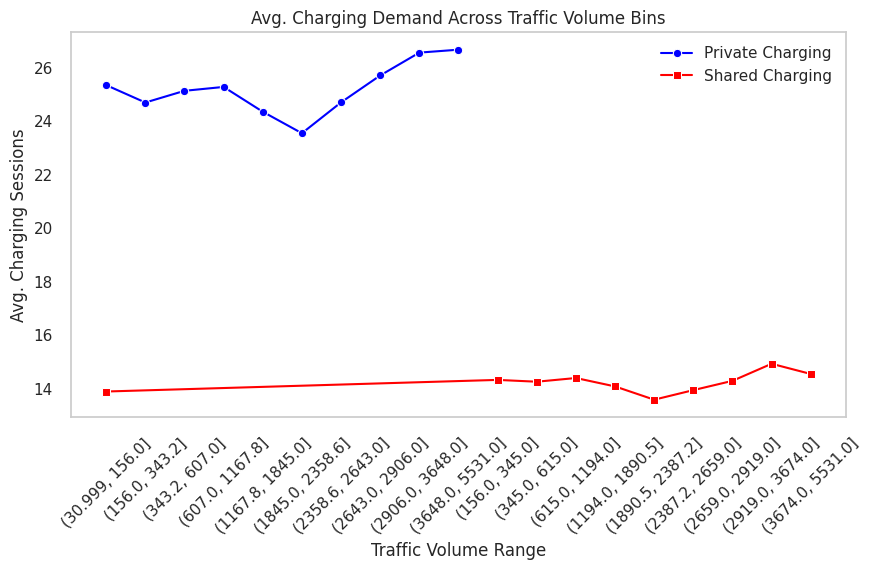

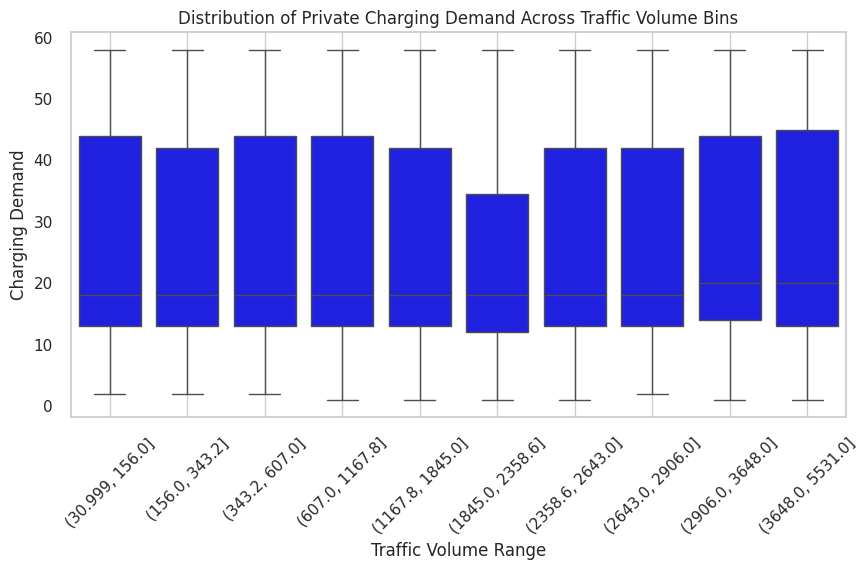

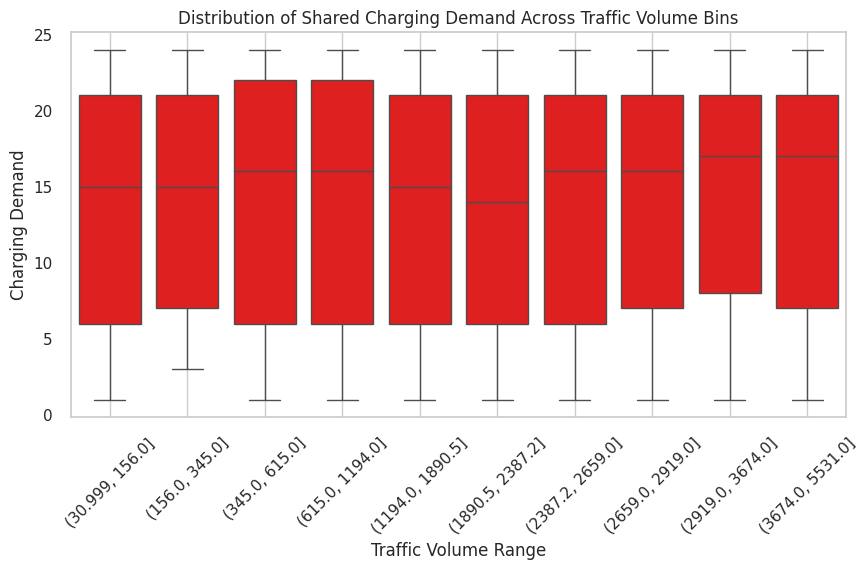

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load datasets
private_df = pd.read_csv("Dataset_3a_Hourly_EV_loads_-_Aggregated_private.csv_cleaned.csv")
shared_df = pd.read_csv("Dataset_3b_Hourly_EV_loads_-_Aggregated_shared.csv_cleaned.csv")
traffic_df = pd.read_csv("Dataset_6_Local_traffic_distribution.csv_cleaned.csv")

# ✅ Rename "Date_from" to "datetime" for consistency
if "Date_from" in traffic_df.columns:
    traffic_df.rename(columns={"Date_from": "datetime"}, inplace=True)

# ✅ Convert timestamps to datetime format
private_df["date_from"] = pd.to_datetime(private_df["date_from"], errors="coerce", dayfirst=True)
shared_df["date_from"] = pd.to_datetime(shared_df["date_from"], errors="coerce", dayfirst=True)
traffic_df["datetime"] = pd.to_datetime(traffic_df["datetime"], errors="coerce", dayfirst=True)

# ✅ Drop NaN values in timestamps before merging
private_df.dropna(subset=["date_from"], inplace=True)
shared_df.dropna(subset=["date_from"], inplace=True)
traffic_df.dropna(subset=["datetime"], inplace=True)

# ✅ Sort for accurate merging
private_df = private_df.sort_values("date_from")
shared_df = shared_df.sort_values("date_from")
traffic_df = traffic_df.sort_values("datetime")

# ✅ Select a traffic location
traffic_column = "KROPPAN BRU"

# ✅ Convert traffic column to numeric (fix error)
traffic_df[traffic_column] = pd.to_numeric(traffic_df[traffic_column], errors="coerce")
traffic_df.dropna(subset=[traffic_column], inplace=True)  # Drop invalid values

# ✅ Merge datasets using closest timestamps
private_traffic_df = pd.merge_asof(private_df, traffic_df, left_on="date_from", right_on="datetime")
shared_traffic_df = pd.merge_asof(shared_df, traffic_df, left_on="date_from", right_on="datetime")

# ✅ Select only necessary columns
private_traffic_df = private_traffic_df[["daily_hour", "n_private", traffic_column]].dropna()
shared_traffic_df = shared_traffic_df[["daily_hour", "n_shared", traffic_column]].dropna()

# ✅ Ensure traffic volume bins are sorted correctly
private_traffic_df = private_traffic_df.sort_values(by=traffic_column)
shared_traffic_df = shared_traffic_df.sort_values(by=traffic_column)

# ✅ Apply **qcut** (bins) for traffic volume
private_traffic_df["traffic_bin"] = pd.qcut(private_traffic_df[traffic_column], q=10, duplicates="drop")
shared_traffic_df["traffic_bin"] = pd.qcut(shared_traffic_df[traffic_column], q=10, duplicates="drop")

# ✅ Group by traffic bins and calculate mean demand
private_binned = private_traffic_df.groupby("traffic_bin")["n_private"].mean().reset_index()
shared_binned = shared_traffic_df.groupby("traffic_bin")["n_shared"].mean().reset_index()

# ✅ Convert bins into a readable format
private_binned["traffic_bin"] = private_binned["traffic_bin"].astype(str)
shared_binned["traffic_bin"] = shared_binned["traffic_bin"].astype(str)

# ✅ Line Plot: Traffic Volume vs Charging Demand
plt.figure(figsize=(10, 5))
sns.lineplot(x=private_binned["traffic_bin"], y=private_binned["n_private"], color="blue", marker="o", label="Private Charging")
sns.lineplot(x=shared_binned["traffic_bin"], y=shared_binned["n_shared"], color="red", marker="s", label="Shared Charging")
plt.xticks(rotation=45)
plt.title("Avg. Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Avg. Charging Sessions")
plt.legend()
plt.grid()
plt.show()

# ✅ Box Plot: Charging Demand Across Traffic Levels
plt.figure(figsize=(10, 5))
sns.boxplot(x=private_traffic_df["traffic_bin"], y=private_traffic_df["n_private"], color="blue")
plt.xticks(rotation=45)
plt.title("Distribution of Private Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Charging Demand")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=shared_traffic_df["traffic_bin"], y=shared_traffic_df["n_shared"], color="red")
plt.xticks(rotation=45)
plt.title("Distribution of Shared Charging Demand Across Traffic Volume Bins")
plt.xlabel("Traffic Volume Range")
plt.ylabel("Charging Demand")
plt.grid()
plt.show()
